# Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing, Tidying Up, and Normalizing the Cleaned BC and WA Regional Population Data

In [2]:
# import the population data for BC Regional Districts and WA Counties
BC_pop = pd.read_csv('Population/BCPop1990.csv')#, index_col=0) # only need index_col=0 to make years the indices
print(BC_pop.columns)
WA_pop = pd.read_csv('Population/WAPop1990.csv')# index_col=0)
print(WA_pop.columns)

Index(['Unnamed: 0', 'Alberni-Clayoquot', 'Bulkley-Nechako', 'Capital',
       'Cariboo', 'Central Coast', 'Central Kootenay', 'Central Okanagan',
       'Columbia-Shuswap', 'Comox Valley', 'Cowichan Valley', 'East Kootenay',
       'Fraser Valley', 'Fraser-Fort George', 'Greater Vancouver',
       'Kitimat-Stikine', 'Kootenay Boundary', 'Mount Waddington', 'Nanaimo',
       'North Coast', 'North Okanagan', 'Northern Rockies',
       'Okanagan-Similkameen', 'Peace River', 'Powell River',
       'Squamish-Lillooet', 'Stikine', 'Strathcona', 'Sunshine Coast',
       'Thompson-Nicola'],
      dtype='object')
Index(['Unnamed: 0', 'Adams', 'Asotin', 'Benton', 'Chelan', 'Clallam', 'Clark',
       'Columbia', 'Cowlitz', 'Douglas', 'Ferry', 'Franklin', 'Garfield',
       'Grant', 'Grays Harbor', 'Island', 'Jefferson', 'King', 'Kitsap',
       'Kittitas', 'Klickitat', 'Lewis', 'Lincoln', 'Mason', 'Okanogan',
       'Pacific', 'Pend Oreille', 'Pierce', 'San Juan', 'Skagit', 'Skamania',
       'S

In [3]:
BC_pop = BC_pop.rename(columns={'Unnamed: 0':'Year'})
WA_pop = WA_pop.rename(columns={'Unnamed: 0':'Year'})

# print(BC_pop['Year']) # there's a duplicate row at 2011!
BC_pop = BC_pop.drop_duplicates()

In [4]:
# pre-2001 BC population numbers are only for every five years
# make an empty table for these years, to be interpolated
missing_yrs = np.setdiff1d([i for i in range(1990,2001)],[1991,1996])
missing_yrs_vals = np.empty((29,9,))*np.nan
missing_data = np.vstack((missing_yrs,missing_yrs_vals)).transpose()

BC_missing = pd.DataFrame(missing_data)
BC_missing.columns = BC_pop.columns

BC_pop = pd.concat([BC_missing,BC_pop]).sort_values(by='Year')
BC_pop.head()

Year  Alberni-Clayoquot  Bulkley-Nechako        Capital       Cariboo  \
0  1990.0                NaN              NaN            NaN           NaN   
0  1991.0       31758.372339     40364.533248  284814.218429  57925.397683   
1  1992.0                NaN              NaN            NaN           NaN   
2  1993.0                NaN              NaN            NaN           NaN   
3  1994.0                NaN              NaN            NaN           NaN   

   Central Coast  Central Kootenay  Central Okanagan  Columbia-Shuswap  \
0            NaN               NaN               NaN               NaN   
0            NaN      52077.461519      99301.165353      44098.152246   
1            NaN               NaN               NaN               NaN   
2            NaN               NaN               NaN               NaN   
3            NaN               NaN               NaN               NaN   

   Comox Valley  ...  North Okanagan  Northern Rockies  Okanagan-Similkameen  \
0           NaN  ...             NaN               NaN                   NaN   
0  36419.221742  ...    56876.430083       5017.717949          68207.220822   
1           NaN  ...             NaN               NaN                   NaN   
2           NaN  ...             NaN               NaN                   NaN   
3           NaN  ...             NaN               NaN                   NaN   

    Peace River  Powell River  Squamish-Lillooet  Stikine    Strathcona  \
0           NaN           NaN                NaN      NaN           NaN   
0  57537.206555  20096.767171         23106.7448      NaN  33658.076917   
1           NaN           NaN                NaN      NaN           NaN   
2           NaN           NaN                NaN      NaN           NaN   
3           NaN           NaN                NaN      NaN           NaN   

   Sunshine Coast  Thompson-Nicola  
0             NaN              NaN  
0    20250.746172    104771.145103  
1             NaN              NaN  
2             NaN              NaN  
3             NaN              NaN  

[5 rows x 30 columns]

In [5]:
# fill in the missing years with some linearly interpolated values where possible

# this just repeats the closest value
BC_pop = BC_pop.interpolate().bfill() 

# this uses a linear spline (but also seems to just backfill most columns)
#BC_pop = BC_pop.interpolate(method='slinear', fill_value='extrapolate', limit_direction='both')

# fix the indices obtained from concatenating
BC_pop = BC_pop.reset_index().drop(columns=['index'])

BC_pop.head()

Year  Alberni-Clayoquot  Bulkley-Nechako        Capital       Cariboo  \
0  1990.0       31758.372339     40364.533248  284814.218429  57925.397683   
1  1991.0       31758.372339     40364.533248  284814.218429  57925.397683   
2  1992.0       31817.069866     40902.340312  291593.699934  58129.540054   
3  1993.0       31875.767393     41440.147376  298373.181439  58333.682424   
4  1994.0       31934.464920     41977.954439  305152.662944  58537.824795   

   Central Coast  Central Kootenay  Central Okanagan  Columbia-Shuswap  \
0         3918.0      52077.461519      99301.165353      44098.152246   
1         3918.0      52077.461519      99301.165353      44098.152246   
2         3918.0      53239.867915     105194.534266      45262.102554   
3         3918.0      54402.274311     111087.903180      46426.052863   
4         3918.0      55564.680707     116981.272094      47590.003172   

   Comox Valley  ...  North Okanagan  Northern Rockies  Okanagan-Similkameen  \
0  36419.221742  ...    56876.430083       5017.717949          68207.220822   
1  36419.221742  ...    56876.430083       5017.717949          68207.220822   
2  39325.187575  ...    59967.745405       5175.214143          70073.829608   
3  42231.153408  ...    63059.060727       5332.710337          71940.438395   
4  45137.119242  ...    66150.376049       5490.206532          73807.047181   

    Peace River  Powell River  Squamish-Lillooet  Stikine    Strathcona  \
0  57537.206555  20096.767171       23106.744800    614.0  33658.076917   
1  57537.206555  20096.767171       23106.744800    614.0  33658.076917   
2  57759.080778  20140.082503       24498.509171    614.0  35671.642446   
3  57980.955001  20183.397836       25890.273542    614.0  37685.207975   
4  58202.829224  20226.713168       27282.037913    614.0  39698.773503   

   Sunshine Coast  Thompson-Nicola  
0    20250.746172    104771.145103  
1    20250.746172    104771.145103  
2    21044.069864    107731.068164  
3    21837.393556    110690.991225  
4    22630.717248    113650.914286  

[5 rows x 30 columns]

In [6]:
# do normalization by hand (caution: 'Year' gets normalized too)
BC_pop_nrm = (BC_pop-np.mean(BC_pop,axis = 0))/np.std(BC_pop,axis = 0)
WA_pop_nrm = (WA_pop-np.mean(WA_pop,axis = 0))/np.std(WA_pop,axis = 0)

## Importing and Normalizing the Salmon Data

In [7]:
# import the salmon survival rate data from Perry et al (2021)
Sal_viab = pd.read_excel('../Ian-Paper1/Perry et al 2021 PLoS ONE S2_Table.xlsx', sheet_name=5)

Sal_viab = Sal_viab.rename(columns={'Ocean Entry Year':'Year'})

In [8]:
# normalize salmon data

# take logit of Sal_viab values, because these are proportions in (0,1)
from scipy.special import logit, expit

Sal_viab_logit = logit(Sal_viab).interpolate()
Sal_viab_nrm = (Sal_viab_logit-np.mean(Sal_viab_logit,axis = 0))/np.std(Sal_viab_logit,axis = 0)

## Recording and Normalizing the Port of Vancouver Total Tonnage Data

In [9]:
# found limited data on total tonnage of cargo through Port of Vancouver
PortofVan = pd.DataFrame({'Year':[1994,1995,1996,1997,1998]+[i for i in range(2008,2023)],  
                          'Tonnage':[67600000,71500000,72000000,73500000,71900000]+[114561990,101887824,118378885, 
                                122499631,123876885,135009878, 
                                139638157,138082585,135538055, 
                                142067550,147090934,144225630, 
                                145450722,146473626,141416326]})

missing_yrs_port = pd.DataFrame({'Year':[1990,1991,1992,1993,1999,2000,2001,2002,2003,2004,2005,2006,2007],
                               'Tonnage':[np.nan for _ in range(0,13)]})

# linearly interpolate the port traffic data
PortofVanExt = pd.concat([PortofVan,missing_yrs_port]).sort_values(by=['Year']).interpolate(method='slinear', fill_value='extrapolate', limit_direction='both')

Port_of_Van_nrm = (PortofVanExt-np.mean(PortofVanExt,axis = 0))/np.std(PortofVanExt,axis = 0)
Port_of_Van_nrm = Port_of_Van_nrm.reset_index().drop(columns=['index'])

## Importing and Averaging the NPGO Climate Index Data

In [10]:
# import a climatological index
NPGO_monthly = pd.read_csv('NPGOMonthlyAvg copy.txt')

# get the yearly NPGO averages and clean it up
NPGO_yearly = NPGO_monthly.groupby('Year').mean()
NPGO_yearly = NPGO_yearly.drop(columns=['Month']).reset_index()
NPGO = NPGO_yearly.loc[(NPGO_yearly['Year']>=1990) & (NPGO_yearly['Year']<2023)]
NPGO = NPGO.reset_index().drop(columns=['index'])

## Plotting All Variables over Years

Some variables can be commented out to make the charts less cluttered.

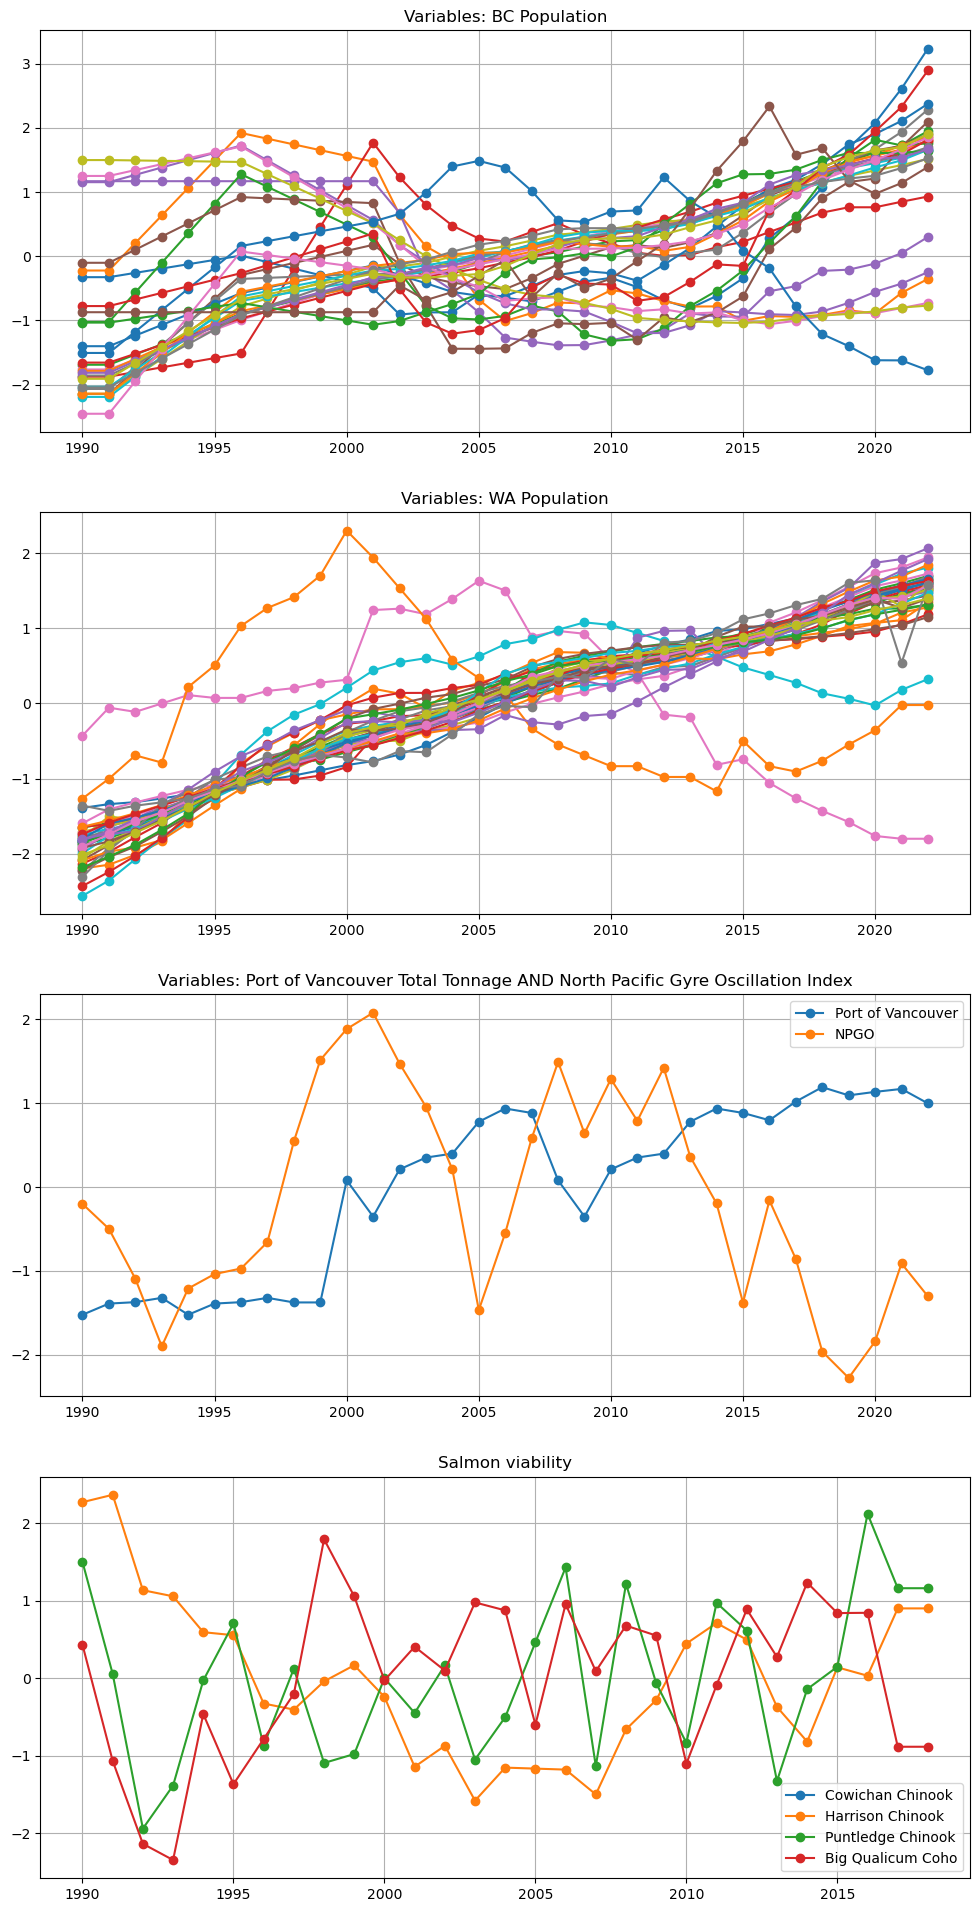

In [11]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)


fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (12,24))


#Plotting BC Regional District population vs Year
ax1.set_title("Variables: BC Population")

ax1.plot(time_wd,BC_pop_nrm.iloc[:,1],marker = "o",label = BC_pop.columns[1])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,2],marker = "o",label = BC_pop.columns[2])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,3],marker = "o",label = BC_pop.columns[3])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,4],marker = "o",label = BC_pop.columns[4])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,5],marker = "o",label = BC_pop.columns[5])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,6],marker = "o",label = BC_pop.columns[6])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,7],marker = "o",label = BC_pop.columns[7])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,8],marker = "o",label = BC_pop.columns[8])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,9],marker = "o",label = BC_pop.columns[9])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,10],marker = "o",label = BC_pop.columns[10])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,11],marker = "o",label = BC_pop.columns[11])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,12],marker = "o",label = BC_pop.columns[12])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,13],marker = "o",label = BC_pop.columns[13])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,14],marker = "o",label = BC_pop.columns[14])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,15],marker = "o",label = BC_pop.columns[15])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,16],marker = "o",label = BC_pop.columns[16])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,17],marker = "o",label = BC_pop.columns[17])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,18],marker = "o",label = BC_pop.columns[18])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,19],marker = "o",label = BC_pop.columns[19])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,20],marker = "o",label = BC_pop.columns[20])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,21],marker = "o",label = BC_pop.columns[21])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,22],marker = "o",label = BC_pop.columns[22])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,23],marker = "o",label = BC_pop.columns[23])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,24],marker = "o",label = BC_pop.columns[24])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,25],marker = "o",label = BC_pop.columns[25])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,26],marker = "o",label = BC_pop.columns[26])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,27],marker = "o",label = BC_pop.columns[27])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,28],marker = "o",label = BC_pop.columns[28])
ax1.plot(time_wd,BC_pop_nrm.iloc[:,29],marker = "o",label = BC_pop.columns[29])

#ax1.legend()
ax1.grid()


#Plotting WA County population vs Year
ax2.set_title("Variables: WA Population")

ax2.plot(time_wd,WA_pop_nrm.iloc[:,1],marker = "o",label = WA_pop_nrm.columns[1])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,2],marker = "o",label = WA_pop_nrm.columns[2])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,3],marker = "o",label = WA_pop_nrm.columns[3])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,4],marker = "o",label = WA_pop_nrm.columns[4])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,5],marker = "o",label = WA_pop_nrm.columns[5])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,6],marker = "o",label = WA_pop_nrm.columns[6])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,7],marker = "o",label = WA_pop_nrm.columns[7])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,8],marker = "o",label = WA_pop_nrm.columns[8])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,9],marker = "o",label = WA_pop_nrm.columns[9])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,10],marker = "o",label = WA_pop_nrm.columns[10])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,11],marker = "o",label = WA_pop_nrm.columns[11])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,12],marker = "o",label = WA_pop_nrm.columns[12])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,13],marker = "o",label = WA_pop_nrm.columns[13])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,14],marker = "o",label = WA_pop_nrm.columns[14])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,15],marker = "o",label = WA_pop_nrm.columns[15])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,16],marker = "o",label = WA_pop_nrm.columns[16])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,17],marker = "o",label = WA_pop_nrm.columns[17])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,18],marker = "o",label = WA_pop_nrm.columns[18])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,19],marker = "o",label = WA_pop_nrm.columns[19])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,20],marker = "o",label = WA_pop_nrm.columns[20])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,21],marker = "o",label = WA_pop_nrm.columns[21])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,22],marker = "o",label = WA_pop_nrm.columns[22])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,23],marker = "o",label = WA_pop_nrm.columns[23])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,24],marker = "o",label = WA_pop_nrm.columns[24])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,25],marker = "o",label = WA_pop_nrm.columns[25])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,26],marker = "o",label = WA_pop_nrm.columns[26])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,27],marker = "o",label = WA_pop_nrm.columns[27])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,28],marker = "o",label = WA_pop_nrm.columns[28])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,29],marker = "o",label = WA_pop_nrm.columns[29])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,30],marker = "o",label = WA_pop_nrm.columns[30])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,31],marker = "o",label = WA_pop_nrm.columns[31])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,32],marker = "o",label = WA_pop_nrm.columns[32])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,33],marker = "o",label = WA_pop_nrm.columns[33])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,34],marker = "o",label = WA_pop_nrm.columns[34])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,35],marker = "o",label = WA_pop_nrm.columns[35])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,36],marker = "o",label = WA_pop_nrm.columns[36])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,37],marker = "o",label = WA_pop_nrm.columns[37])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,38],marker = "o",label = WA_pop_nrm.columns[38])
ax2.plot(time_wd,WA_pop_nrm.iloc[:,39],marker = "o",label = WA_pop_nrm.columns[39])

#ax2.legend()
ax2.grid()


#Plotting Port of Vancouver activity & NPGO vs Year
ax3.set_title("Variables: Port of Vancouver Total Tonnage AND North Pacific Gyre Oscillation Index")

ax3.plot(time_wd,Port_of_Van_nrm.iloc[:,1],marker = "o",label = 'Port of Vancouver')
ax3.plot(time_wd,NPGO.iloc[:,1],marker = "o",label = 'NPGO')

ax3.legend(loc = 'best')
ax3.grid()


#Plotting Salmon viability vs Year
ax4.set_title("Salmon viability")

ax4.plot(time_sal,Sal_viab_nrm.iloc[:,0],marker = "o",label = 'Cowichan Chinook')
ax4.plot(time_sal,Sal_viab_nrm.iloc[:,1],marker = "o",label = 'Harrison Chinook')
ax4.plot(time_sal,Sal_viab_nrm.iloc[:,2],marker = "o",label = 'Puntledge Chinook')
ax4.plot(time_sal,Sal_viab_nrm.iloc[:,3],marker = "o",label = 'Big Qualicum Coho')

ax4.legend(loc = 'best')
ax4.grid()

### Initial Comments on the Individual Variables

The BC population data appears to be much more variable than the WA population data overall.  

In BC, at a quick glance, there appear to be two main trends: a group of Regional Districts appears to have a similar linearly increasing trend; while another group drops from mid-1990 peaks until the mid-2000s, and then increases in the late 2010s.  To do lasso feature selection, we group BC Regional Districts by broader regions and overall trend shapes.

In WA, the vast majority of Counties show a similar linearly increasing trend, but there are three outliers with noticable peaks in the early-to-mid 2000s and drops in the mid-to-late 2020s.

There is also some limited data on marine economic activity, from two sources.  This follows a similar trend to overall population growth, which is not surprising.  Superimposed on this is a climatological index called the North Pacific Gyre Oscillation.

# Exploratory Data Analysis via seaborn.pairplot

In [12]:
import seaborn as sns

## Tonnage at Port of Vancouver and NGPO Index vs Salmon Viability

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


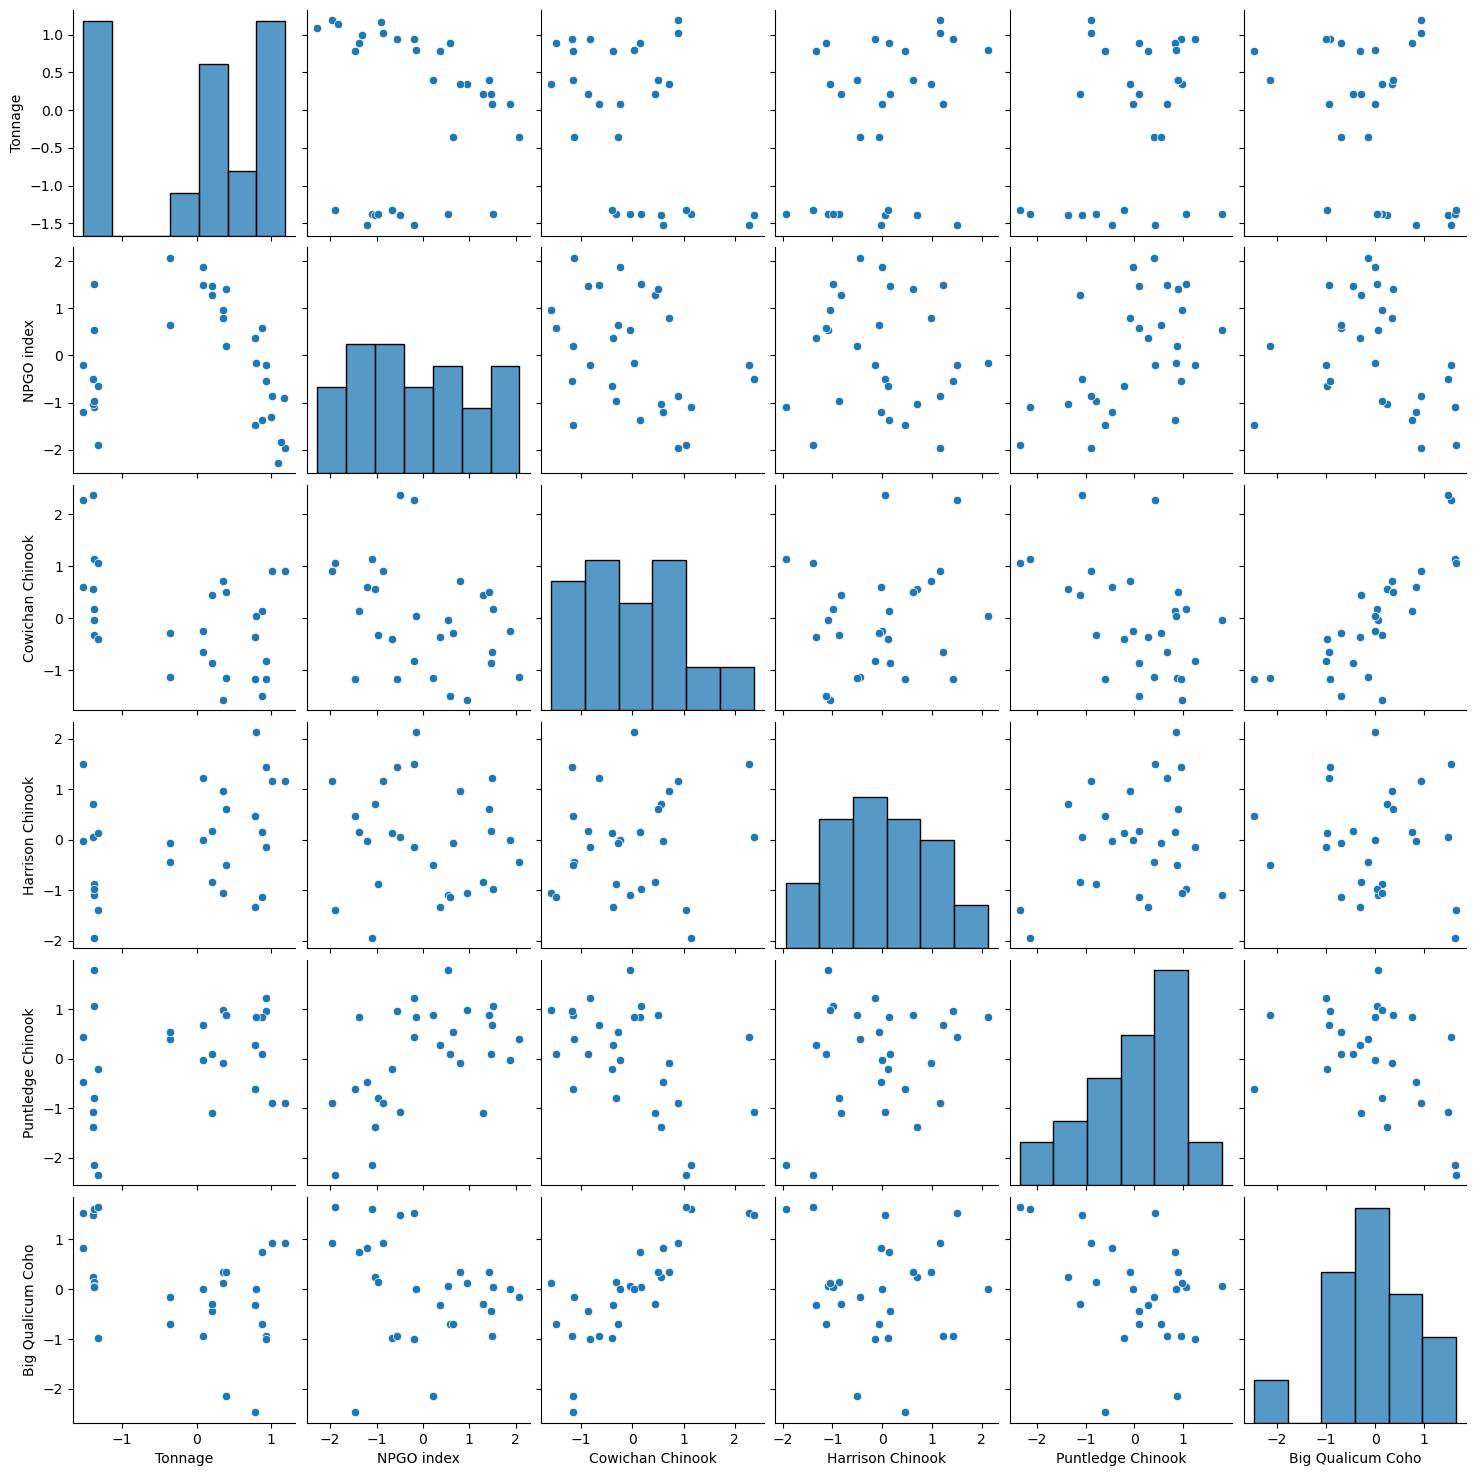

In [13]:
# let's look only at the non-population variables here, and their correlations with salmon viability
Explore1 = pd.concat([Port_of_Van_nrm.drop(columns=['Year']),NPGO.drop(columns=['Year']), Sal_viab_nrm.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore1[Explore1.columns])

plt.show()

### Comments

There seems to be a negative relationship between NGPO and Cowichan Chinook.

There might be a negative relationship between NGPO and Harrison Chinook.

There seems to be a positive relationship between NGPO and Puntledge Chinook.

There seems to be a negative relationship between NGPO and Big Qualicum Coho.

## BC Regional District Populations vs Salmon Viability

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


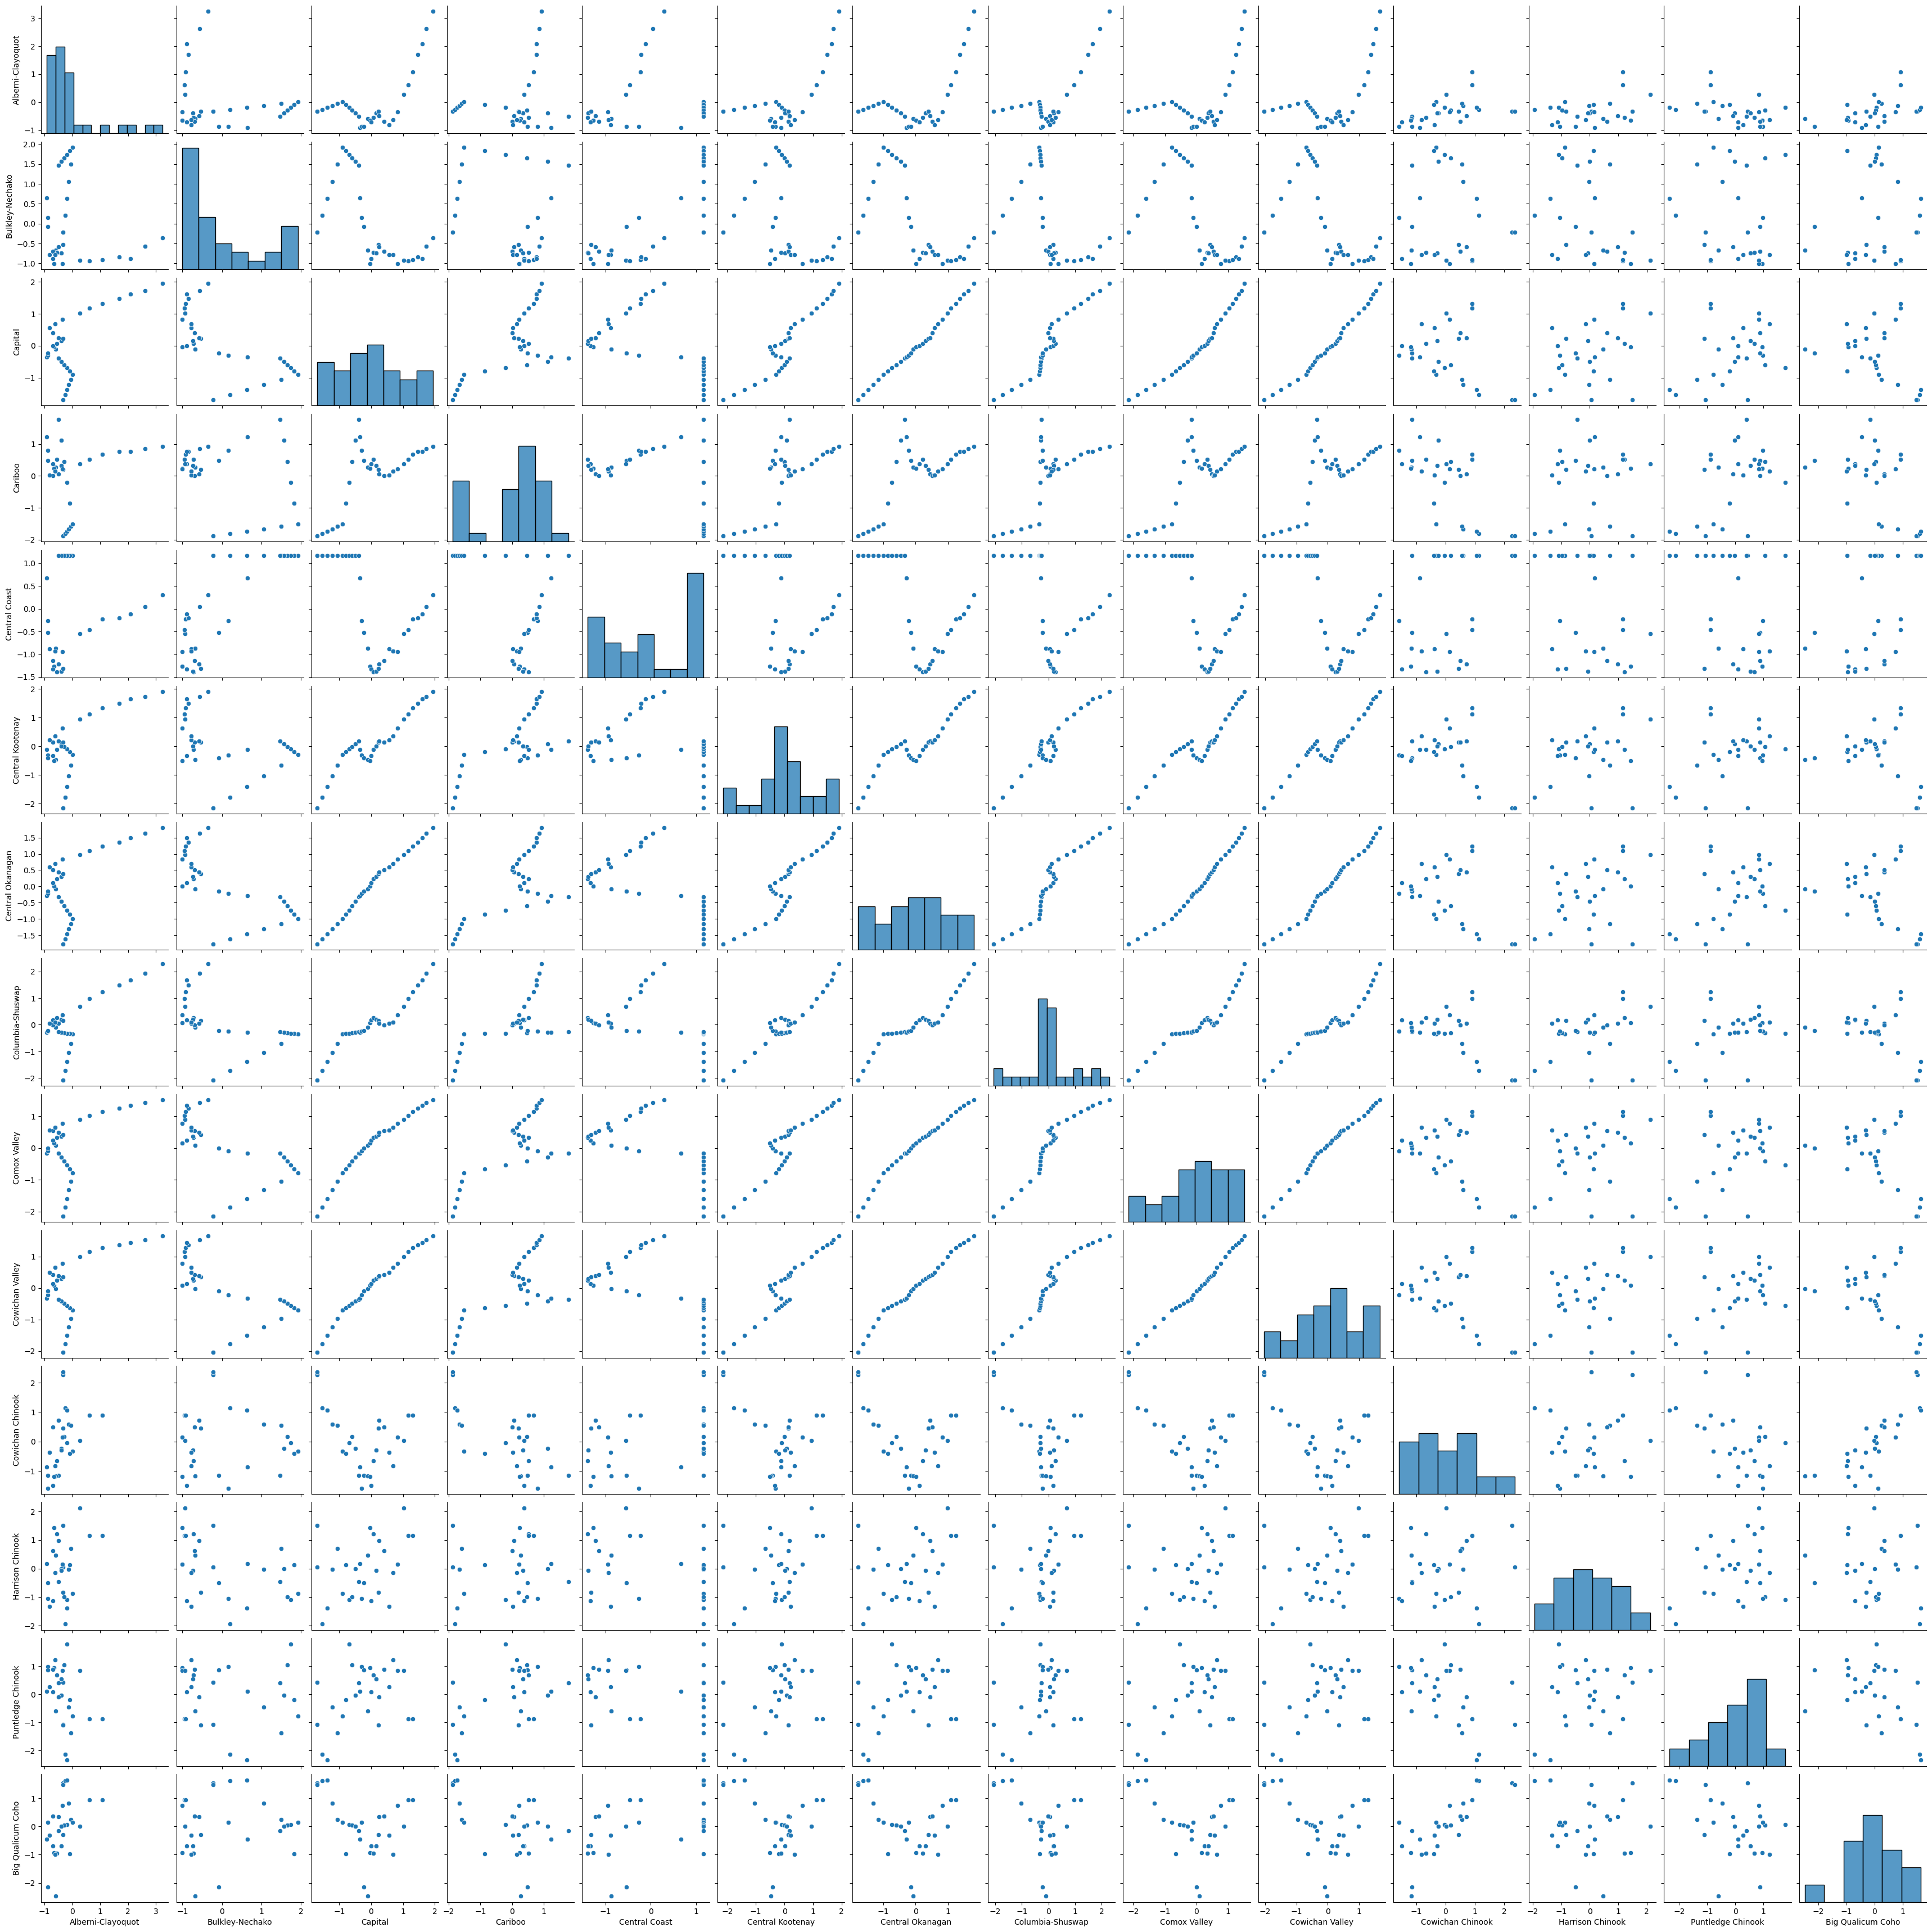

In [14]:
# look at the correlations between the first ten Regional Districts and salmon viability
Explore_BC_pop_1 = pd.concat([BC_pop_nrm.drop(columns=['Year']).iloc[:,0:10],Sal_viab_nrm.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore_BC_pop_1[Explore_BC_pop_1.columns])

plt.show()

Perhaps Capital & Cariboo are worth keeping?

The last few are similar to Capital; hard for me to say here, but maybe there is some negative relationship between Cowichan Chinook and these populations

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


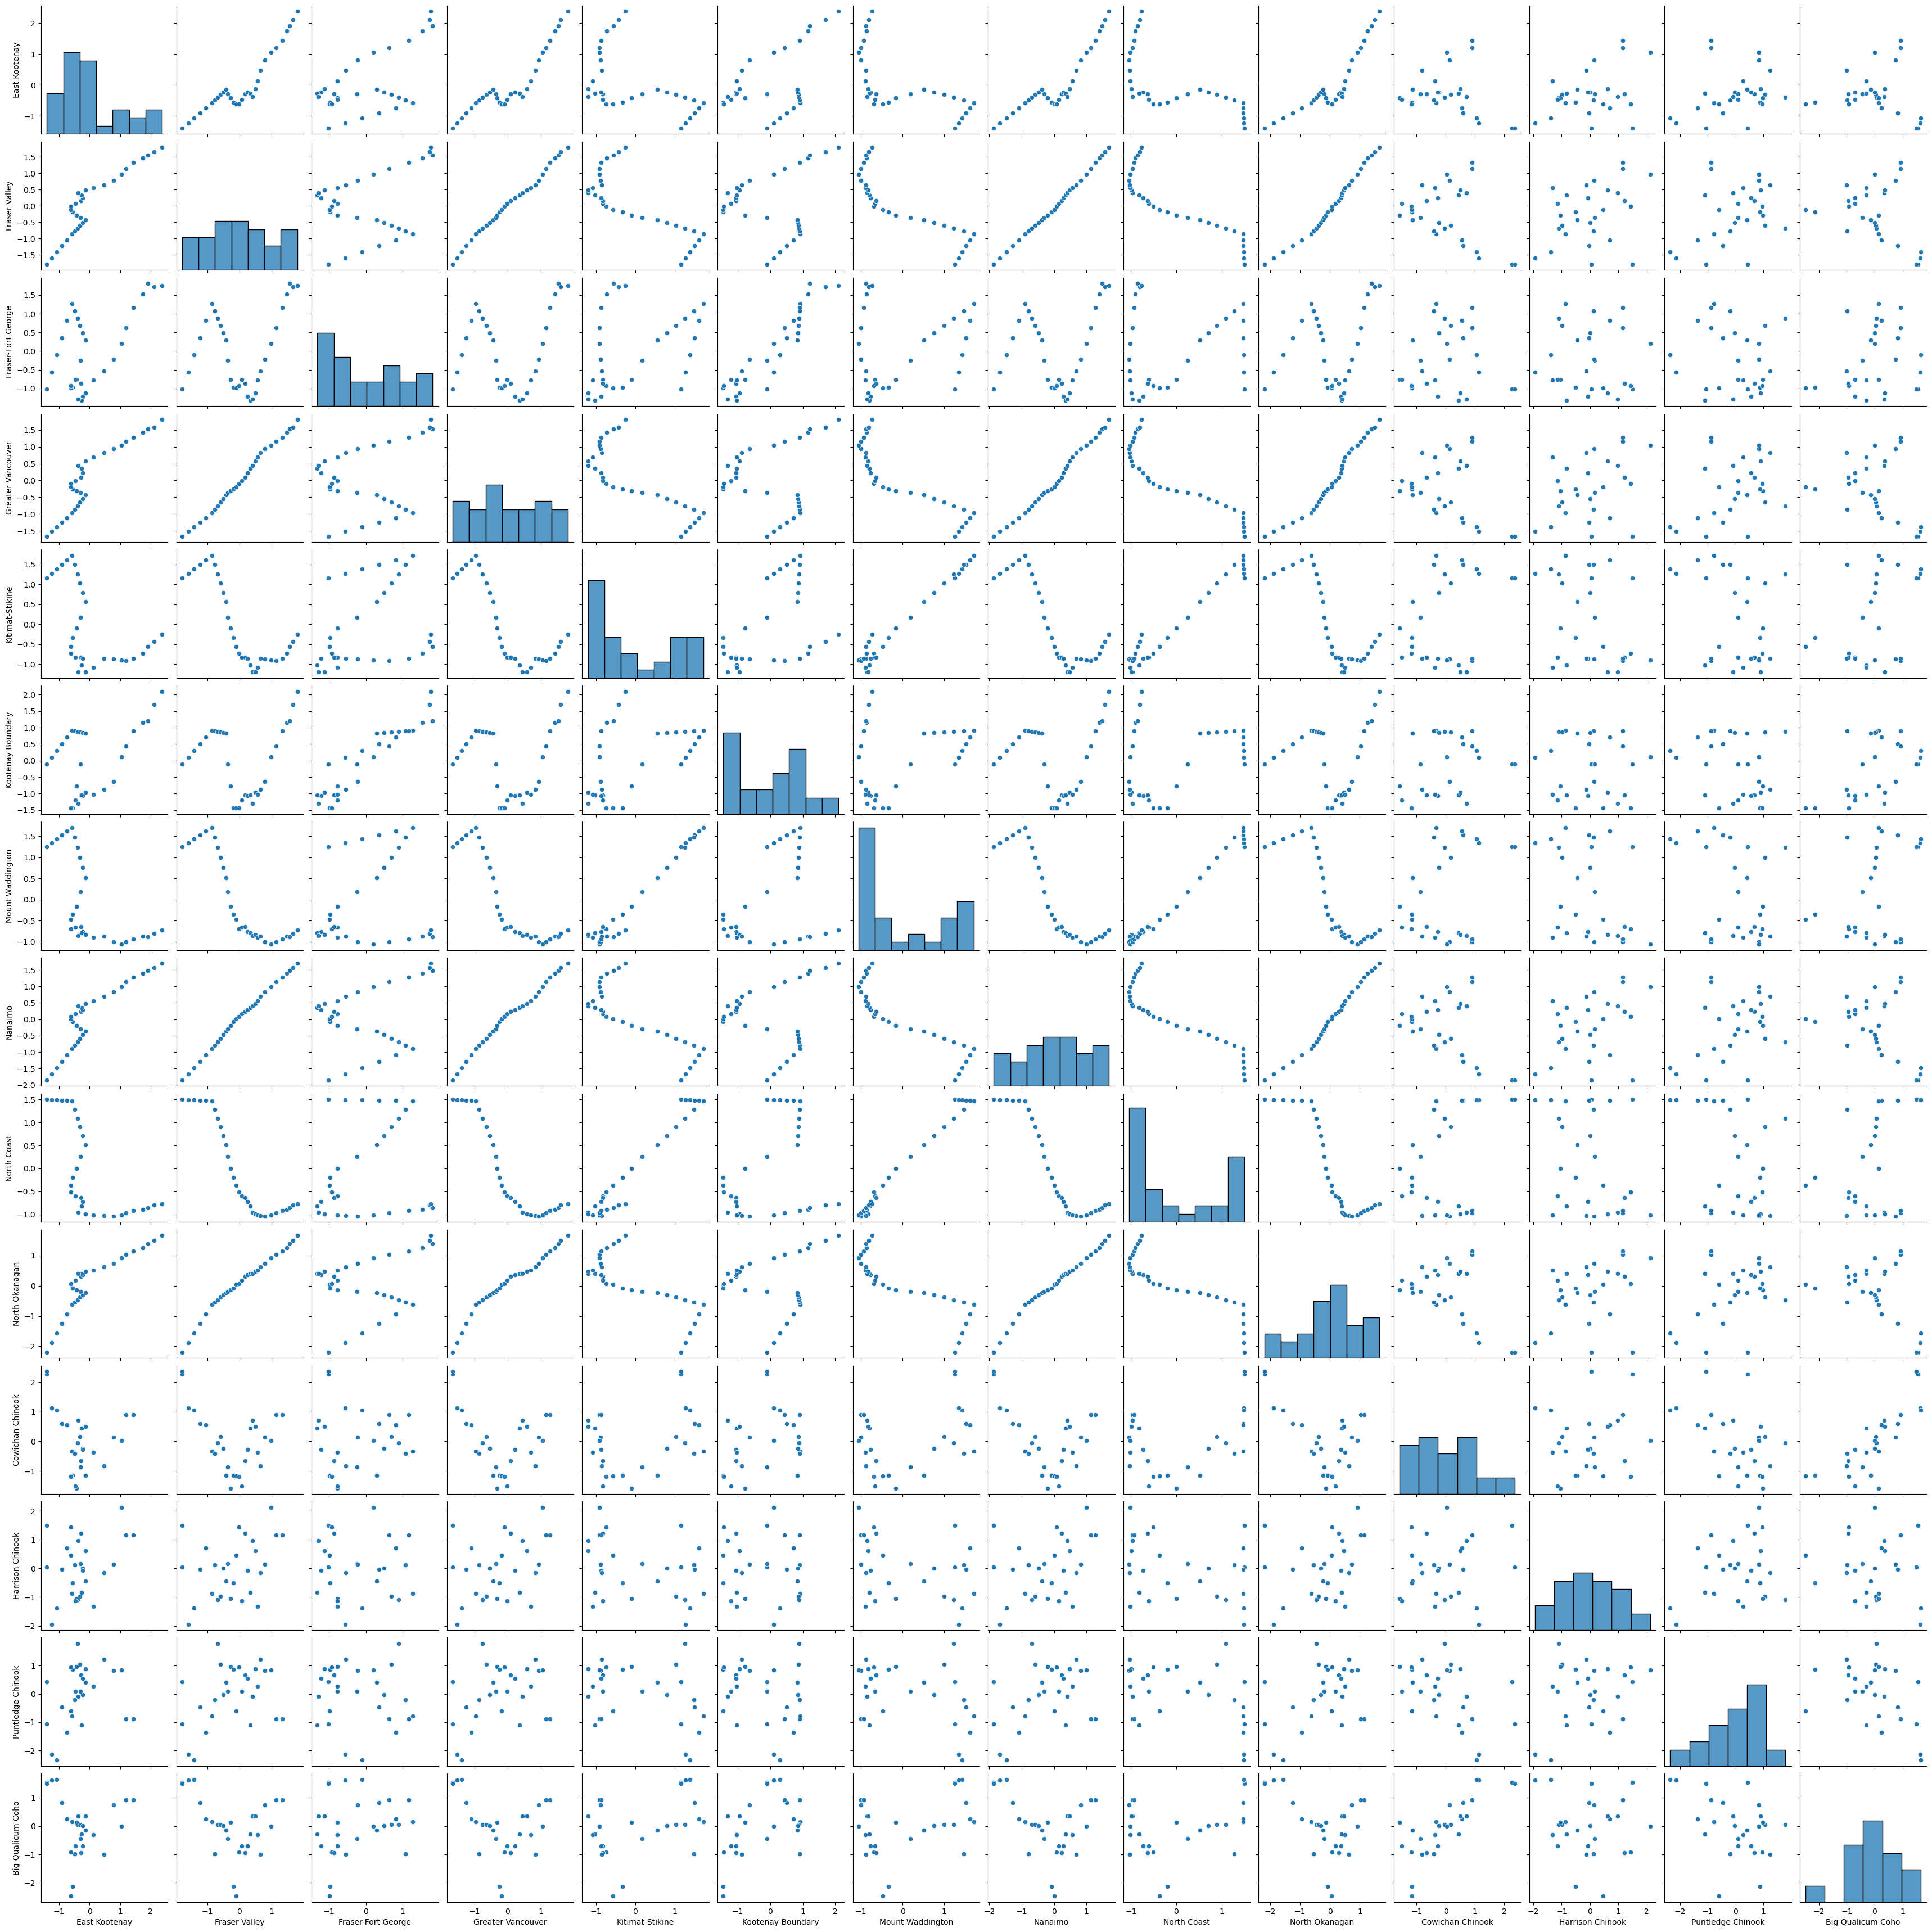

In [15]:
# look at the correlation between the second ten Regional Districts and salmon viability
Explore_BC_pop_2 = pd.concat([BC_pop_nrm.drop(columns=['Year']).iloc[:,10:20],Sal_viab_nrm.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore_BC_pop_2[Explore_BC_pop_2.columns])

plt.show()

Keep an eye on Fraser Valley, Greater Vancouver, Nanaimo, North Okanagan (they are very similar).

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


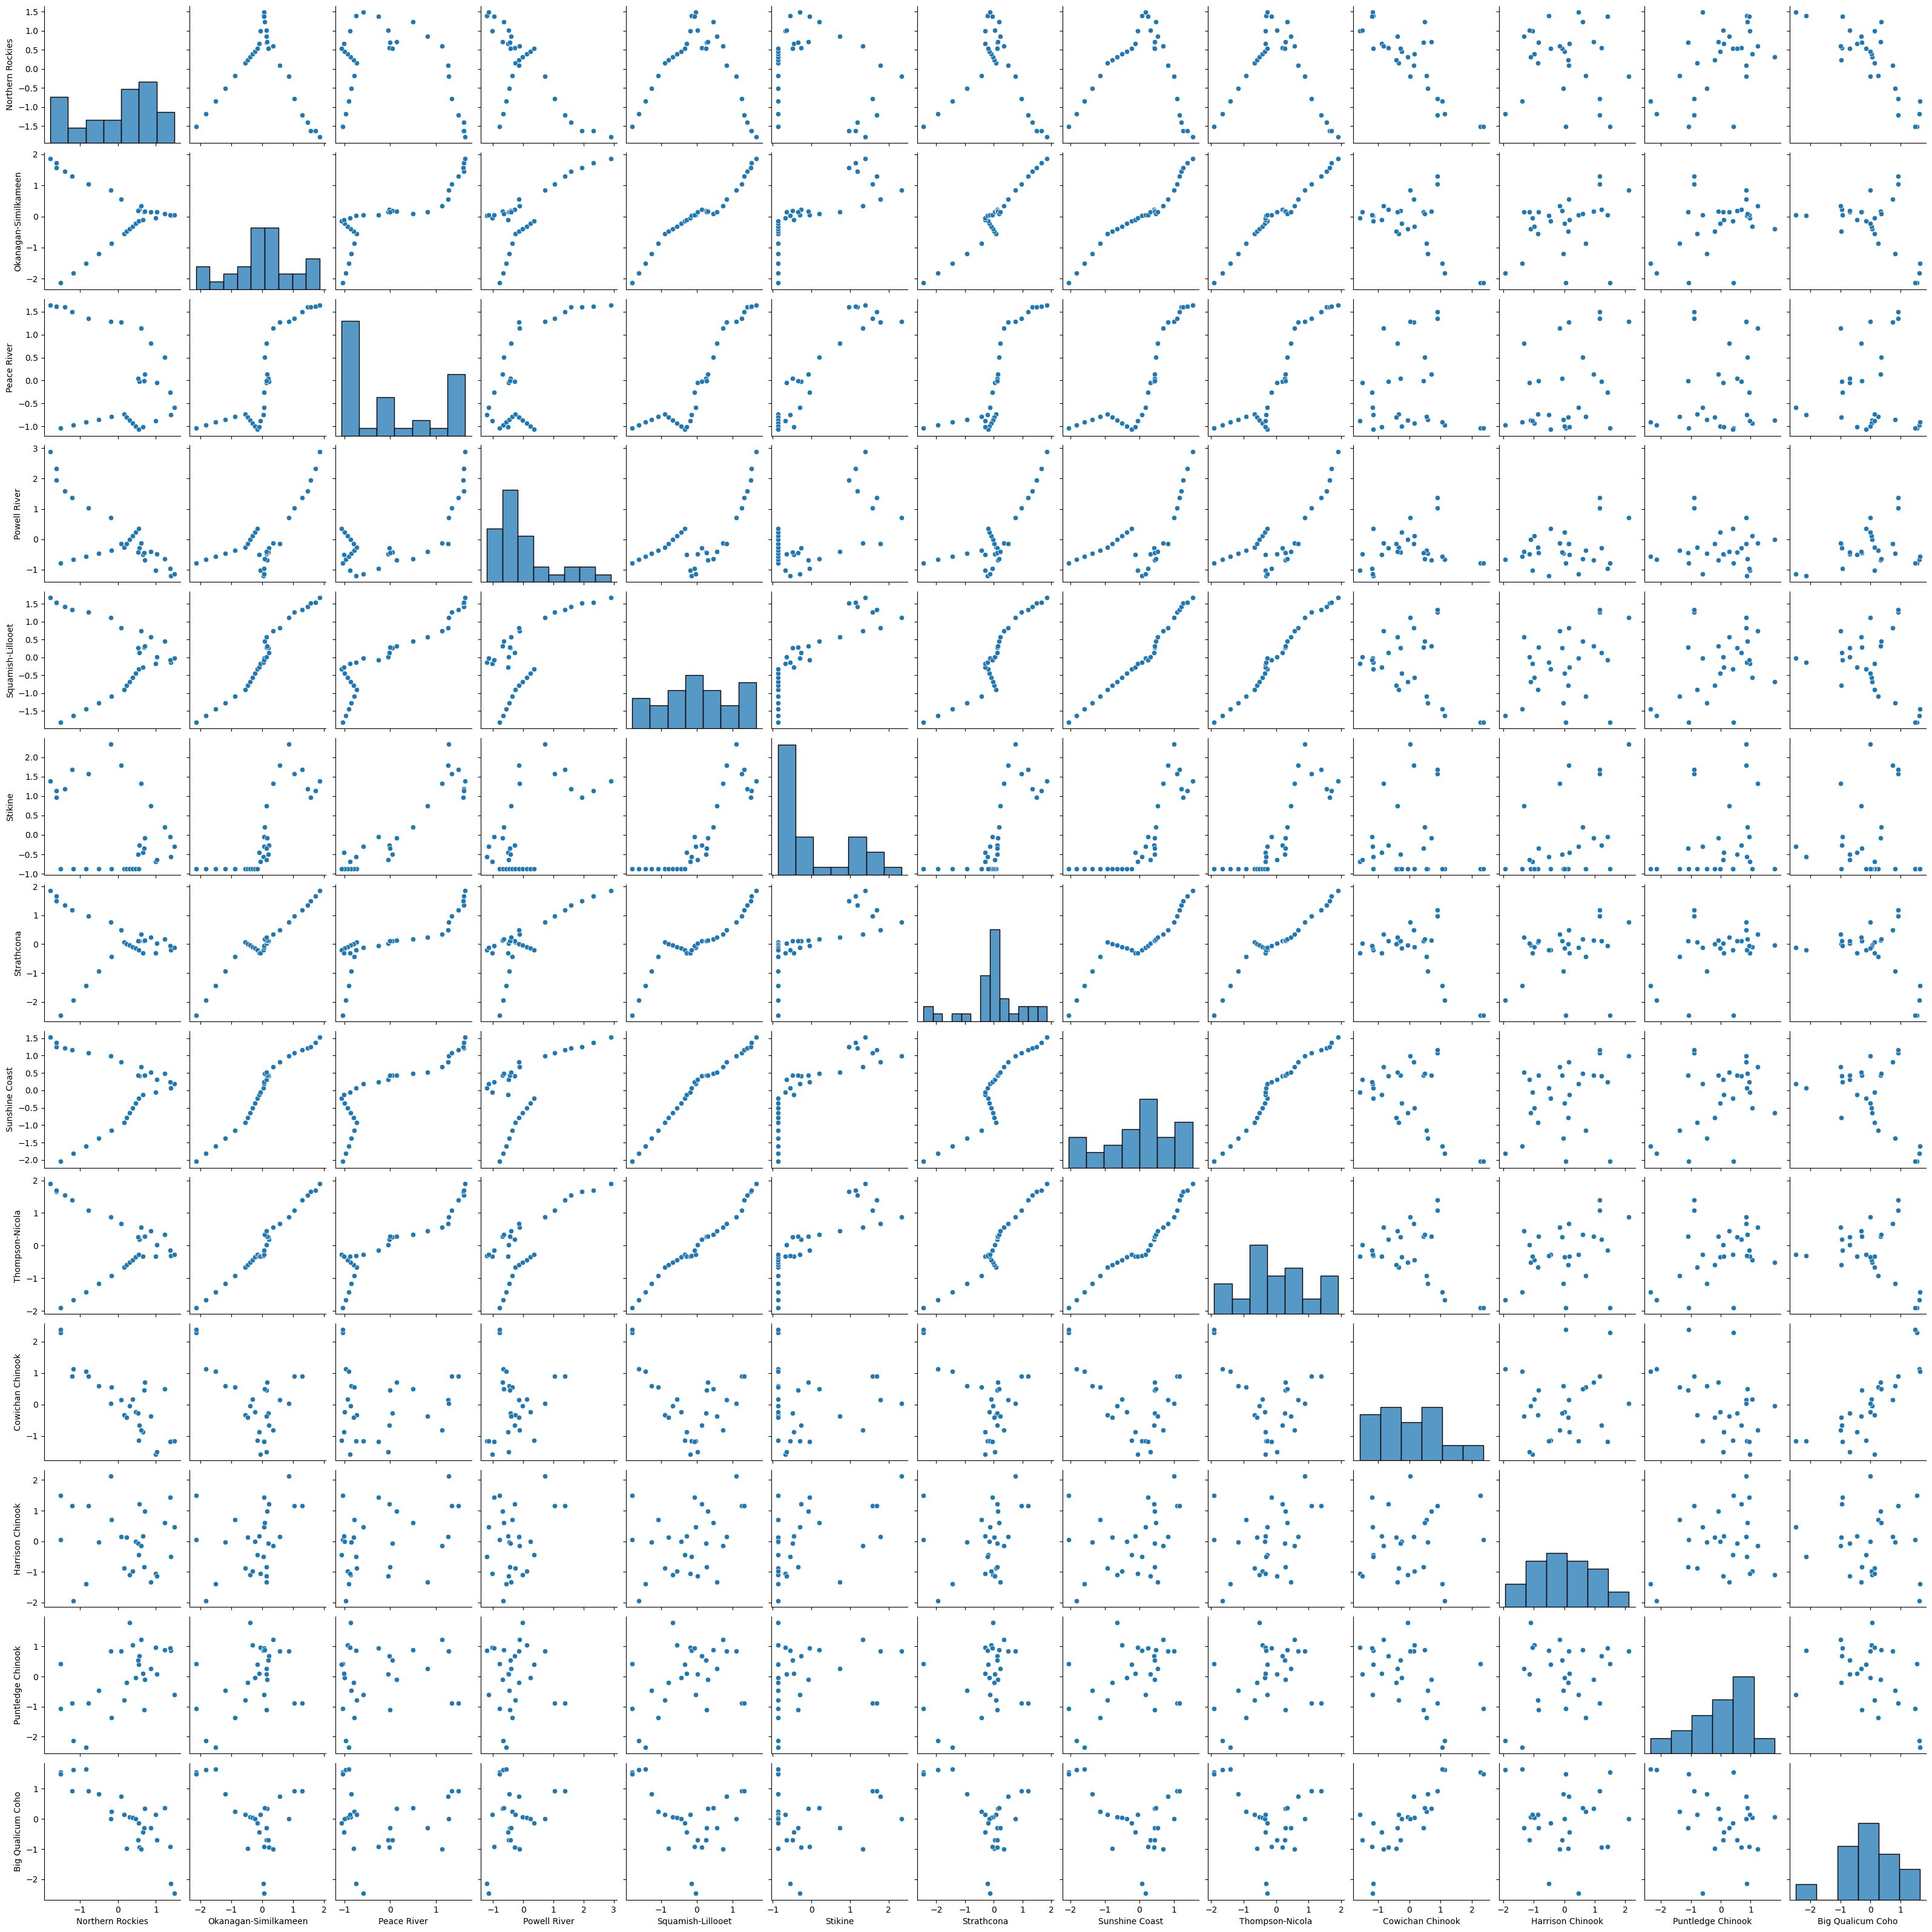

In [16]:
# look at the correlation between the third ten Regional Districts and salmon viability
Explore_BC_pop_3 = pd.concat([BC_pop_nrm.drop(columns=['Year']).iloc[:,20:30],Sal_viab_nrm.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore_BC_pop_3[Explore_BC_pop_3.columns])

plt.show()

Keep an eye on Northern Rockies, Okanagan-Similkameen, Squamish-Lillooet.

Also keep an eye on Sunshine Coast and Thompson-Nicola?  Stikine (too remote)?

## WA County Populations vs Salmon Viability

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


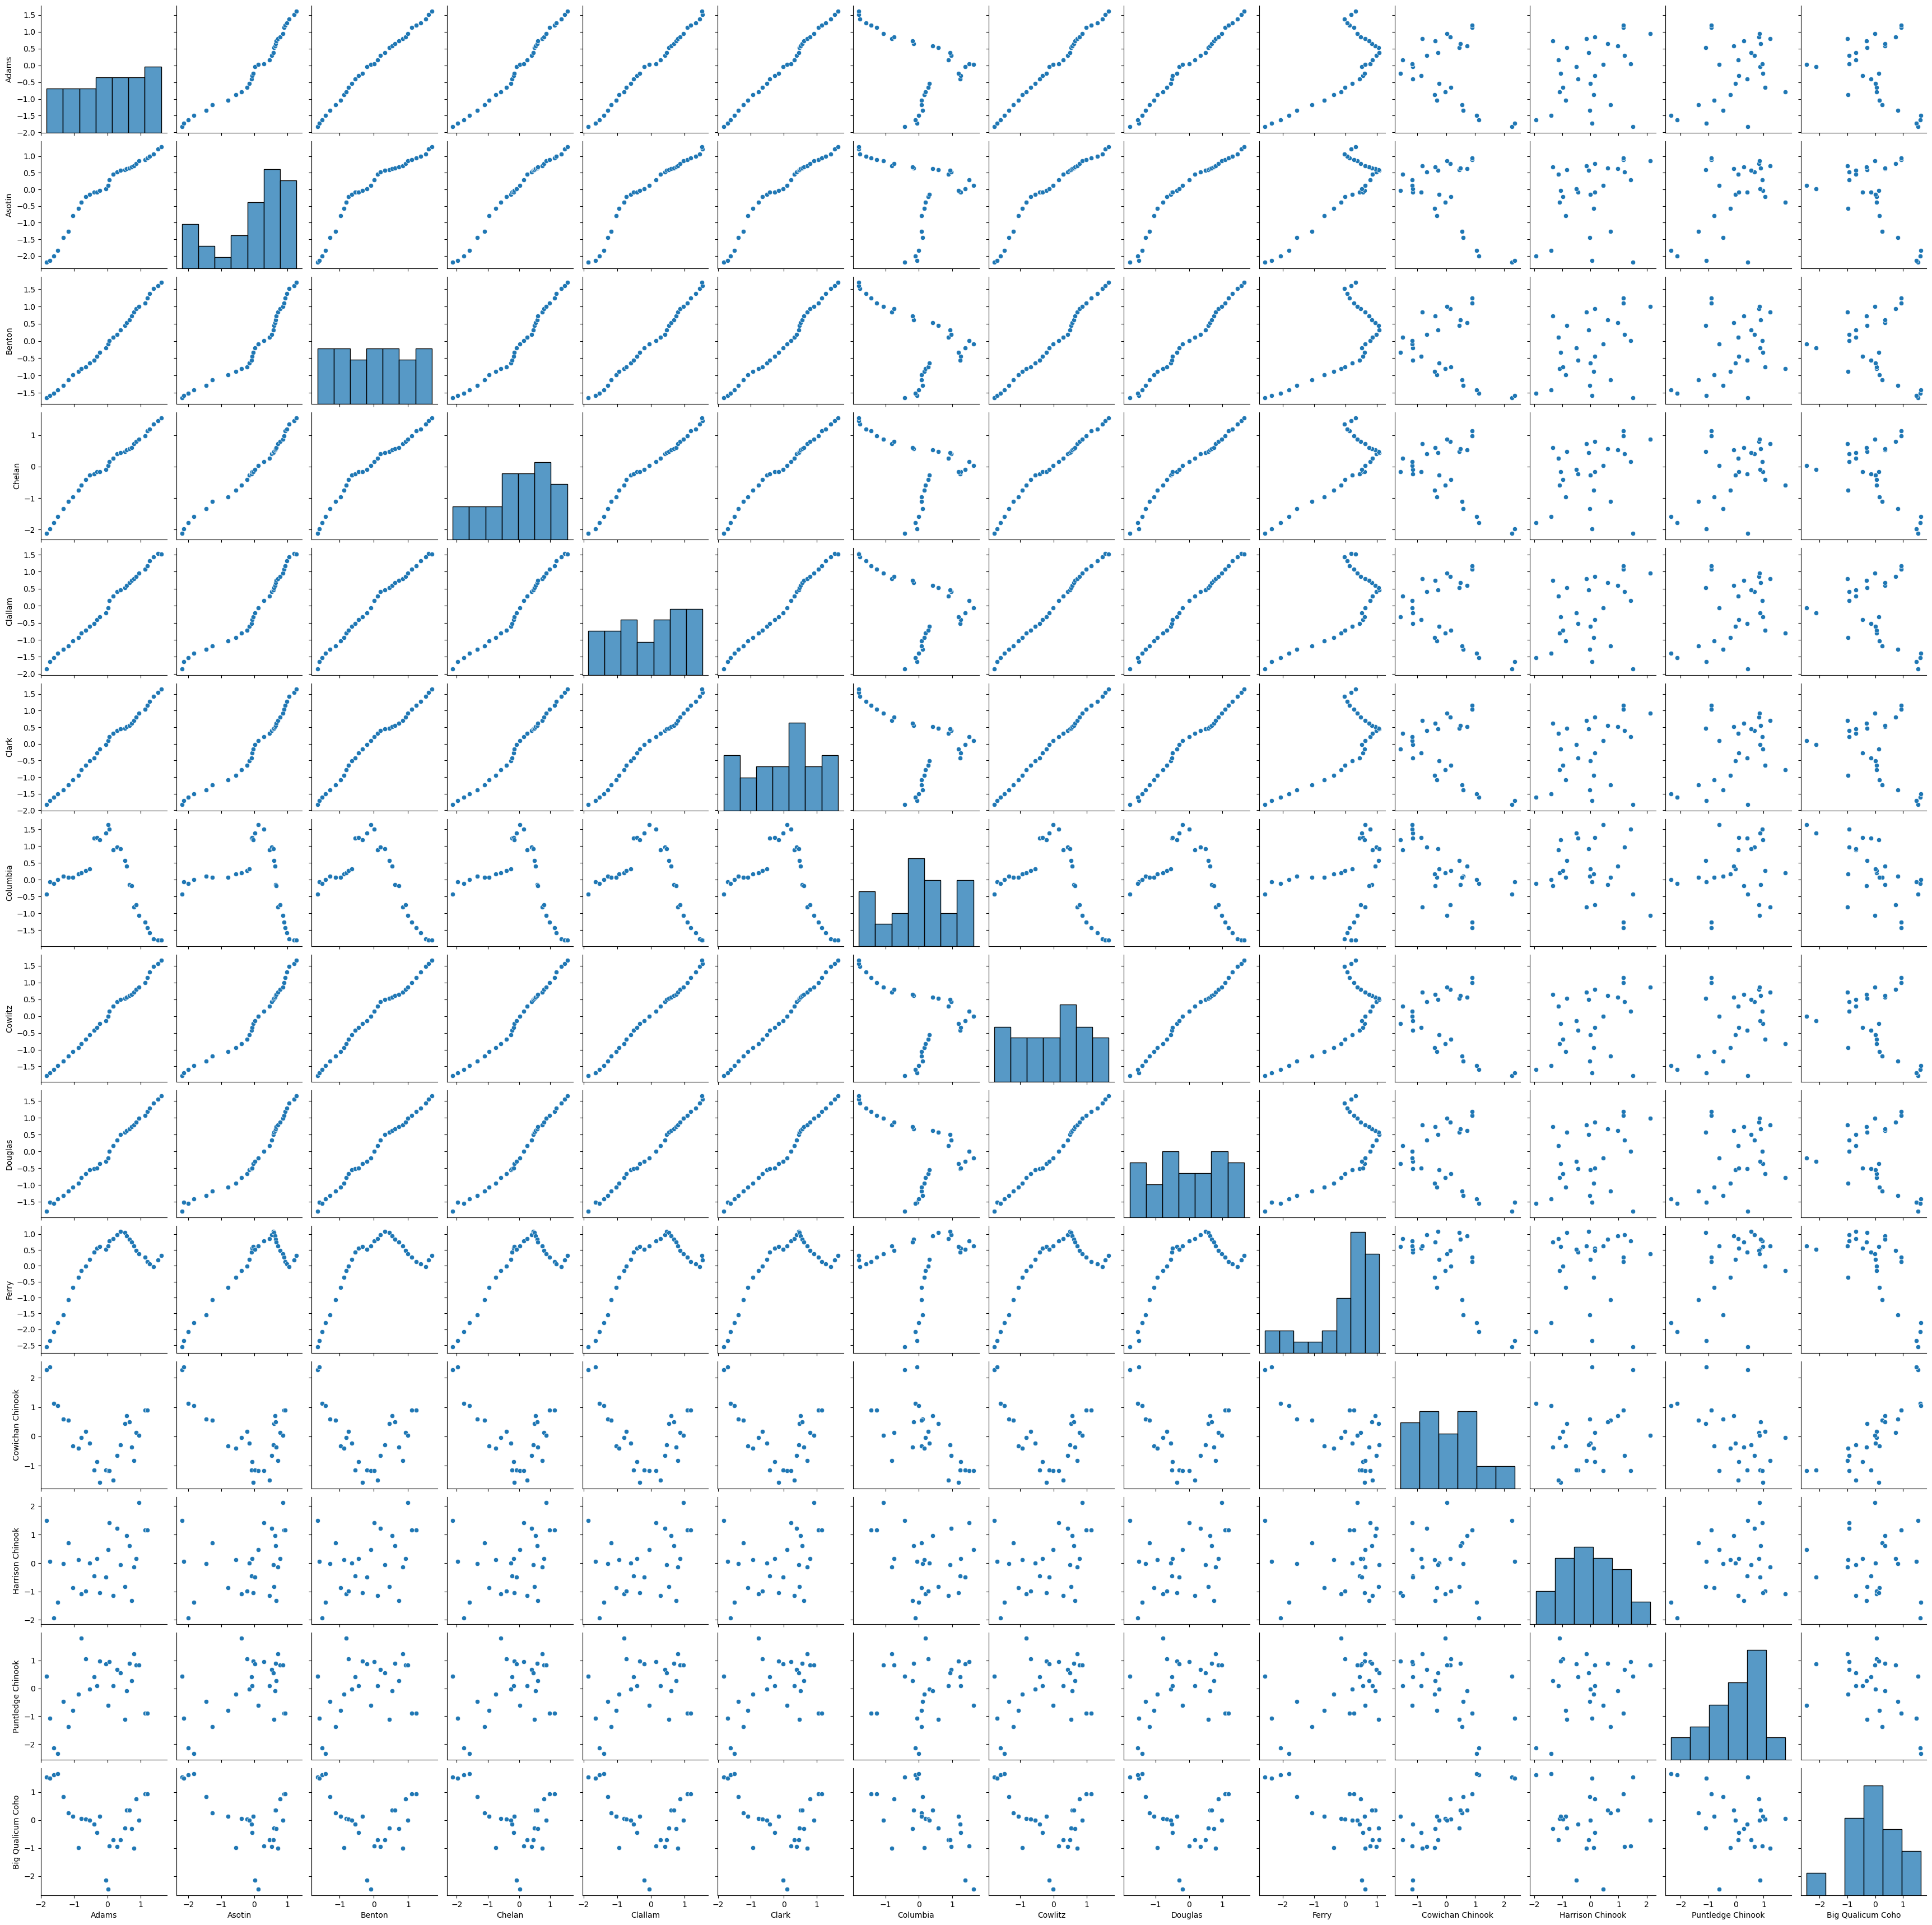

In [17]:
# look at the correlation between the first ten Counties and salmon viability
Explore_WA_pop_1 = pd.concat([WA_pop_nrm.drop(columns=['Year']).iloc[:,0:10],Sal_viab_nrm.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore_WA_pop_1[Explore_WA_pop_1.columns])

plt.show()

Most of these have the same shape!  Group them together?

On the other hand, Columbia and Ferry are different, and Ferry looks like it has negative correlation with salmon viability.

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


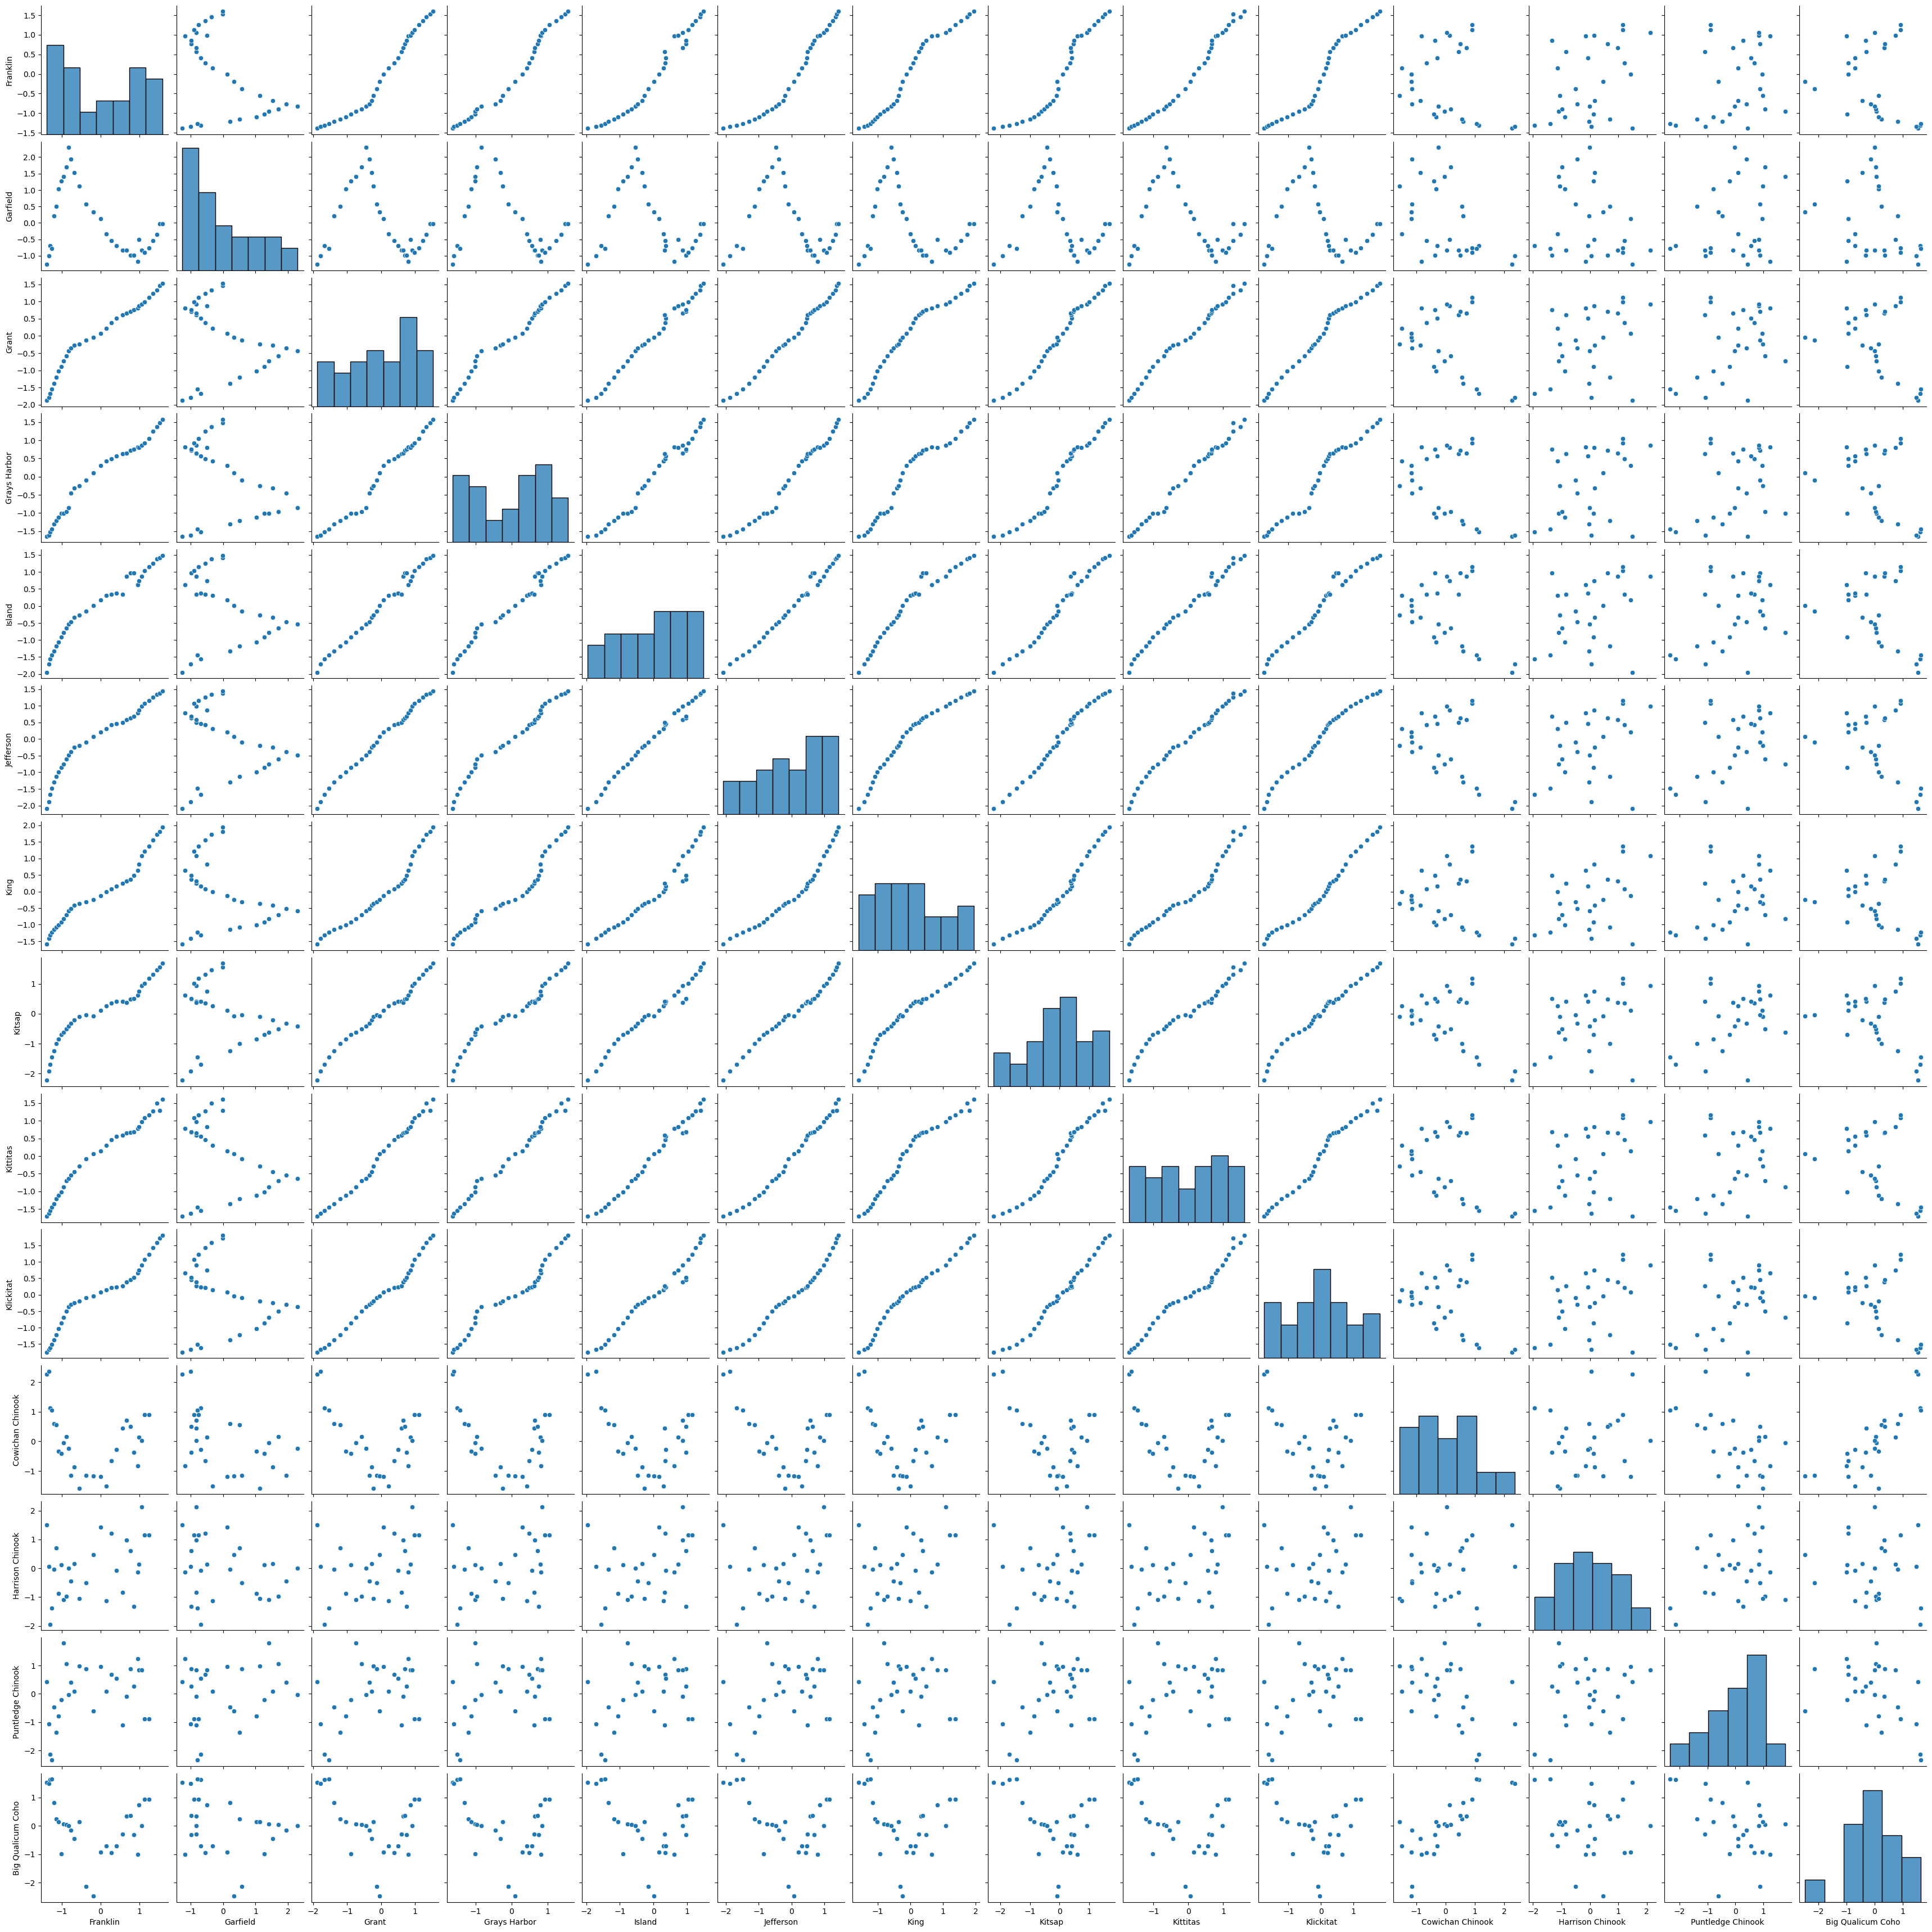

In [18]:
Explore_WA_pop_2 = pd.concat([WA_pop_nrm.drop(columns=['Year']).iloc[:,10:20],Sal_viab_nrm.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore_WA_pop_2[Explore_WA_pop_2.columns])

plt.show()

Garfield is the outlier here, but I don't see a clear relationship between it and Salmon viability.

The other Counties have the typical relationship.

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


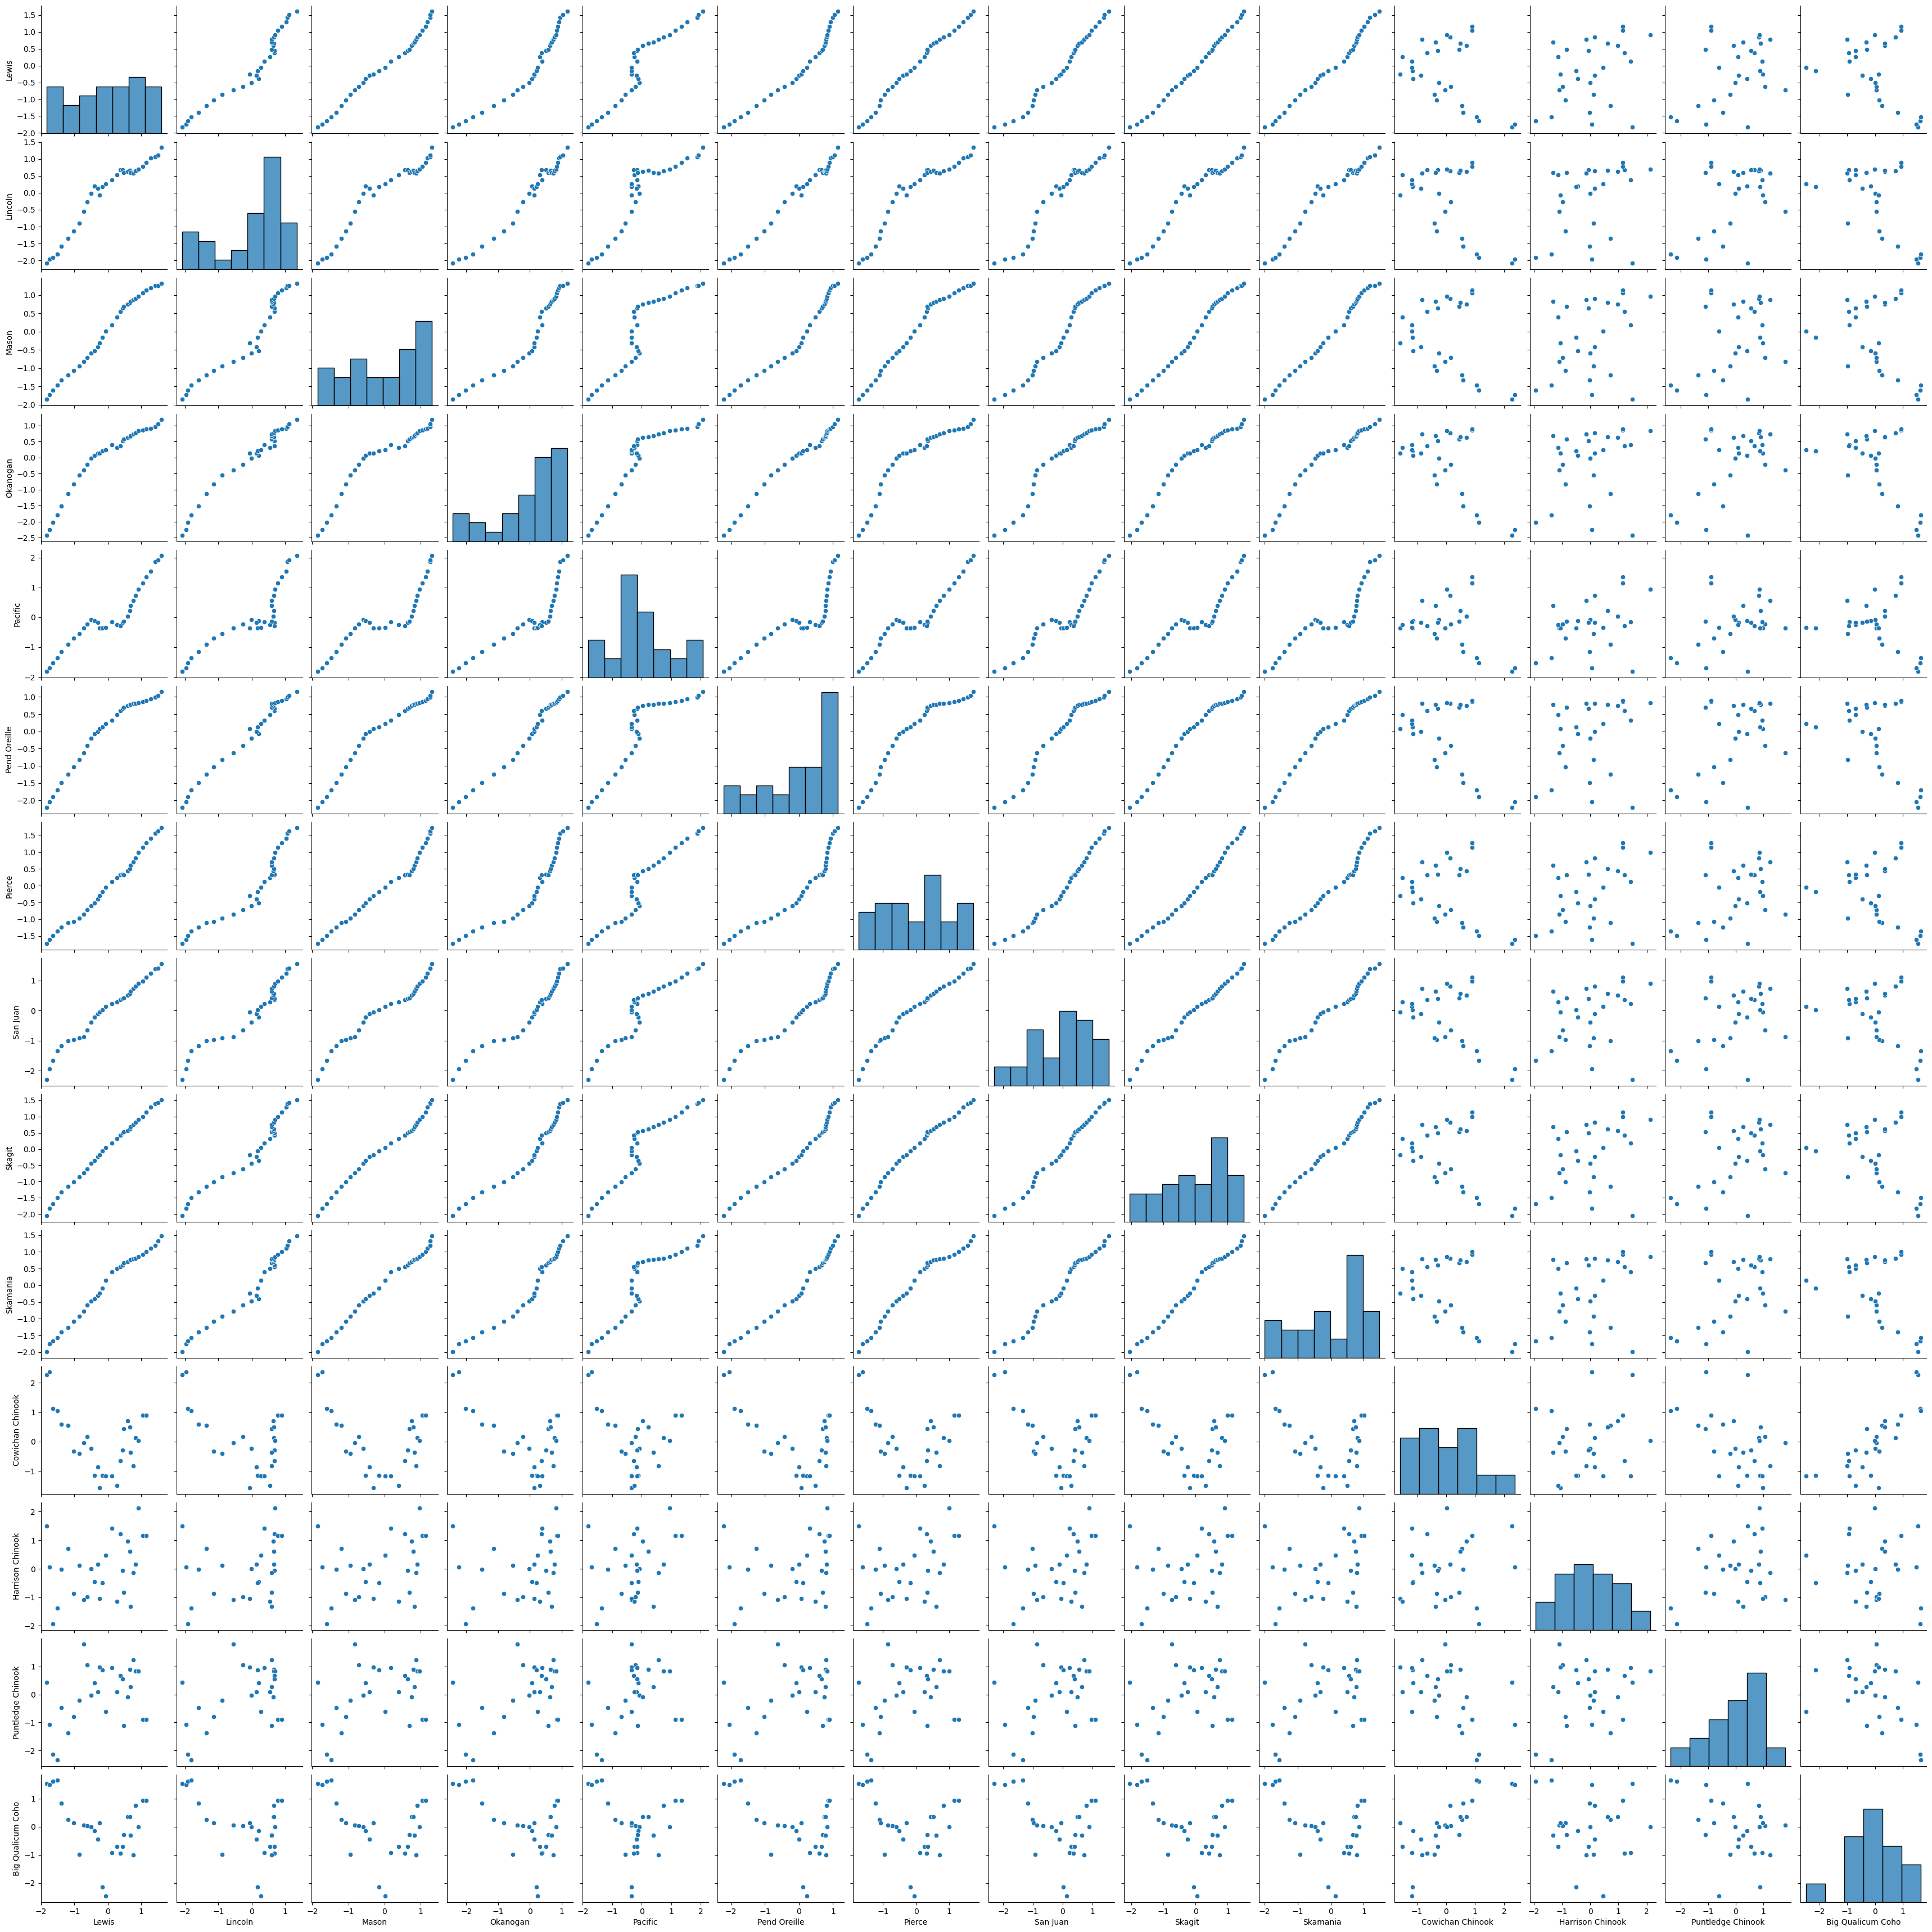

In [19]:
Explore_WA_pop_3 = pd.concat([WA_pop_nrm.drop(columns=['Year']).iloc[:,20:30],Sal_viab_nrm.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore_WA_pop_3[Explore_WA_pop_3.columns])

plt.show()

Again, these are all similar!

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


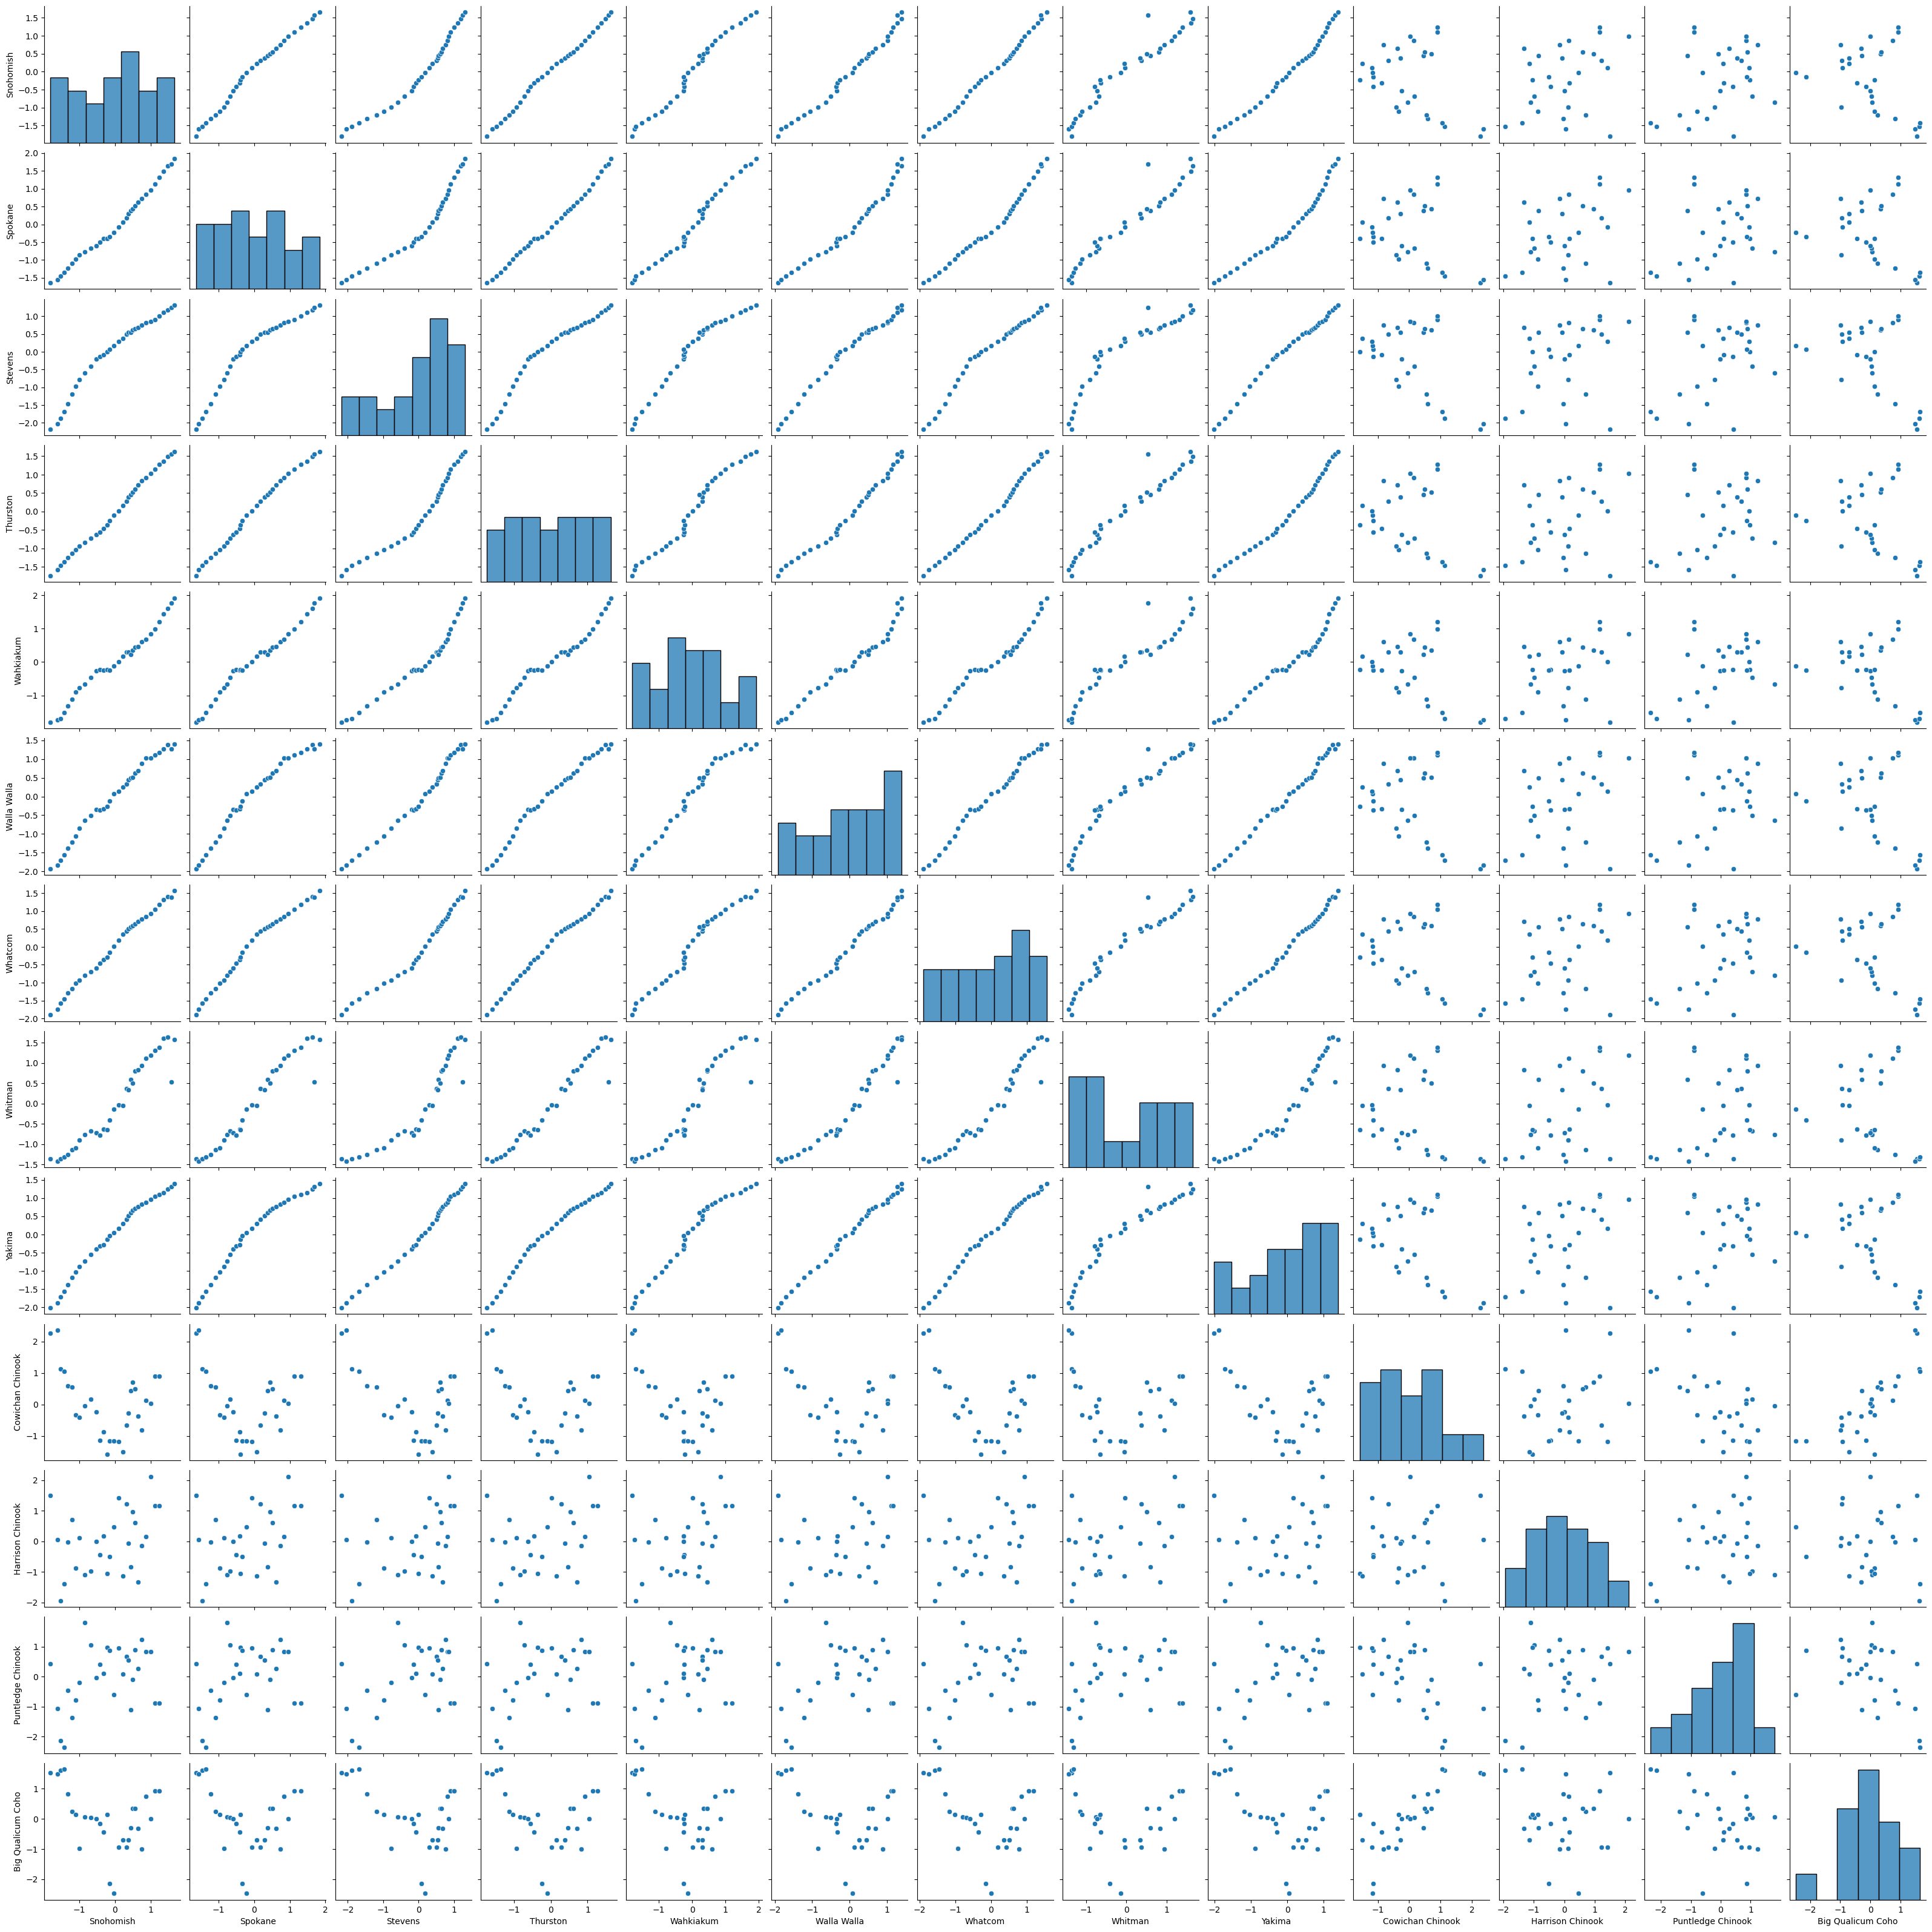

In [20]:
Explore_WA_pop_4 = pd.concat([WA_pop_nrm.drop(columns=['Year']).iloc[:,30:40],Sal_viab_nrm.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore_WA_pop_4[Explore_WA_pop_4.columns])

plt.show()

Again, these are all similar!

## Fraser River Water Quality vs Salmon Viability

We also have some water quality data, which has far too many variables to compare visually.  Let's import this data and use this to motivate using lasso feature selection.

In [21]:
# importing the Fraser river water quality csv, cleaned to have yearly average values
Fraser_water_qual = pd.read_csv('../OtherData/WaterQuality/Fraser_water_qual.csv')
Fraser_water_qual.tail()

Time  ALKALINITY TOTAL CACO3  ALUMINUM TOTAL  BARIUM EXTRACTABLE  \
19  2019               53.825749      526.916786                 NaN   
20  2020               56.795349      250.873973                 NaN   
21  2021               55.452381      709.752174                 NaN   
22  2022               54.711852      670.697021                 NaN   
23  2023               56.763636      885.372868                 NaN   

    BARIUM TOTAL  BERYLLIUM EXTRACTABLE  BERYLLIUM TOTAL  BORON EXTRACTABLE  \
19     19.689179                    NaN         0.015761                NaN   
20     17.409178                    NaN         0.009603                NaN   
21     20.863623                    NaN         0.023401                NaN   
22     21.062669                    NaN         0.022576                NaN   
23     25.528295                    NaN         0.029597                NaN   

    CADMIUM EXTRACTABLE  CADMIUM TOTAL  ...  CYANIDE WEAK ACID DISSOCIABLE  \
19                  NaN       0.014957  ...                       0.005000   
20                  NaN       0.012973  ...                       0.005000   
21                  NaN       0.017705  ...                       0.005278   
22                  NaN       0.025597  ...                       0.005000   
23                  NaN       0.024760  ...                       0.005238   

    BICARBONATE (CALCD.)  CARBONATE (CALCD.)  \
19                   NaN                 NaN   
20                   NaN                 NaN   
21                   NaN                 NaN   
22                   NaN                 NaN   
23                   NaN                 NaN   

    ORGANIC HALIDES (AOX) - ADSORBABLE  COLOUR TOTAL ABSORBANCE  \
19                                 NaN                      NaN   
20                                 NaN                      NaN   
21                                 NaN                      NaN   
22                                 NaN                      NaN   
23                                 NaN                      NaN   

    HYDROXIDE (CALCD.)  COLIFORMS TOTAL  BROMINE EXTRACTABLE  BROMIDE  \
19                 NaN              NaN                  NaN     0.05   
20                 NaN              NaN                  NaN     0.05   
21                 NaN           3200.0                  NaN     0.05   
22                 NaN              NaN                  NaN     0.05   
23                 NaN              NaN                  NaN     0.05   

    GRAN ALKALINITY (AS H+)  
19                      NaN  
20                      NaN  
21                      NaN  
22                      NaN  
23                      NaN  

[5 rows x 222 columns]

There are 222 variables here, so too many really to inspect visually, but we'll look at a few.

In [22]:
# the "extractable" variables have very limited years of data, so let's remove them right away
Fraser_drop = Fraser_water_qual

for var in Fraser_water_qual.columns[1:]:
    if 'EXTRACTABLE' in var:
        Fraser_drop = Fraser_drop.drop(columns=[var])

Fraser_drop.head()

Time  ALKALINITY TOTAL CACO3  ALUMINUM TOTAL  BARIUM TOTAL  \
0  2000               71.322857        0.606259      0.022070   
1  2001               60.568966        0.622333      0.021149   
2  2002               82.838298        0.923313      0.025958   
3  2003               88.102041      584.381263     21.732909   
4  2004               59.965714      729.141667     23.478394   

   BERYLLIUM TOTAL  CADMIUM TOTAL  CARBON DISSOLVED INORGANIC  \
0         0.054203       0.000188                   16.600000   
1         0.056541       0.000188                   17.241509   
2         0.064540       0.000187                   20.863158   
3         0.025741       0.019156                   28.200000   
4         0.018203       0.022405                   27.752174   

   CARBON DISSOLVED ORGANIC  CHLORIDE DISSOLVED  CHROMIUM TOTAL  ...  \
0                  3.592754            1.721207        0.001951  ...   
1                  3.064151            1.192481        0.001721  ...   
2                  3.474545            2.906944        0.002530  ...   
3                  3.365868            3.584000        1.363530  ...   
4                  3.745833            2.945604        1.879723  ...   

   CYANIDE TOTAL  CYANIDE WEAK ACID DISSOCIABLE  BICARBONATE (CALCD.)  \
0            NaN                            NaN                   NaN   
1            NaN                            NaN                   NaN   
2            NaN                            NaN                   NaN   
3       0.000500                       0.000500                   NaN   
4       0.001326                       0.000513                   NaN   

   CARBONATE (CALCD.)  ORGANIC HALIDES (AOX) - ADSORBABLE  \
0                 NaN                           13.685714   
1                 NaN                           17.400000   
2                 NaN                            8.987368   
3                 NaN                            0.100000   
4                 NaN                            0.100000   

   COLOUR TOTAL ABSORBANCE  HYDROXIDE (CALCD.)  COLIFORMS TOTAL  BROMIDE  \
0                13.172414                 NaN              NaN      NaN   
1                13.936170                 NaN              NaN      NaN   
2                43.555556                 NaN              NaN      NaN   
3                      NaN                 NaN              NaN      NaN   
4                      NaN                 NaN      1717.222222      NaN   

   GRAN ALKALINITY (AS H+)  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

[5 rows x 182 columns]

In [23]:
# normalize the water quality data
Fraser_qual_nrm = (Fraser_drop-np.nanmean(Fraser_drop,axis = 0))/np.nanstd(Fraser_drop,axis = 0)

# grab the years overlapping with salmon data
Sal_viab_nrm_2000 = Sal_viab_nrm.iloc[10:28]
Fraser_qual_nrm_2000 = Fraser_qual_nrm.iloc[0:18]

# alternatively, we can restrict the years here to do a train/test split
# Sal_viab_nrm_2000 = Sal_viab_nrm.iloc[10:26] # up to 2015
# Fraser_qual_nrm_2000 = Fraser_qual_nrm.iloc[0:16] # up to 2015

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


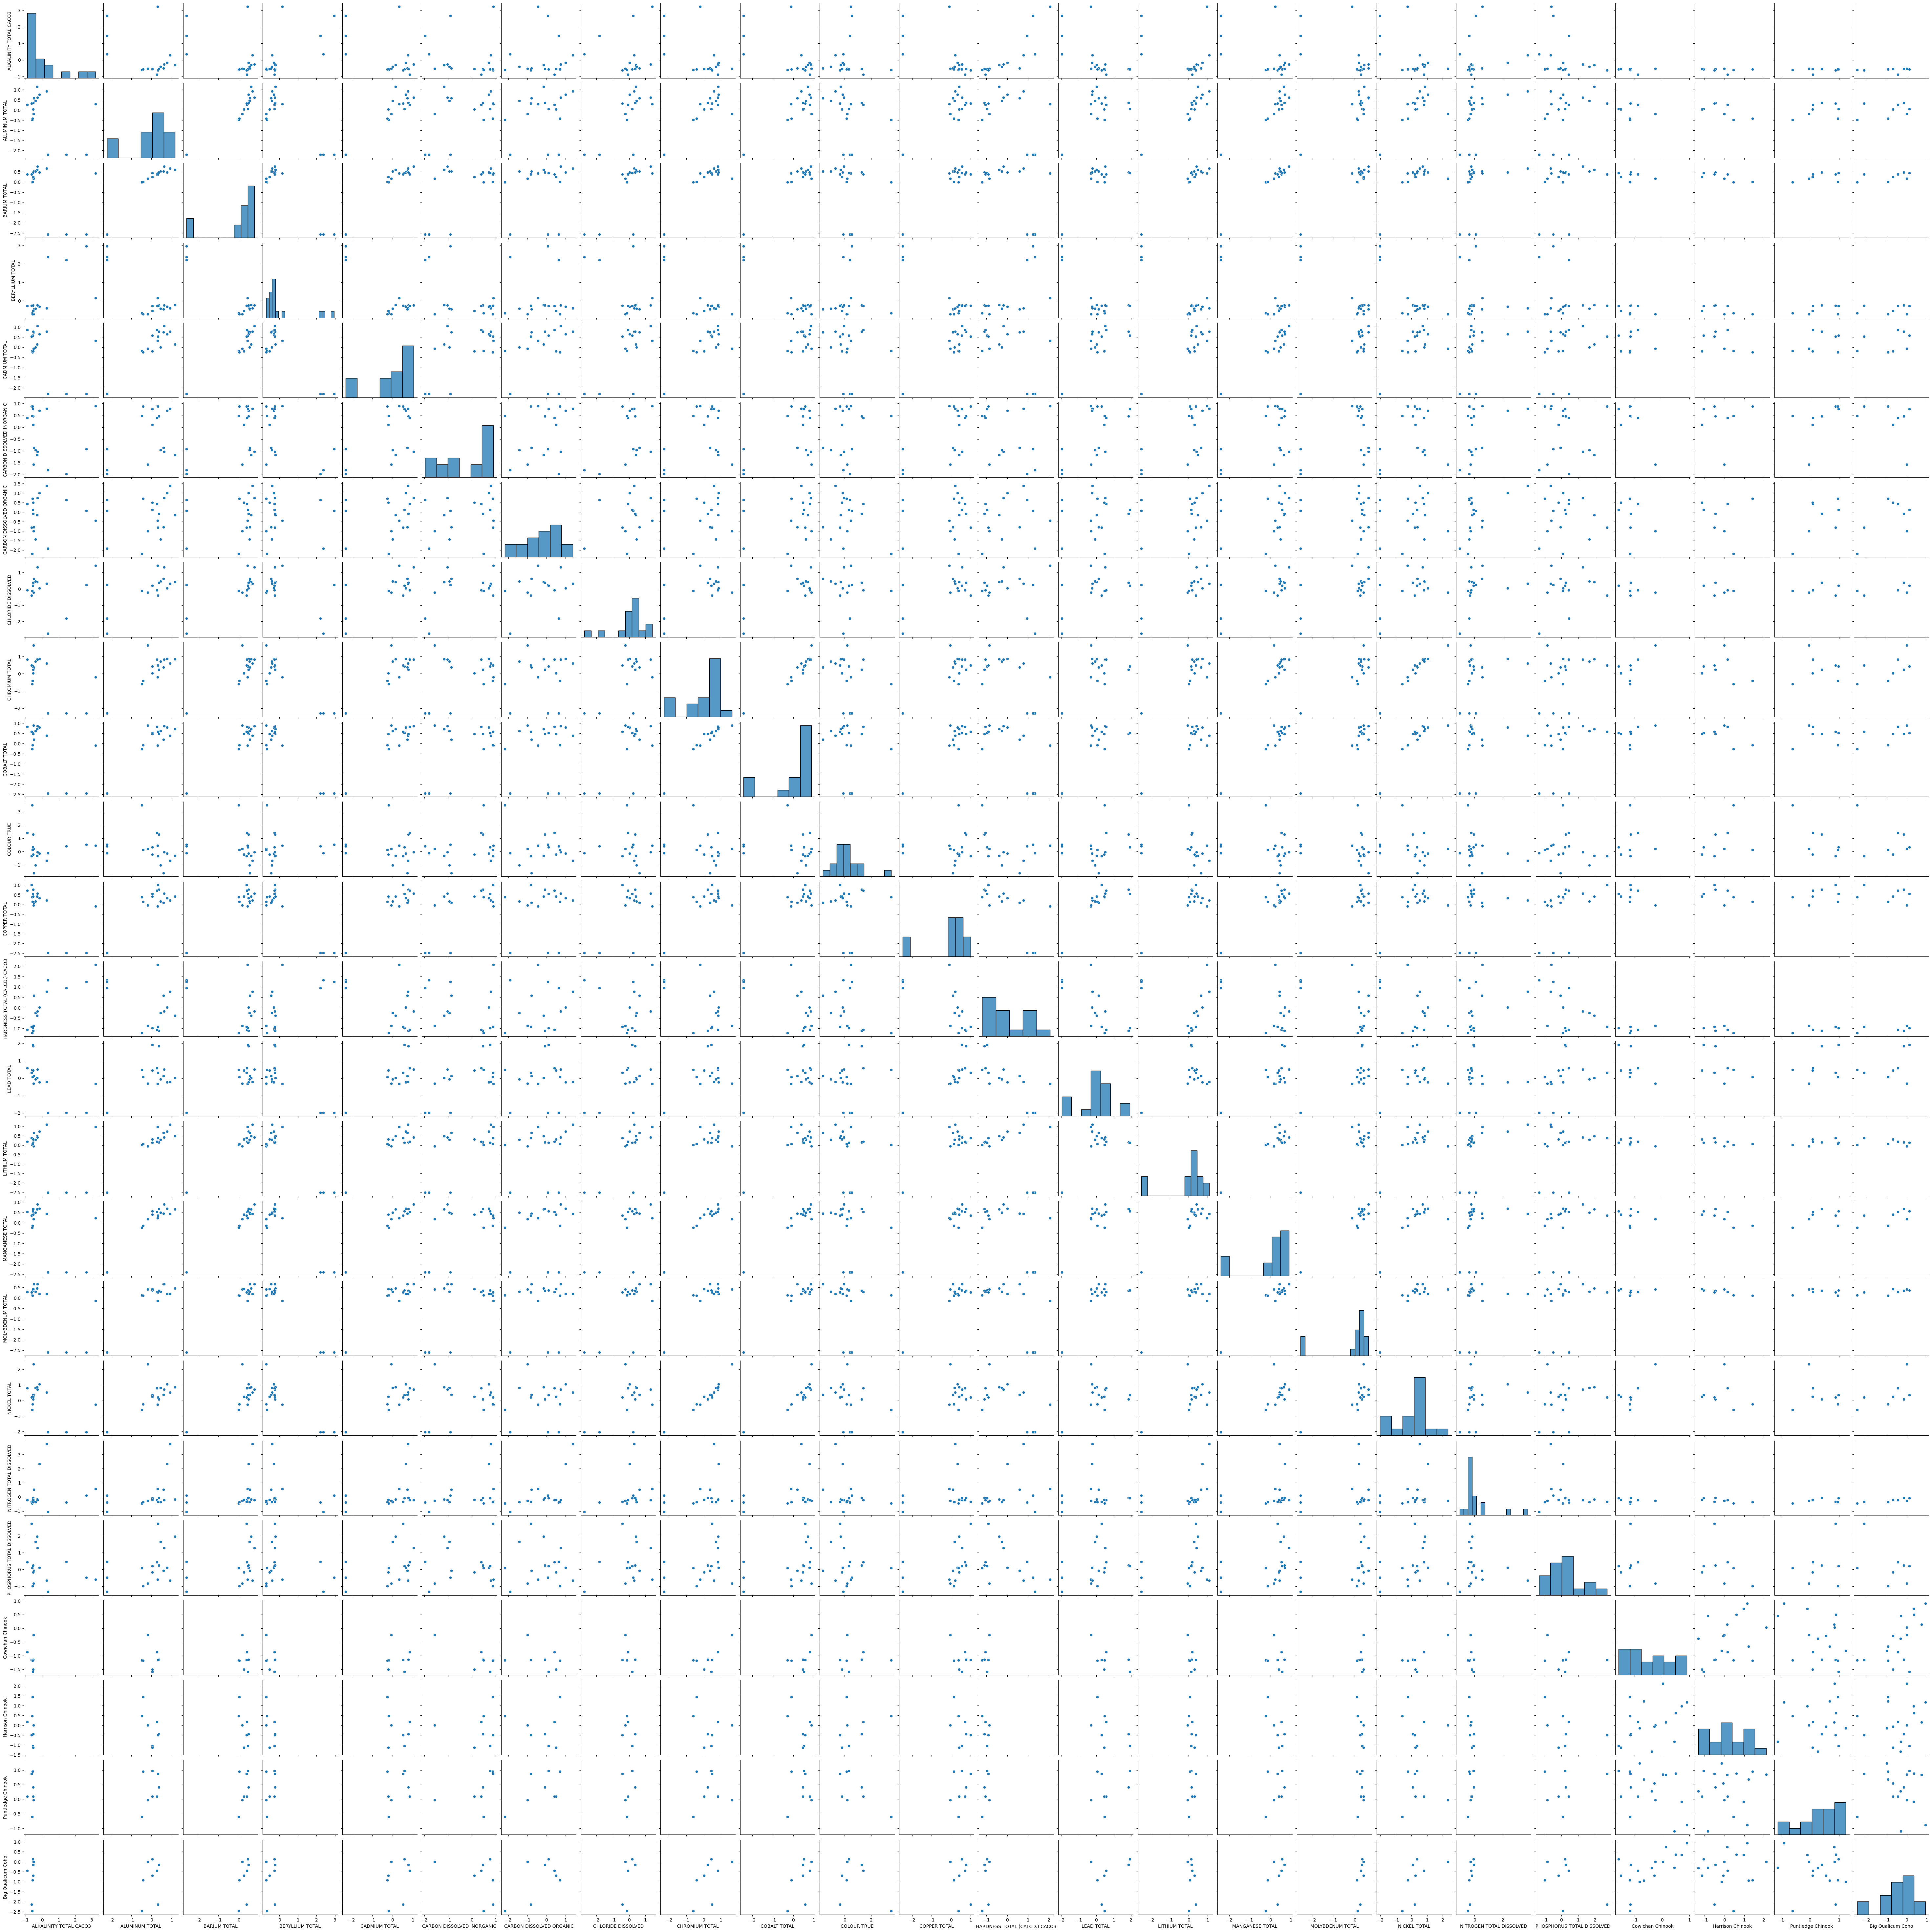

In [24]:
Explore_Fraser_qual_1 = pd.concat([Fraser_qual_nrm_2000.drop(columns=['Time']).iloc[:,0:20],Sal_viab_nrm_2000.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore_Fraser_qual_1[Explore_Fraser_qual_1.columns])

plt.show()

These all look flat!

Out of all of these, we could keep an eye on LEAD TOTAL.

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


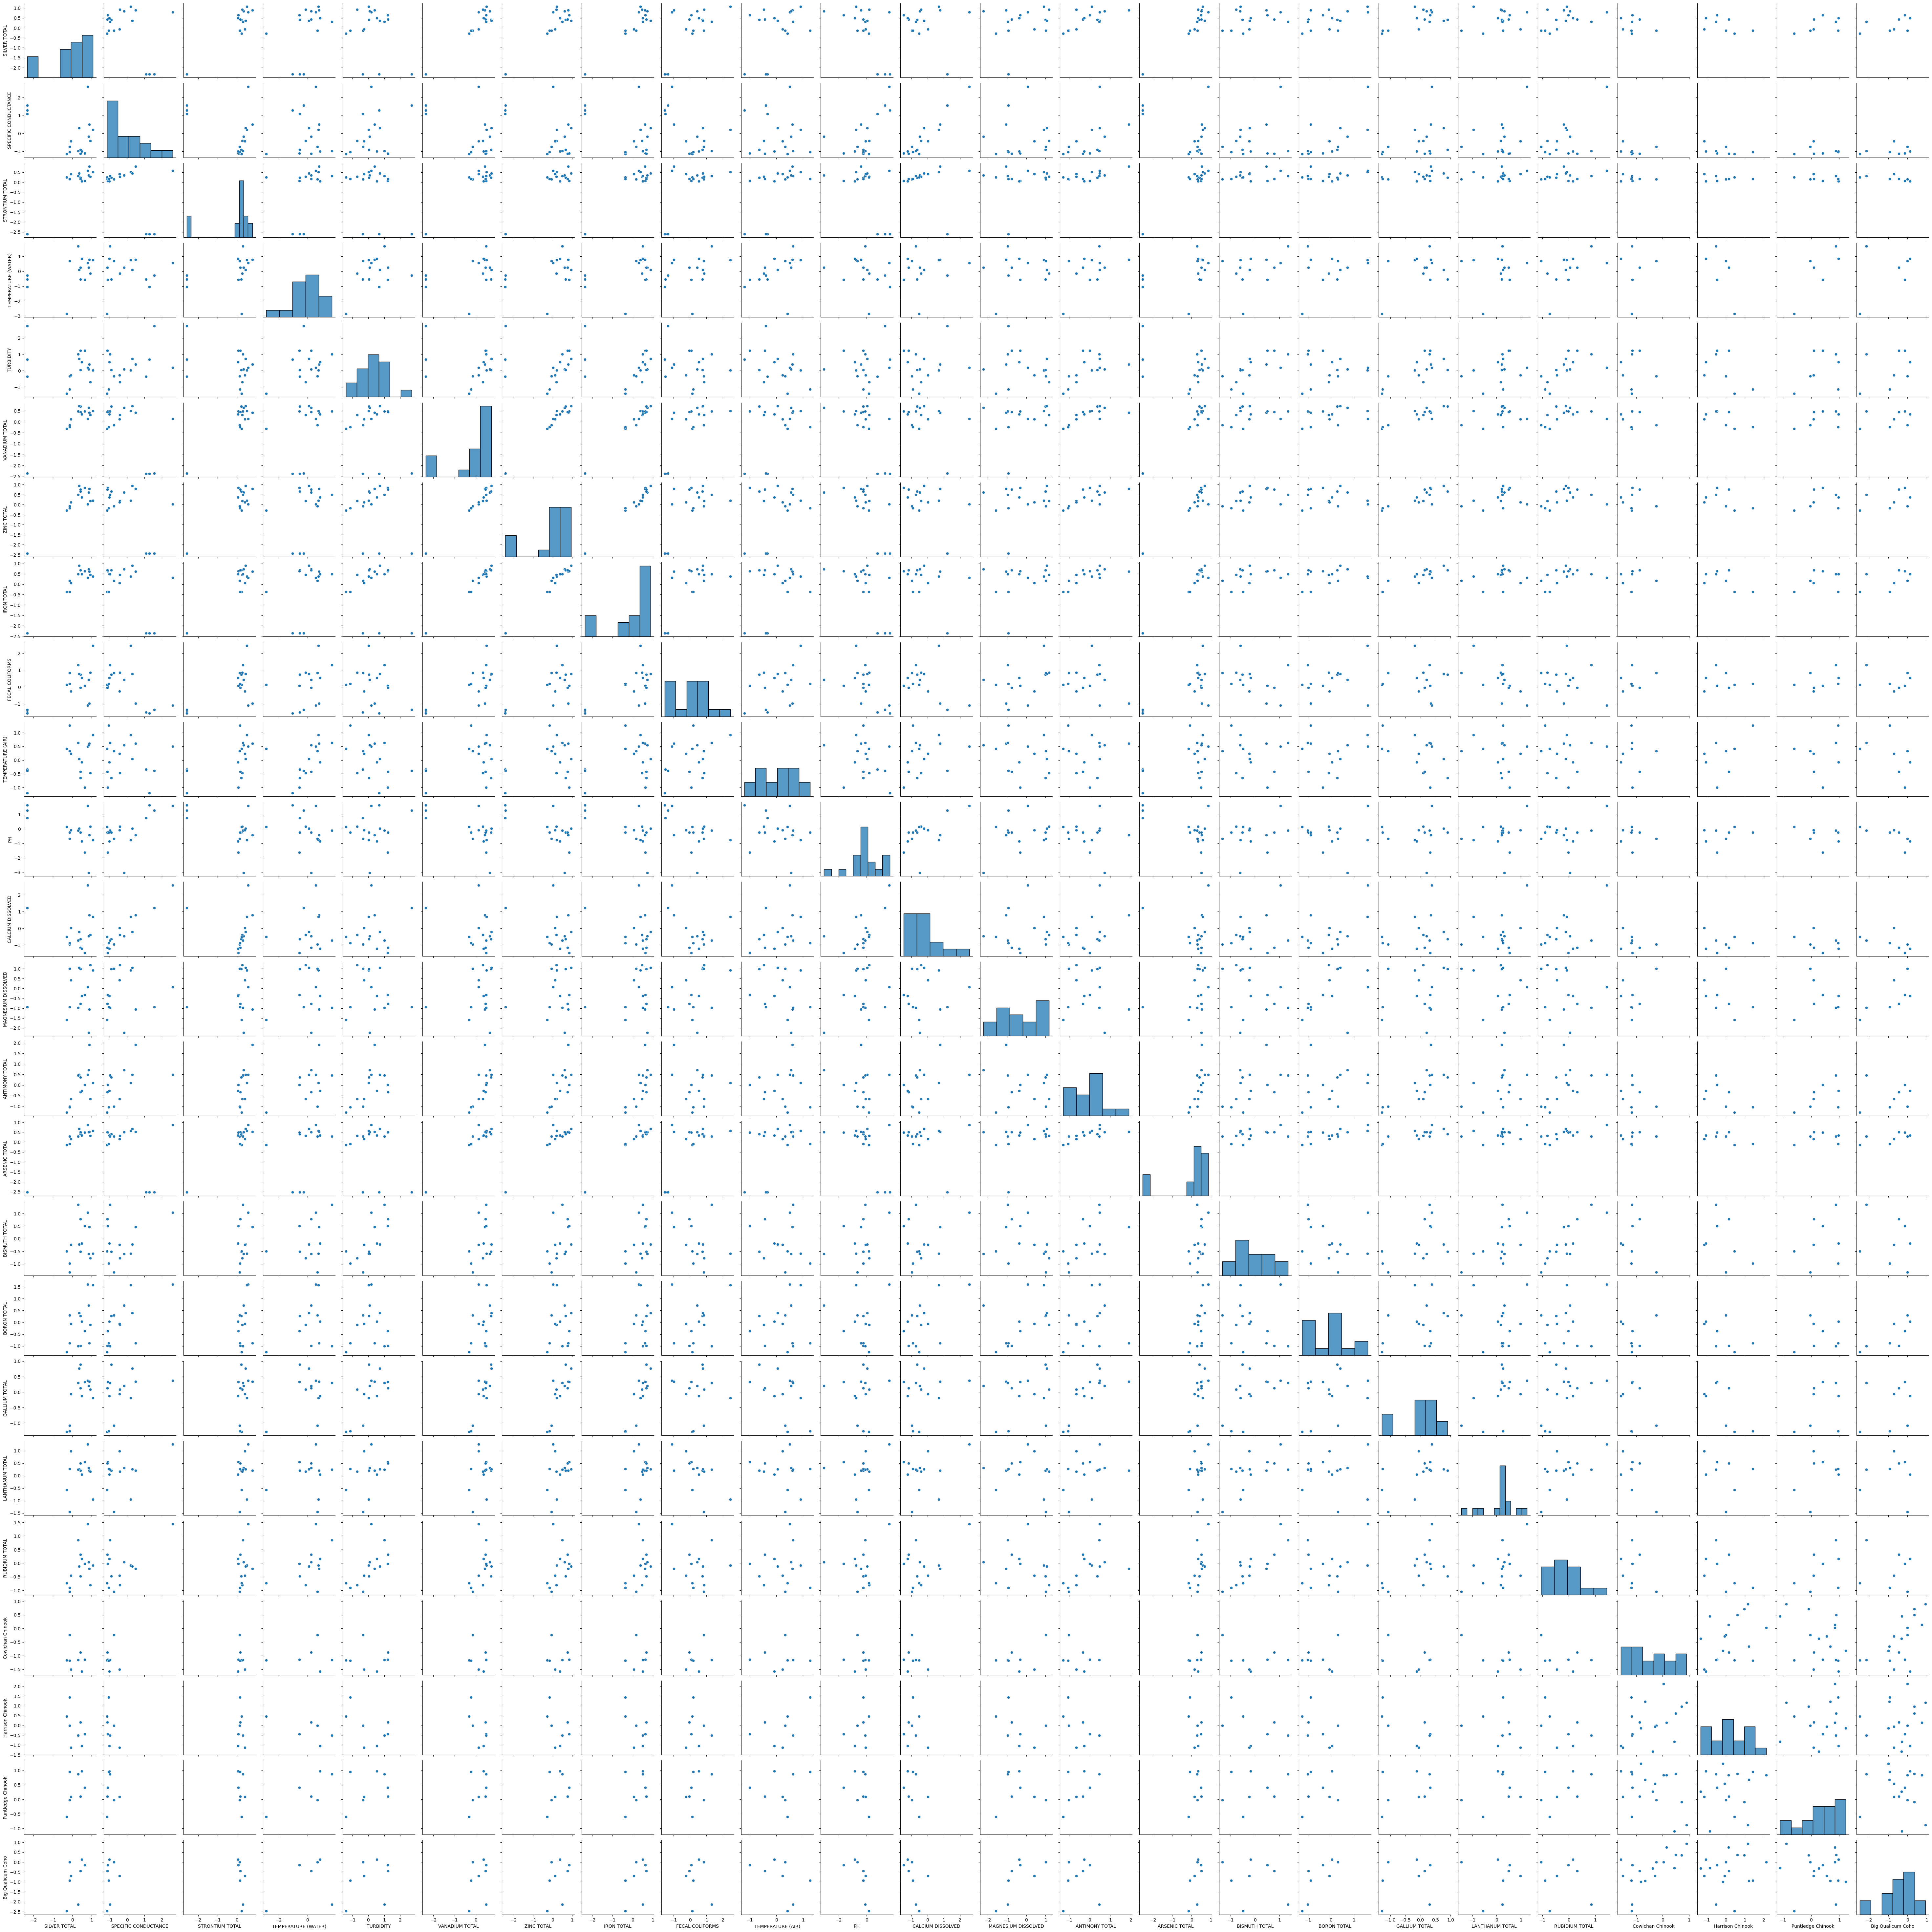

In [25]:
Explore_Fraser_qual_2 = pd.concat([Fraser_qual_nrm_2000.drop(columns=['Time']).iloc[:,20:40],Sal_viab_nrm_2000.drop(columns=['Year'])], axis=1)

sns.pairplot(Explore_Fraser_qual_2[Explore_Fraser_qual_2.columns])

plt.show()

TEMPERATURE (WATER), TURBIDITY, TEMPERATURE (AIR),MAGNESIUM DISSOLVED, and ANTIMONY TOTAL look slightly more interesting here.

But we won't get far with these visual inspections, so let's move on to a different approach.

# Lasso Feature Selection  
## Fraser River Water Quality vs Salmon Viability (years 2000-2017)
(Again, for a train/test split, we can restrict the years as indicated in the above code.)

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

### Test Run on a Small Subset of Variables
And on a single type of salmon.

In [27]:
# for simplicity, we choose one Salmon Viability variable (i.e. type of salmon)
# 1 = 'Cowichan Chinook'
# 2 = 'Harrison Chinook'
# 3 = 'Puntledge Chinook',
# 4 = 'Big Qualicum Coho'
type_sal = 1

Sal_viab_nrm.columns

Index(['Year', 'Cowichan Chinook', 'Harrison Chinook', 'Puntledge Chinook',
       'Big Qualicum Coho'],
      dtype='object')

In [28]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000, 10000]
# use the first few variables as features (excluding Time)
features = Fraser_qual_nrm_2000.columns[1:5]

# coefficients placeholder
coeffs = np.zeros((len(alphas), len(features)))

# I don't need to use StandardScaler because I've already normalized the data features
features_df = Fraser_qual_nrm_2000[features]

# loops through alphas and fit lasso models, recording coefficients
for i in range(len(alphas)):
    # make lasso model object
    lasso = Lasso(alpha=alphas[i], max_iter=1000000) 
    # fit the model
    #lasso.fit(features_df, Sal_viab_nrm_2000.drop(columns=['Year']).interpolate())
    # need to only have one y-variable here, so predicting first type of salmon
    lasso.fit(features_df, Sal_viab_nrm_2000[Sal_viab_nrm_2000.columns[type_sal]]) # fit the model
    coeffs[i,:] = lasso.coef_ # record the coefficients

In [29]:
# check the coefficients (alpha hyperparameters) for these first four variables
pd.DataFrame(coeffs, index=alphas, columns=features)

ALKALINITY TOTAL CACO3  ALUMINUM TOTAL  BARIUM TOTAL  \
0.000001                   -0.296451       -1.603389      1.324643   
0.000010                   -0.296362       -1.602772      1.323650   
0.000100                   -0.295475       -1.596599      1.313721   
0.001000                   -0.293015       -1.559765      1.265184   
0.010000                   -0.262545       -1.172427      0.737797   
0.100000                   -0.267533       -0.127927      0.000000   
0.250000                   -0.113273       -0.000000     -0.000000   
0.500000                   -0.000000       -0.000000      0.000000   
0.750000                   -0.000000       -0.000000      0.000000   
1.000000                   -0.000000       -0.000000      0.000000   
5.000000                   -0.000000       -0.000000      0.000000   
10.000000                  -0.000000       -0.000000      0.000000   
50.000000                  -0.000000       -0.000000      0.000000   
100.000000                 -0.000000       -0.000000      0.000000   
1000.000000                -0.000000       -0.000000      0.000000   
10000.000000               -0.000000       -0.000000      0.000000   

              BERYLLIUM TOTAL  
0.000001             0.017780  
0.000010             0.017247  
0.000100             0.011924  
0.001000            -0.006269  
0.010000            -0.219139  
0.100000            -0.022331  
0.250000            -0.000000  
0.500000            -0.000000  
0.750000            -0.000000  
1.000000            -0.000000  
5.000000            -0.000000  
10.000000           -0.000000  
50.000000           -0.000000  
100.000000          -0.000000  
1000.000000         -0.000000  
10000.000000        -0.000000

For this subset of features, we see that ALKALINITY TOTAL CACO3 is most significant and BARIUM TOTAL is the least.

*Important: Lasso does not fit a model when there are NAN entries.  There was giving me problems below, so the next few lines will simply remove columns with NaN entries.  This still leaves many features to consider.*

In [30]:
# a column with NaN entries
print(Fraser_qual_nrm_2000.iloc[:,8])

# a NaN entry
np.isnan(Fraser_qual_nrm_2000.iloc[17,8])

0    -1.823538
1    -2.746150
2     0.245541
3     1.426984
4     0.313002
5     0.035063
6     0.626228
7     0.411851
8     0.458752
9     1.321304
10   -0.223225
11    0.372515
12   -0.076555
13    0.196703
14   -0.413089
15   -0.125387
16         NaN
17         NaN
Name: CHLORIDE DISSOLVED, dtype: float64


True

In [31]:
# make a water quality dataframe that drops all the columns with any NaN entries
Fraser_qual_nrm_2000_dropnan = Fraser_qual_nrm_2000

for col in Fraser_qual_nrm_2000.columns:
    # check whether there are any nan entries in the column
    if Fraser_qual_nrm_2000[col].isnull().any():
        # if so, then drop the column
        Fraser_qual_nrm_2000_dropnan = Fraser_qual_nrm_2000_dropnan.drop(columns=[col])

# have a look; this brings us down to 68 features
Fraser_qual_nrm_2000_dropnan.head()

Time  ALKALINITY TOTAL CACO3  ALUMINUM TOTAL  BARIUM TOTAL  \
0 -1.661325                1.465735       -2.197512     -2.562983   
1 -1.516862                0.343797       -2.197443     -2.563109   
2 -1.372399                2.667126       -2.196156     -2.562448   
3 -1.227936                3.216285        0.299641      0.423515   
4 -1.083473                0.280860        0.918867      0.663620   

   BERYLLIUM TOTAL  CADMIUM TOTAL  CARBON DISSOLVED INORGANIC  \
0         2.203255      -2.303142                   -1.970406   
1         2.372198      -2.303112                   -1.811566   
2         2.950208      -2.303231                   -0.914837   
3         0.146618       0.321425                    0.901783   
4        -0.398098       0.771053                    0.790900   

   CARBON DISSOLVED ORGANIC  CHROMIUM TOTAL  COBALT TOTAL  ...  \
0                  0.646070       -2.301523     -2.442087  ...   
1                 -1.913736       -2.301879     -2.442339  ...   
2                  0.073636       -2.300627     -2.441073  ...   
3                 -0.452643       -0.194674     -0.100352  ...   
4                  1.387372        0.604060      0.387974  ...   

   FECAL COLIFORMS  TEMPERATURE (AIR)        PH  ARSENIC TOTAL  \
0        -1.496778          -0.340665  0.752915      -2.526383   
1        -1.547602          -1.201755  1.638345      -2.526623   
2        -1.349399          -0.392354  1.296132      -2.526573   
3        -1.099883           0.502587  1.606658       0.870034   
4        -0.981841           0.601730 -0.410729       0.516157   

   SELENIUM TOTAL  PHOSPHORUS TOTAL  OXYGEN DISSOLVED  NITROGEN NITRITE  \
0       -2.429528          2.834000          0.325382          0.391135   
1       -2.429490          0.858548          0.225352          0.015502   
2       -2.429682          0.073192          0.048654         -0.188207   
3        0.407680          0.008684         -0.237846          0.138099   
4        0.170075         -0.076093         -0.499821          0.248420   

   NITROGEN TOTAL  ESCHERICHIA COLI  
0       -0.594300         -0.819288  
1       -1.011297         -0.963256  
2       -0.766015         -0.331664  
3       -1.078017         -1.500579  
4       -1.091484          1.280129  

[5 rows x 36 columns]

In [32]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000, 10000]

# now we do lasso feature selection on the remaining water quality features
features = Fraser_qual_nrm_2000_dropnan.columns[1:]

# coefficients placeholder
coeffs = np.zeros((len(alphas), len(features)))

# features under consideration
features_df = Fraser_qual_nrm_2000_dropnan[features]

# loop through alphas and fit lasso models, recording coefficients
for i in range(len(alphas)):
    # make lasso model object
    lasso = Lasso(alpha=alphas[i], max_iter=1000000)
    # fit the model
    lasso.fit(features_df, Sal_viab_nrm_2000[Sal_viab_nrm_2000.columns[type_sal]])
    # record the coefficients
    coeffs[i,:] = lasso.coef_

In [33]:
coeffs_df = pd.DataFrame(coeffs, index=alphas, columns=features)
coeffs_df

ALKALINITY TOTAL CACO3  ALUMINUM TOTAL  BARIUM TOTAL  \
0.000001                   -0.225068       -0.185016      0.173196   
0.000010                   -0.220198       -0.154373      0.100754   
0.000100                   -0.087633       -0.000000     -0.000000   
0.001000                   -0.099950       -0.000000     -0.000000   
0.010000                   -0.078841       -0.488023     -0.000000   
0.100000                   -0.098356       -0.000000     -0.000000   
0.250000                   -0.000000       -0.000000     -0.000000   
0.500000                   -0.000000       -0.000000      0.000000   
0.750000                   -0.000000       -0.000000      0.000000   
1.000000                   -0.000000       -0.000000      0.000000   
5.000000                   -0.000000       -0.000000      0.000000   
10.000000                  -0.000000       -0.000000      0.000000   
50.000000                  -0.000000       -0.000000      0.000000   
100.000000                 -0.000000       -0.000000      0.000000   
1000.000000                -0.000000       -0.000000      0.000000   
10000.000000               -0.000000       -0.000000      0.000000   

              BERYLLIUM TOTAL  CADMIUM TOTAL  CARBON DISSOLVED INORGANIC  \
0.000001            -0.303013      -0.720870                   -0.005352   
0.000010            -0.336300      -0.668504                   -0.016242   
0.000100            -0.000000      -0.212663                   -0.055704   
0.001000            -0.000000      -0.220138                   -0.122007   
0.010000            -0.000000      -0.159706                   -0.027621   
0.100000            -0.000000      -0.000000                   -0.000000   
0.250000            -0.000000       0.000000                    0.000000   
0.500000            -0.000000       0.000000                    0.000000   
0.750000            -0.000000       0.000000                    0.000000   
1.000000            -0.000000       0.000000                    0.000000   
5.000000            -0.000000       0.000000                    0.000000   
10.000000           -0.000000       0.000000                    0.000000   
50.000000           -0.000000       0.000000                    0.000000   
100.000000          -0.000000       0.000000                    0.000000   
1000.000000         -0.000000       0.000000                    0.000000   
10000.000000        -0.000000       0.000000                    0.000000   

              CARBON DISSOLVED ORGANIC  CHROMIUM TOTAL  COBALT TOTAL  \
0.000001                      0.237630        0.336871      0.288249   
0.000010                      0.232476        0.243838      0.330876   
0.000100                      0.099826       -0.127710      0.000000   
0.001000                      0.133980       -0.104578      0.000000   
0.010000                      0.164230       -0.000000      0.000000   
0.100000                      0.013590       -0.000000      0.000000   
0.250000                      0.000000        0.000000      0.000000   
0.500000                      0.000000        0.000000      0.000000   
0.750000                      0.000000        0.000000      0.000000   
1.000000                      0.000000        0.000000      0.000000   
5.000000                      0.000000        0.000000      0.000000   
10.000000                     0.000000        0.000000      0.000000   
50.000000                     0.000000        0.000000      0.000000   
100.000000                    0.000000        0.000000      0.000000   
1000.000000                   0.000000        0.000000      0.000000   
10000.000000                  0.000000        0.000000      0.000000   

              COLOUR TRUE  ...  FECAL COLIFORMS  TEMPERATURE (AIR)        PH  \
0.000001         0.447480  ...         0.298292           0.266474  0.016437   
0.000010         0.427988  ...         0.316089           0.234046  0.001422   
0.000100         0.369409  ...         0.000000           0.00000

We can see that COLOUR TRUE is most significant amongst the first ten variables, followed by CARBON DISSOLVED ORGANIC and ALKALINITY TOTAL CACO3.

But the coefficients table is too big to fully inspect visually!

#### The Ranking of Water Quality features' impact on Salmon Viability using Lasso Regression

(For the type of salmon specified at the beginning of the secion, and for water quality features with complete data!)

In [34]:
# create a list of feature scores recording the number of nonzero entries in each column
feature_scores = [(coeffs_df[col].values != 0).sum() for col in coeffs_df.columns]

# the ranking of water quality variables, as a dataframe
pd.DataFrame([feature_scores], columns=features_df.columns).transpose().sort_values(by=0, ascending=False).rename(columns={0:'Feature Score'}).head(30)

Feature Score
NITROGEN TOTAL                          7
NITROGEN NITRITE                        7
COLOUR TRUE                             7
ALKALINITY TOTAL CACO3                  6
CARBON DISSOLVED ORGANIC                6
PHOSPHORUS TOTAL                        6
PHOSPHORUS TOTAL DISSOLVED              6
ESCHERICHIA COLI                        6
MOLYBDENUM TOTAL                        5
CADMIUM TOTAL                           5
NITROGEN TOTAL DISSOLVED                5
TURBIDITY                               5
CARBON DISSOLVED INORGANIC              5
CHROMIUM TOTAL                          4
LEAD TOTAL                              4
OXYGEN DISSOLVED                        4
SPECIFIC CONDUCTANCE                    4
STRONTIUM TOTAL                         4
IRON TOTAL                              4
PH                                      4
ALUMINUM TOTAL                          3
TEMPERATURE (AIR)                       2
BARIUM TOTAL                            2
BERYLLIUM TOTAL                         2
SELENIUM TOTAL                          2
ARSENIC TOTAL                           2
LITHIUM TOTAL                           2
FECAL COLIFORMS                         2
MANGANESE TOTAL                         2
VANADIUM TOTAL                          2

#### Here we change the lasso loop to cover all four salmon types at once

In [35]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000, 10000]

# now we do lasso feature selection on the remaining water quality features
features = Fraser_qual_nrm_2000_dropnan.columns[1:]

# coefficients placeholder
coeffs = np.zeros((len(alphas), len(features)))

# features under consideration
features_df = Fraser_qual_nrm_2000_dropnan[features]

results = []
# loop through salmon types
for type_sal in range(1,5):
    # loop through alphas and fit lasso models, recording coefficients
    for i in range(len(alphas)):
        # make lasso model object
        lasso = Lasso(alpha=alphas[i], max_iter=1000000)
        # fit the model
        lasso.fit(features_df, Sal_viab_nrm_2000[Sal_viab_nrm_2000.columns[type_sal]])
        # record the coefficients
        coeffs[i,:] = lasso.coef_
    coeffs_df = pd.DataFrame(coeffs, index=alphas, columns=features)
    # create a list of feature scores recording the number of nonzero entries in each column
    feature_scores = [(coeffs_df[col].values != 0).sum() for col in coeffs_df.columns]
    # the ranking of water quality variables, as a dataframe
    results = results + [pd.DataFrame([feature_scores], columns=features_df.columns).transpose().sort_values(by=0, ascending=False)]

In [36]:
# the feature ranking results by individual salmon type
results

[                            0
 NITROGEN TOTAL              7
 NITROGEN NITRITE            7
 COLOUR TRUE                 7
 ALKALINITY TOTAL CACO3      6
 CARBON DISSOLVED ORGANIC    6
 PHOSPHORUS TOTAL            6
 PHOSPHORUS TOTAL DISSOLVED  6
 ESCHERICHIA COLI            6
 MOLYBDENUM TOTAL            5
 CADMIUM TOTAL               5
 NITROGEN TOTAL DISSOLVED    5
 TURBIDITY                   5
 CARBON DISSOLVED INORGANIC  5
 CHROMIUM TOTAL              4
 LEAD TOTAL                  4
 OXYGEN DISSOLVED            4
 SPECIFIC CONDUCTANCE        4
 STRONTIUM TOTAL             4
 IRON TOTAL                  4
 PH                          4
 ALUMINUM TOTAL              3
 TEMPERATURE (AIR)           2
 BARIUM TOTAL                2
 BERYLLIUM TOTAL             2
 SELENIUM TOTAL              2
 ARSENIC TOTAL               2
 LITHIUM TOTAL               2
 FECAL COLIFORMS             2
 MANGANESE TOTAL             2
 VANADIUM TOTAL              2
 COBALT TOTAL                2
 SILVER 

In [37]:
# make a list collecting the most significant features for all four salmon types
sig_features_all = []

# let's say a feature is significant if its feature score is greater than a specified value for any salmon type
sig_thresh = 5

for i in range(1,4):
    # the indices are what we want; push these to a new column
    get_features = results[i].reset_index()
    sig_features_all = sig_features_all + get_features.loc[get_features[0] > sig_thresh]['index'].to_list()

sig_features_all = list(set(sig_features_all))
print(len(sig_features_all))
sig_features_all

15


['CARBON DISSOLVED ORGANIC',
 'FECAL COLIFORMS',
 'PHOSPHORUS TOTAL DISSOLVED',
 'PH',
 'CADMIUM TOTAL',
 'NITROGEN NITRITE',
 'NITROGEN TOTAL',
 'COLOUR TRUE',
 'ALKALINITY TOTAL CACO3',
 'ESCHERICHIA COLI',
 'NITROGEN TOTAL DISSOLVED',
 'SILVER TOTAL',
 'CARBON DISSOLVED INORGANIC',
 'NICKEL TOTAL',
 'CHROMIUM TOTAL']

This produces a list of water quality features that are significant predictors of salmon viability over all four salmon types.

Caveats: 
- The date range for water quality measurements does not include the 1990s, so these variables cannot be immediately incorporated into a model with our other variables for the fullest date range.
- Many water quality variables were dropped due to NaN entries.

## BC Regional District Populations vs Salmon Viability

In [38]:
# grab the years overlapping with salmon data
Sal_viab_nrm_to2017 = Sal_viab_nrm.iloc[0:28]
BC_pop_nrm_to2017 = BC_pop_nrm.iloc[0:28]

In [39]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000, 10000]

# we do lasso feature selection on the BC population variables
features = BC_pop_nrm_to2017.columns

# coefficients placeholder
coeffs = np.zeros((len(alphas), len(features)))

# features under consideration
features_df = BC_pop_nrm_to2017[features]

results = []
# loop through salmon types
for type_sal in range(1,5):
    # loop through alphas and fit lasso models, recording coefficients
    for i in range(len(alphas)):
        # make lasso model object
        lasso = Lasso(alpha=alphas[i], max_iter=1000000)
        # fit the model
        lasso.fit(features_df, Sal_viab_nrm_to2017[Sal_viab_nrm_to2017.columns[type_sal]])
        # record the coefficients
        coeffs[i,:] = lasso.coef_
    coeffs_df = pd.DataFrame(coeffs, index=alphas, columns=features)
    # create a list of feature scores recording the number of nonzero entries in each column
    feature_scores = [(coeffs_df[col].values != 0).sum() for col in coeffs_df.columns]        
    # the ranking of water quality variables, as a dataframe
    results = results + [pd.DataFrame([feature_scores], columns=features_df.columns).transpose().sort_values(by=0, ascending=False).head(30)]

/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.040e-02, tolerance: 2.816e-03
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.294e-02, tolerance: 2.816e-03
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/Caskroom/miniforge/base/envs/firstenvironment/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to 

There's a problem with termination of the lasso loop.  StackOverflow wisdom suggests we have too many variables.  So we'll do additional population groupings to simplify.

In the following, we form five natural groupings of BC Regional Districts according to population trends.

### BC Group 1: Greater Vancouver, Victoria, etc. (Urban)

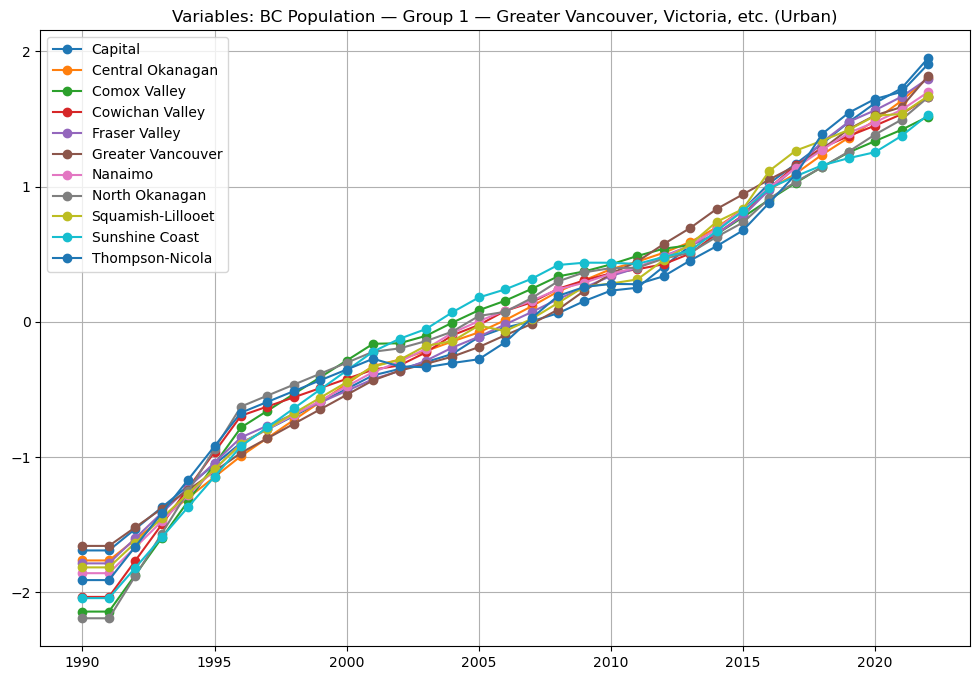

In [40]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)

plt.figure(figsize = (12,8))

#Plotting BC Regional District population vs Year
plt.title("Variables: BC Population — Group 1 — Greater Vancouver, Victoria, etc. (Urban)")

# to inspect one at a time
#n=29
#plt.plot(time_wd,BC_pop_nrm.iloc[:,n],marker = "o",label = BC_pop.columns[n])

# highly correlated with Greater Vancouver
#plt.plot(time_wd,BC_pop_nrm.iloc[:,1],marker = "o",label = BC_pop.columns[1])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,2],marker = "o",label = BC_pop.columns[2])
plt.plot(time_wd,BC_pop_nrm.iloc[:,3],marker = "o",label = BC_pop.columns[3])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,4],marker = "o",label = BC_pop.columns[4])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,5],marker = "o",label = BC_pop.columns[5])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,6],marker = "o",label = BC_pop.columns[6])
plt.plot(time_wd,BC_pop_nrm.iloc[:,7],marker = "o",label = BC_pop.columns[7])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,8],marker = "o",label = BC_pop.columns[8])
plt.plot(time_wd,BC_pop_nrm.iloc[:,9],marker = "o",label = BC_pop.columns[9])
plt.plot(time_wd,BC_pop_nrm.iloc[:,10],marker = "o",label = BC_pop.columns[10])

#plt.plot(time_wd,BC_pop_nrm.iloc[:,11],marker = "o",label = BC_pop.columns[11])
plt.plot(time_wd,BC_pop_nrm.iloc[:,12],marker = "o",label = BC_pop.columns[12])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,13],marker = "o",label = BC_pop.columns[13])
plt.plot(time_wd,BC_pop_nrm.iloc[:,14],marker = "o",label = BC_pop.columns[14]) # Greater Vancouver
#plt.plot(time_wd,BC_pop_nrm.iloc[:,15],marker = "o",label = BC_pop.columns[15])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,16],marker = "o",label = BC_pop.columns[16])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,17],marker = "o",label = BC_pop.columns[17])
plt.plot(time_wd,BC_pop_nrm.iloc[:,18],marker = "o",label = BC_pop.columns[18])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,19],marker = "o",label = BC_pop.columns[19])
plt.plot(time_wd,BC_pop_nrm.iloc[:,20],marker = "o",label = BC_pop.columns[20])

#plt.plot(time_wd,BC_pop_nrm.iloc[:,21],marker = "o",label = BC_pop.columns[21])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,22],marker = "o",label = BC_pop.columns[22])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,23],marker = "o",label = BC_pop.columns[23])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,24],marker = "o",label = BC_pop.columns[24])
plt.plot(time_wd,BC_pop_nrm.iloc[:,25],marker = "o",label = BC_pop.columns[25])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,26],marker = "o",label = BC_pop.columns[26])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,27],marker = "o",label = BC_pop.columns[27])
plt.plot(time_wd,BC_pop_nrm.iloc[:,28],marker = "o",label = BC_pop.columns[28])
plt.plot(time_wd,BC_pop_nrm.iloc[:,29],marker = "o",label = BC_pop.columns[29])

plt.legend()
plt.grid()

plt.show()

Above we see a tight grouping of populations.  This is the dominant trend, representing most urban areas in BC.

In [41]:
# Group 1 average
BC_1 = BC_pop.iloc[:,[3,7,9,10,12,14,18,20,25,28,29]]
BC_1_avg = pd.DataFrame(BC_1.mean(axis=1), columns=['BC Gp1 Avg'])
BC_1_avg_nrm = (BC_1_avg-np.mean(BC_1_avg,axis = 0))/np.std(BC_1_avg,axis = 0)

### BC Group 2: Central Coast Areas (Rural)

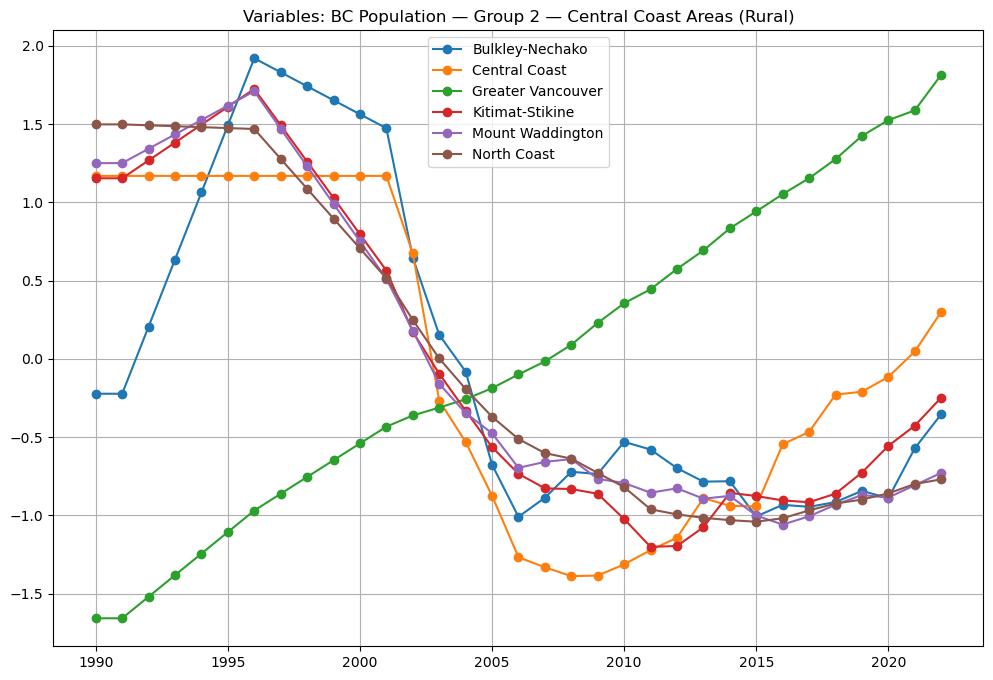

In [42]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)

plt.figure(figsize = (12,8))

#Plotting BC Regional District population vs Year
plt.title("Variables: BC Population — Group 2 — Central Coast Areas (Rural)")

#plt.plot(time_wd,BC_pop_nrm.iloc[:,1],marker = "o",label = BC_pop.columns[1])
plt.plot(time_wd,BC_pop_nrm.iloc[:,2],marker = "o",label = BC_pop.columns[2])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,4],marker = "o",label = BC_pop.columns[4])
plt.plot(time_wd,BC_pop_nrm.iloc[:,5],marker = "o",label = BC_pop.columns[5])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,6],marker = "o",label = BC_pop.columns[6])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,8],marker = "o",label = BC_pop.columns[8])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,11],marker = "o",label = BC_pop.columns[11])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,13],marker = "o",label = BC_pop.columns[13])
plt.plot(time_wd,BC_pop_nrm.iloc[:,14],marker = "o",label = BC_pop.columns[14]) # Greater Vancouver
plt.plot(time_wd,BC_pop_nrm.iloc[:,15],marker = "o",label = BC_pop.columns[15])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,16],marker = "o",label = BC_pop.columns[16])
plt.plot(time_wd,BC_pop_nrm.iloc[:,17],marker = "o",label = BC_pop.columns[17])
plt.plot(time_wd,BC_pop_nrm.iloc[:,19],marker = "o",label = BC_pop.columns[19])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,21],marker = "o",label = BC_pop.columns[21])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,22],marker = "o",label = BC_pop.columns[22])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,23],marker = "o",label = BC_pop.columns[23])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,24],marker = "o",label = BC_pop.columns[24])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,26],marker = "o",label = BC_pop.columns[26])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,27],marker = "o",label = BC_pop.columns[27])

plt.legend()
plt.grid()

plt.show()

We find that the mainland coastal Regional Districts from Mount Waddington northwards follow a similar population trend (Central Coast itself is a looser fit, but is still an overall match).

In [43]:
# Group 2 average
BC_2 = BC_pop.iloc[:,[2,5,15,17,19]]
BC_2_avg = pd.DataFrame(BC_2.mean(axis=1), columns=['BC Gp2 Avg'])
BC_2_avg_nrm = (BC_2_avg-np.mean(BC_2_avg,axis = 0))/np.std(BC_2_avg,axis = 0)

### BC Group 3: Southeast Interior (Rural)

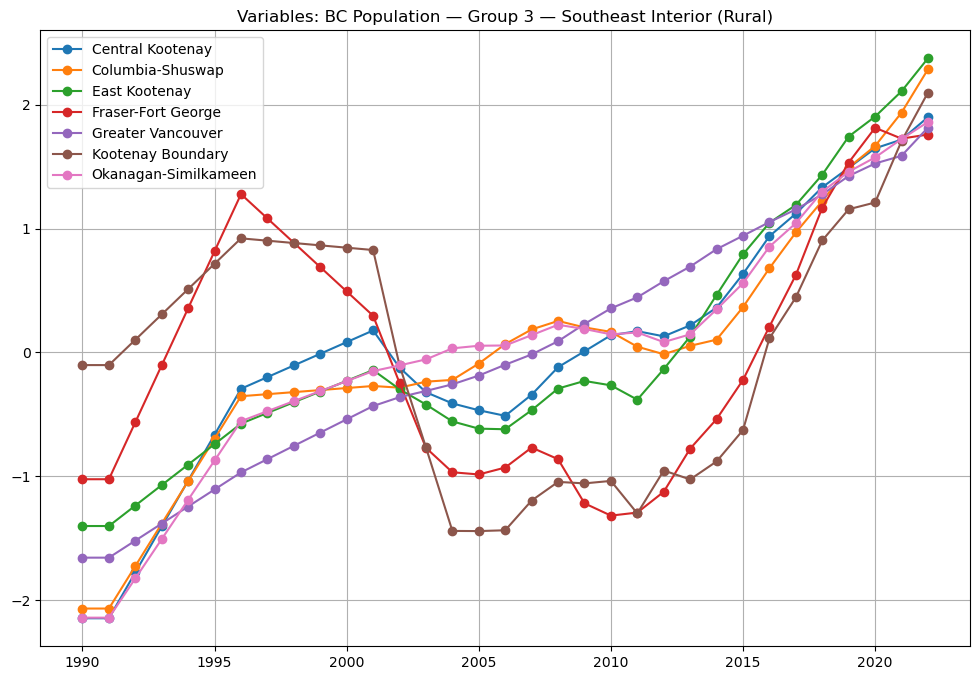

In [44]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)

plt.figure(figsize = (12,8))

#Plotting BC Regional District population vs Year
plt.title("Variables: BC Population — Group 3 — Southeast Interior (Rural)")

#plt.plot(time_wd,BC_pop_nrm.iloc[:,1],marker = "o",label = BC_pop.columns[1])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,4],marker = "o",label = BC_pop.columns[4])
plt.plot(time_wd,BC_pop_nrm.iloc[:,6],marker = "o",label = BC_pop.columns[6])
plt.plot(time_wd,BC_pop_nrm.iloc[:,8],marker = "o",label = BC_pop.columns[8])
plt.plot(time_wd,BC_pop_nrm.iloc[:,11],marker = "o",label = BC_pop.columns[11])
plt.plot(time_wd,BC_pop_nrm.iloc[:,13],marker = "o",label = BC_pop.columns[13])
plt.plot(time_wd,BC_pop_nrm.iloc[:,14],marker = "o",label = BC_pop.columns[14]) # Greater Vancouver
plt.plot(time_wd,BC_pop_nrm.iloc[:,16],marker = "o",label = BC_pop.columns[16])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,21],marker = "o",label = BC_pop.columns[21])
plt.plot(time_wd,BC_pop_nrm.iloc[:,22],marker = "o",label = BC_pop.columns[22])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,23],marker = "o",label = BC_pop.columns[23])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,24],marker = "o",label = BC_pop.columns[24])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,26],marker = "o",label = BC_pop.columns[26])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,27],marker = "o",label = BC_pop.columns[27])

plt.legend()
plt.grid()

plt.show()

Fraser-Fort George and Kootenay Boundary are a looser fit, but they are nearby regions with the same overall trend, so we include them here.

In [45]:
# Group 3 average
BC_3 = BC_pop.iloc[:,[6,8,11,13,16,22]]
BC_3_avg = pd.DataFrame(BC_3.mean(axis=1),columns=['BC Gp3 Avg'])
BC_3_avg_nrm = (BC_3_avg-np.mean(BC_3_avg,axis = 0))/np.std(BC_3_avg,axis = 0)

### BC Group 4: Southwest Coast (Rural)

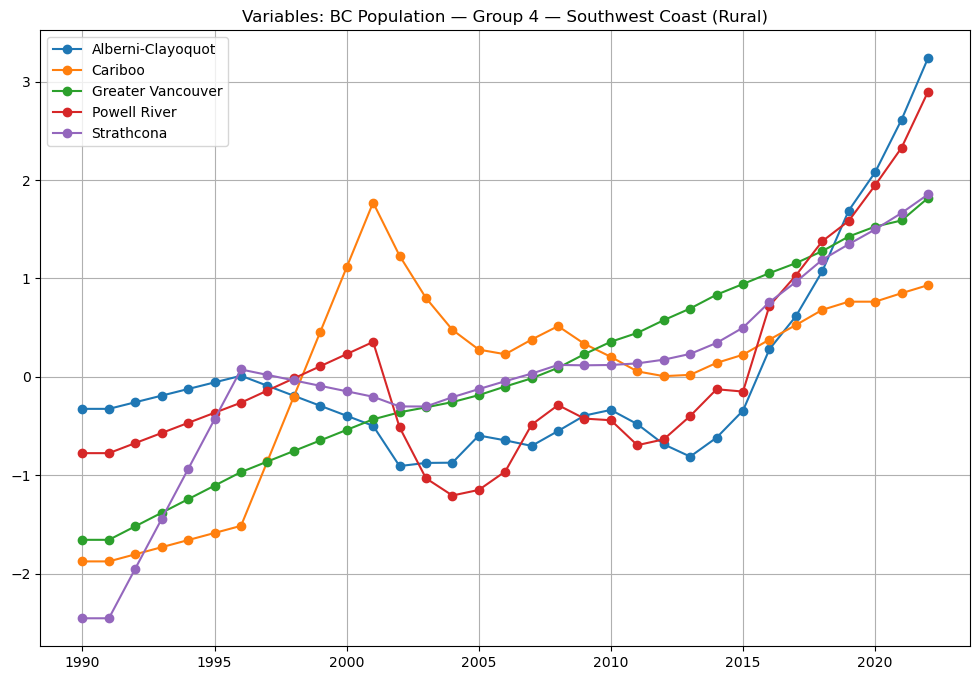

In [46]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)

plt.figure(figsize = (12,8))

#Plotting BC Regional District population vs Year
plt.title("Variables: BC Population — Group 4 — Southwest Coast (Rural)")

plt.plot(time_wd,BC_pop_nrm.iloc[:,1],marker = "o",label = BC_pop.columns[1])
plt.plot(time_wd,BC_pop_nrm.iloc[:,4],marker = "o",label = BC_pop.columns[4])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,13],marker = "o",label = BC_pop.columns[13])
plt.plot(time_wd,BC_pop_nrm.iloc[:,14],marker = "o",label = BC_pop.columns[14]) # Greater Vancouver
#plt.plot(time_wd,BC_pop_nrm.iloc[:,16],marker = "o",label = BC_pop.columns[16])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,21],marker = "o",label = BC_pop.columns[21])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,23],marker = "o",label = BC_pop.columns[23])
plt.plot(time_wd,BC_pop_nrm.iloc[:,24],marker = "o",label = BC_pop.columns[24])
#plt.plot(time_wd,BC_pop_nrm.iloc[:,26],marker = "o",label = BC_pop.columns[26])
plt.plot(time_wd,BC_pop_nrm.iloc[:,27],marker = "o",label = BC_pop.columns[27])

plt.legend()
plt.grid()

plt.show()

Cariboo is not a great fit, and is more central, but it borders Strathcona and the Coastal Mountains, and shows a similar overall trend.

In [47]:
# Group 4 average
BC_4 = BC_pop.iloc[:,[1,4,24,27]]
BC_4_avg = pd.DataFrame(BC_4.mean(axis=1),columns=['BC Gp4 Avg'])
BC_4_avg_nrm = (BC_4_avg-np.mean(BC_4_avg,axis = 0))/np.std(BC_4_avg,axis = 0)

### BC Group 5: Northern BC (Remote)

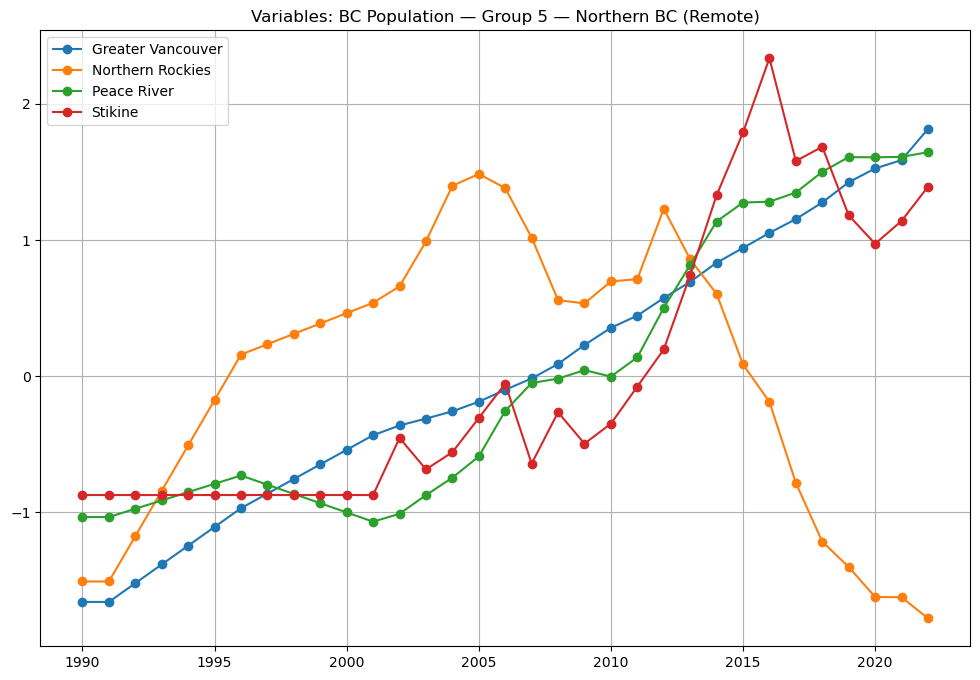

In [48]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)

plt.figure(figsize = (12,8))

#Plotting BC Regional District population vs Year
plt.title("Variables: BC Population — Group 5 — Northern BC (Remote)")

plt.plot(time_wd,BC_pop_nrm.iloc[:,14],marker = "o",label = BC_pop.columns[14]) # Greater Vancouver
plt.plot(time_wd,BC_pop_nrm.iloc[:,21],marker = "o",label = BC_pop.columns[21])
plt.plot(time_wd,BC_pop_nrm.iloc[:,23],marker = "o",label = BC_pop.columns[23])
plt.plot(time_wd,BC_pop_nrm.iloc[:,26],marker = "o",label = BC_pop.columns[26])

plt.legend()
plt.grid()

plt.show()

In [49]:
# Group 5 average
BC_5 = BC_pop.iloc[:,[21,23,26]]
BC_5_avg = pd.DataFrame(BC_5.mean(axis=1),columns=['BC Gp5 Avg'])
BC_5_avg_nrm = (BC_5_avg-np.mean(BC_5_avg,axis = 0))/np.std(BC_5_avg,axis = 0)

### All BC Groups

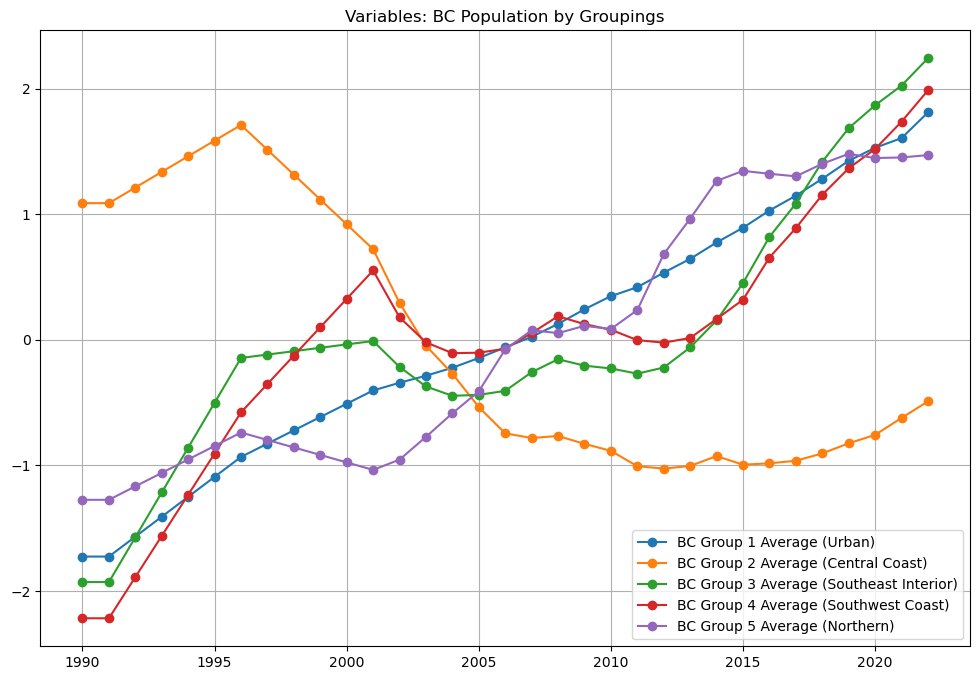

In [50]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)

plt.figure(figsize = (12,8))

#Plotting BC Regional District population vs Year
plt.title("Variables: BC Population by Groupings")

plt.plot(time_wd,BC_1_avg_nrm,marker = "o",label = 'BC Group 1 Average (Urban)')
plt.plot(time_wd,BC_2_avg_nrm,marker = "o",label = 'BC Group 2 Average (Central Coast)')
plt.plot(time_wd,BC_3_avg_nrm,marker = "o",label = 'BC Group 3 Average (Southeast Interior)')
plt.plot(time_wd,BC_4_avg_nrm,marker = "o",label = 'BC Group 4 Average (Southwest Coast)')
plt.plot(time_wd,BC_5_avg_nrm,marker = "o",label = 'BC Group 5 Average (Northern)')

plt.legend()
plt.grid()

plt.show()

In [51]:
BC_gps_nrm = pd.concat([BC_1_avg_nrm,BC_2_avg_nrm,BC_3_avg_nrm,BC_4_avg_nrm,BC_5_avg_nrm], axis=1)

# grab the years 1990-2017 overlapping with salmon data (uses 1991 data for 1990)
BC_gps_nrm_to2017 = BC_gps_nrm.iloc[0:28]

In [52]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000, 10000]

# now we do lasso feature selection on BC population groupings
features = BC_gps_nrm_to2017.columns

# coefficients placeholder
coeffs = np.zeros((len(alphas), len(features)))

# features under consideration
features_df = BC_gps_nrm_to2017[features]

results = []
# loop through salmon types
for type_sal in range(1,5):
    # loop through alphas and fit lasso models, recording coefficients
    for i in range(len(alphas)):
        # make lasso model object
        lasso = Lasso(alpha=alphas[i], max_iter=1000000)
        # fit the model
        lasso.fit(features_df, Sal_viab_nrm_to2017[Sal_viab_nrm_to2017.columns[type_sal]])
        # record the coefficients
        coeffs[i,:] = lasso.coef_
    coeffs_df = pd.DataFrame(coeffs, index=alphas, columns=features)
    # create a list of feature scores recording the number of nonzero entries in each column
    feature_scores = [(coeffs_df[col].values != 0).sum() for col in coeffs_df.columns]        
    # the ranking of water quality variables, as a dataframe
    results = results + [pd.DataFrame([feature_scores], columns=features_df.columns).transpose().sort_values(by=0, ascending=False).head(30)]

In [53]:
# the feature ranking results by individual salmon type
results

[            0
 BC Gp4 Avg  8
 BC Gp1 Avg  5
 BC Gp2 Avg  5
 BC Gp5 Avg  5
 BC Gp3 Avg  4,
             0
 BC Gp2 Avg  7
 BC Gp3 Avg  5
 BC Gp4 Avg  5
 BC Gp5 Avg  5
 BC Gp1 Avg  4,
             0
 BC Gp4 Avg  7
 BC Gp2 Avg  6
 BC Gp3 Avg  5
 BC Gp5 Avg  5
 BC Gp1 Avg  4,
             0
 BC Gp4 Avg  7
 BC Gp2 Avg  6
 BC Gp1 Avg  5
 BC Gp5 Avg  5
 BC Gp3 Avg  3]

Group 4 is the most significant, followed by Group 2.  These are both coastal groupings.

Caveat:
- This changes depending on the interpolation method used for the 1990s population data.  For instance, using `BC_pop = BC_pop.interpolate(method='slinear', fill_value='extrapolate', limit_direction='both')` (commented out in the code farther up) shows that Group 2 is most signigicant for all types of salmon, followed by Group 4, which reverses the order of these two significant features.

## WA County Populations vs Salmon Viability

Given that there are 39 WA Counties, we will group them right away.  There will be four groups.

### WA Group 1: Dominant Linear Trend

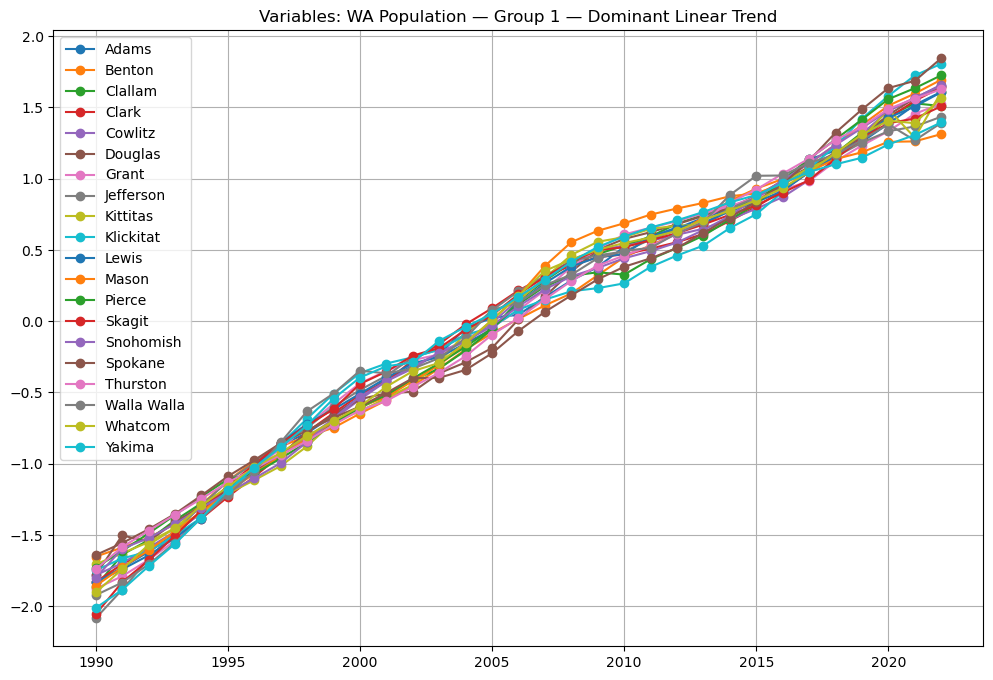

In [54]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)


plt.figure(figsize = (12,8))

# to inspect one at a time
#n=1
#plt.plot(time_wd,WA_pop_nrm.iloc[:,n],marker = "o",label = WA_pop.columns[n])

#Plotting WA County population vs Year
plt.title("Variables: WA Population — Group 1 — Dominant Linear Trend")

plt.plot(time_wd,WA_pop_nrm.iloc[:,1],marker = "o",label = WA_pop_nrm.columns[1])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,2],marker = "o",label = WA_pop_nrm.columns[2])
plt.plot(time_wd,WA_pop_nrm.iloc[:,3],marker = "o",label = WA_pop_nrm.columns[3])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,4],marker = "o",label = WA_pop_nrm.columns[4])
plt.plot(time_wd,WA_pop_nrm.iloc[:,5],marker = "o",label = WA_pop_nrm.columns[5])
plt.plot(time_wd,WA_pop_nrm.iloc[:,6],marker = "o",label = WA_pop_nrm.columns[6])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,7],marker = "o",label = WA_pop_nrm.columns[7])
plt.plot(time_wd,WA_pop_nrm.iloc[:,8],marker = "o",label = WA_pop_nrm.columns[8])
plt.plot(time_wd,WA_pop_nrm.iloc[:,9],marker = "o",label = WA_pop_nrm.columns[9])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,10],marker = "o",label = WA_pop_nrm.columns[10])

#plt.plot(time_wd,WA_pop_nrm.iloc[:,11],marker = "o",label = WA_pop_nrm.columns[11])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,12],marker = "o",label = WA_pop_nrm.columns[12])
plt.plot(time_wd,WA_pop_nrm.iloc[:,13],marker = "o",label = WA_pop_nrm.columns[13])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,14],marker = "o",label = WA_pop_nrm.columns[14])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,15],marker = "o",label = WA_pop_nrm.columns[15])
plt.plot(time_wd,WA_pop_nrm.iloc[:,16],marker = "o",label = WA_pop_nrm.columns[16])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,17],marker = "o",label = WA_pop_nrm.columns[17])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,18],marker = "o",label = WA_pop_nrm.columns[18])
plt.plot(time_wd,WA_pop_nrm.iloc[:,19],marker = "o",label = WA_pop_nrm.columns[19])
plt.plot(time_wd,WA_pop_nrm.iloc[:,20],marker = "o",label = WA_pop_nrm.columns[20])

plt.plot(time_wd,WA_pop_nrm.iloc[:,21],marker = "o",label = WA_pop_nrm.columns[21])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,22],marker = "o",label = WA_pop_nrm.columns[22])
plt.plot(time_wd,WA_pop_nrm.iloc[:,23],marker = "o",label = WA_pop_nrm.columns[23])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,24],marker = "o",label = WA_pop_nrm.columns[24])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,25],marker = "o",label = WA_pop_nrm.columns[25])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,26],marker = "o",label = WA_pop_nrm.columns[26])
plt.plot(time_wd,WA_pop_nrm.iloc[:,27],marker = "o",label = WA_pop_nrm.columns[27])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,28],marker = "o",label = WA_pop_nrm.columns[28])
plt.plot(time_wd,WA_pop_nrm.iloc[:,29],marker = "o",label = WA_pop_nrm.columns[29])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,30],marker = "o",label = WA_pop_nrm.columns[30])

plt.plot(time_wd,WA_pop_nrm.iloc[:,31],marker = "o",label = WA_pop_nrm.columns[31])
plt.plot(time_wd,WA_pop_nrm.iloc[:,32],marker = "o",label = WA_pop_nrm.columns[32])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,33],marker = "o",label = WA_pop_nrm.columns[33])
plt.plot(time_wd,WA_pop_nrm.iloc[:,34],marker = "o",label = WA_pop_nrm.columns[34])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,35],marker = "o",label = WA_pop_nrm.columns[35])
plt.plot(time_wd,WA_pop_nrm.iloc[:,36],marker = "o",label = WA_pop_nrm.columns[36])
plt.plot(time_wd,WA_pop_nrm.iloc[:,37],marker = "o",label = WA_pop_nrm.columns[37])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,38],marker = "o",label = WA_pop_nrm.columns[38])
plt.plot(time_wd,WA_pop_nrm.iloc[:,39],marker = "o",label = WA_pop_nrm.columns[39])

plt.legend()
plt.grid()

This shows the dominant trend, which is linearly increasing over time.

In [55]:
# Group 1 average
WA_1 = WA_pop.iloc[:,[1,3,5,6,8,9,13,16,19,20,21,23,27,29,31,32,34,36,37,39]]
WA_1_avg = pd.DataFrame(WA_1.mean(axis=1),columns=['WA Gp1 Avg'])
WA_1_avg_nrm = (WA_1_avg-np.mean(WA_1_avg,axis = 0))/np.std(WA_1_avg,axis = 0)

### WA Group 2: Slowing Growth in the 2000s

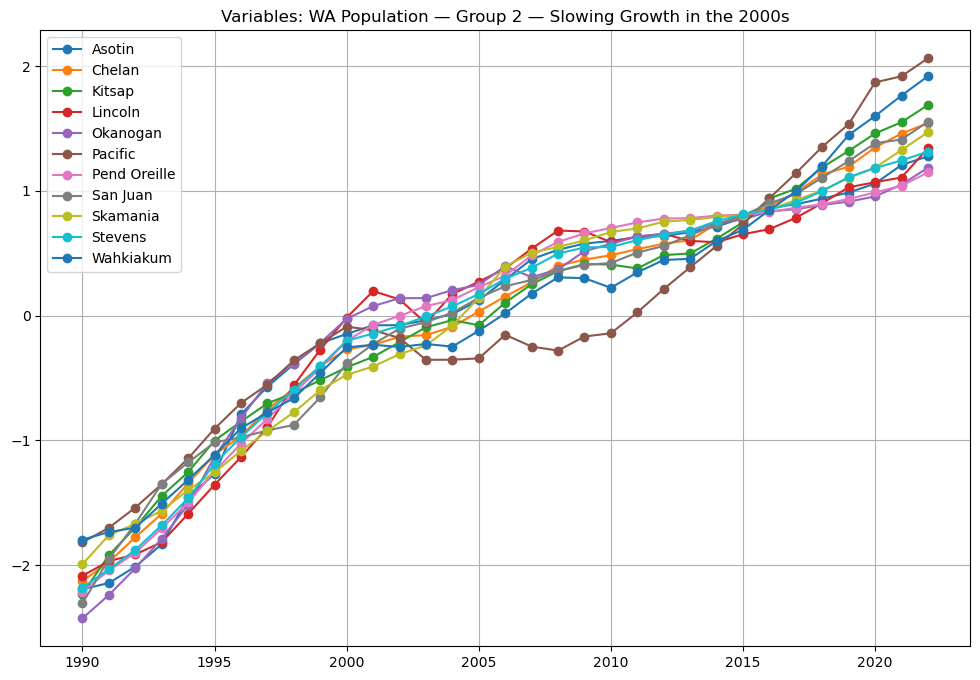

In [56]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)


plt.figure(figsize = (12,8))

# to inspect one at a time
#n=1
#plt.plot(time_wd,WA_pop_nrm.iloc[:,n],marker = "o",label = WA_pop.columns[n])

#Plotting WA County population vs Year
plt.title("Variables: WA Population — Group 2 — Slowing Growth in the 2000s")

plt.plot(time_wd,WA_pop_nrm.iloc[:,2],marker = "o",label = WA_pop_nrm.columns[2])
plt.plot(time_wd,WA_pop_nrm.iloc[:,4],marker = "o",label = WA_pop_nrm.columns[4])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,7],marker = "o",label = WA_pop_nrm.columns[7])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,10],marker = "o",label = WA_pop_nrm.columns[10])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,11],marker = "o",label = WA_pop_nrm.columns[11])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,12],marker = "o",label = WA_pop_nrm.columns[12])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,14],marker = "o",label = WA_pop_nrm.columns[14])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,15],marker = "o",label = WA_pop_nrm.columns[15])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,17],marker = "o",label = WA_pop_nrm.columns[17])
plt.plot(time_wd,WA_pop_nrm.iloc[:,18],marker = "o",label = WA_pop_nrm.columns[18])
plt.plot(time_wd,WA_pop_nrm.iloc[:,22],marker = "o",label = WA_pop_nrm.columns[22])
plt.plot(time_wd,WA_pop_nrm.iloc[:,24],marker = "o",label = WA_pop_nrm.columns[24])
plt.plot(time_wd,WA_pop_nrm.iloc[:,25],marker = "o",label = WA_pop_nrm.columns[25])
plt.plot(time_wd,WA_pop_nrm.iloc[:,26],marker = "o",label = WA_pop_nrm.columns[26])
plt.plot(time_wd,WA_pop_nrm.iloc[:,28],marker = "o",label = WA_pop_nrm.columns[28])
plt.plot(time_wd,WA_pop_nrm.iloc[:,30],marker = "o",label = WA_pop_nrm.columns[30])
plt.plot(time_wd,WA_pop_nrm.iloc[:,33],marker = "o",label = WA_pop_nrm.columns[33])
plt.plot(time_wd,WA_pop_nrm.iloc[:,35],marker = "o",label = WA_pop_nrm.columns[35])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,38],marker = "o",label = WA_pop_nrm.columns[38])

plt.legend()
plt.grid()

This group of Counties shows a steep linear rise in the 1990s, followed by a flattening.  Pacific County is a looser fit in the latter half, but follows the general trend.

In [57]:
# Group 2 average
WA_2 = WA_pop.iloc[:,[2,4,18,22,24,25,26,28,30,33,35]]
WA_2_avg = pd.DataFrame(WA_2.mean(axis=1),columns=['WA Gp2 Avg'])
WA_2_avg_nrm = (WA_2_avg-np.mean(WA_2_avg,axis = 0))/np.std(WA_2_avg,axis = 0)

### WA Group 3: Slower Growth in the 1990s

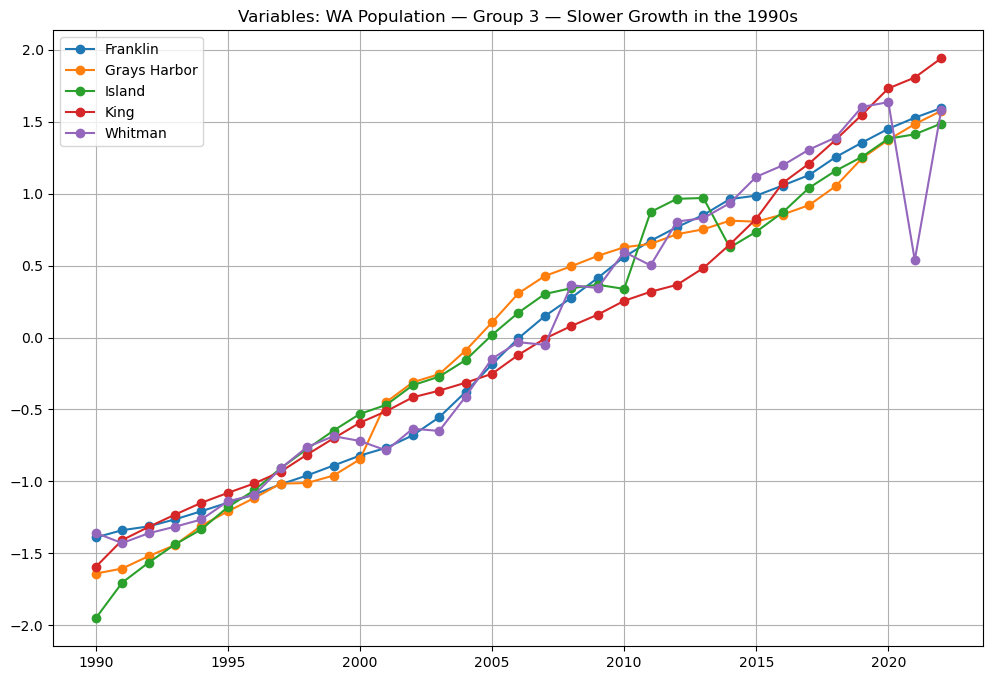

In [58]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)


plt.figure(figsize = (12,8))

# to inspect one at a time
#n=1
#plt.plot(time_wd,WA_pop_nrm.iloc[:,n],marker = "o",label = WA_pop.columns[n])

#Plotting WA County population vs Year
plt.title("Variables: WA Population — Group 3 — Slower Growth in the 1990s")

#plt.plot(time_wd,WA_pop_nrm.iloc[:,7],marker = "o",label = WA_pop_nrm.columns[7])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,10],marker = "o",label = WA_pop_nrm.columns[10])
plt.plot(time_wd,WA_pop_nrm.iloc[:,11],marker = "o",label = WA_pop_nrm.columns[11])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,12],marker = "o",label = WA_pop_nrm.columns[12])
plt.plot(time_wd,WA_pop_nrm.iloc[:,14],marker = "o",label = WA_pop_nrm.columns[14])
plt.plot(time_wd,WA_pop_nrm.iloc[:,15],marker = "o",label = WA_pop_nrm.columns[15])
plt.plot(time_wd,WA_pop_nrm.iloc[:,17],marker = "o",label = WA_pop_nrm.columns[17])
#plt.plot(time_wd,WA_pop_nrm.iloc[:,25],marker = "o",label = WA_pop_nrm.columns[25])
plt.plot(time_wd,WA_pop_nrm.iloc[:,38],marker = "o",label = WA_pop_nrm.columns[38])

plt.legend()
plt.grid()

This group shows a lower growth rate in the 1990s than the first group, but one could argue to simply combine them.

In [59]:
# Group 3 average
WA_3 = WA_pop.iloc[:,[11,14,15,17,38]]
WA_3_avg = pd.DataFrame(WA_3.mean(axis=1),columns=['WA Gp3 Avg'])
WA_3_avg_nrm = (WA_3_avg-np.mean(WA_3_avg,axis = 0))/np.std(WA_3_avg,axis = 0)

### WA Group 4: Population Growth and Fall

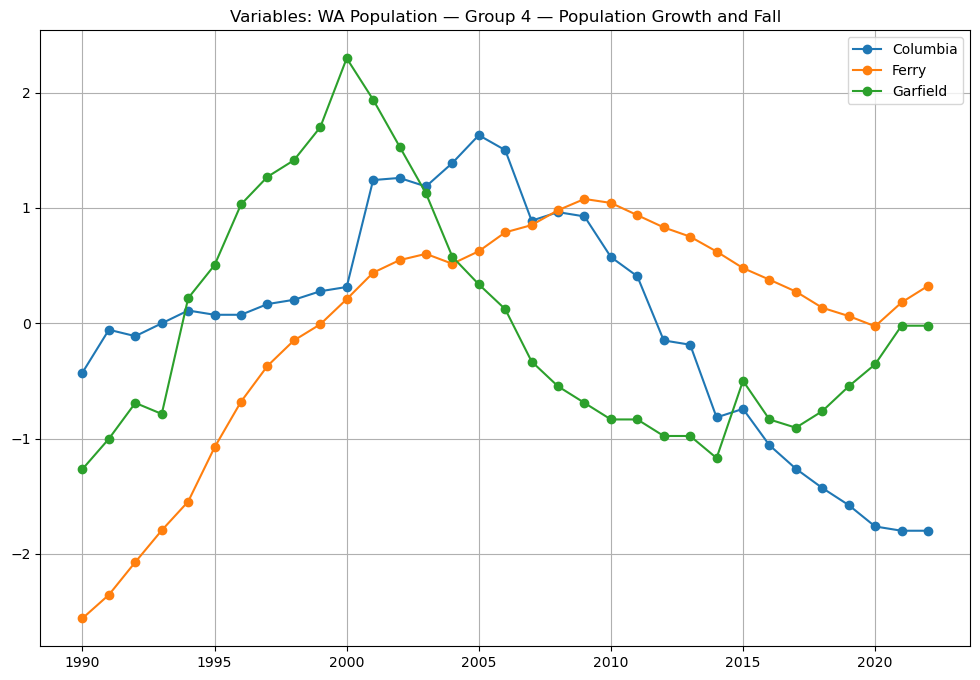

In [60]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)


plt.figure(figsize = (12,8))

# to inspect one at a time
#n=1
#plt.plot(time_wd,WA_pop_nrm.iloc[:,n],marker = "o",label = WA_pop.columns[n])

#Plotting WA County population vs Year
plt.title("Variables: WA Population — Group 4 — Population Growth and Fall")

plt.plot(time_wd,WA_pop_nrm.iloc[:,7],marker = "o",label = WA_pop_nrm.columns[7])
plt.plot(time_wd,WA_pop_nrm.iloc[:,10],marker = "o",label = WA_pop_nrm.columns[10])
plt.plot(time_wd,WA_pop_nrm.iloc[:,12],marker = "o",label = WA_pop_nrm.columns[12])

plt.legend()
plt.grid()

These outliers had increasing populations in the 1990s, followed decreasing populations in the 2000s and 2010s.

In [61]:
# Group 4 average
WA_4 = WA_pop.iloc[:,[7,10,12]]
WA_4_avg = pd.DataFrame(WA_4.mean(axis=1),columns=['WA Gp4 Avg'])
WA_4_avg_nrm = (WA_4_avg-np.mean(WA_4_avg,axis = 0))/np.std(WA_4_avg,axis = 0)

### All WA Groups

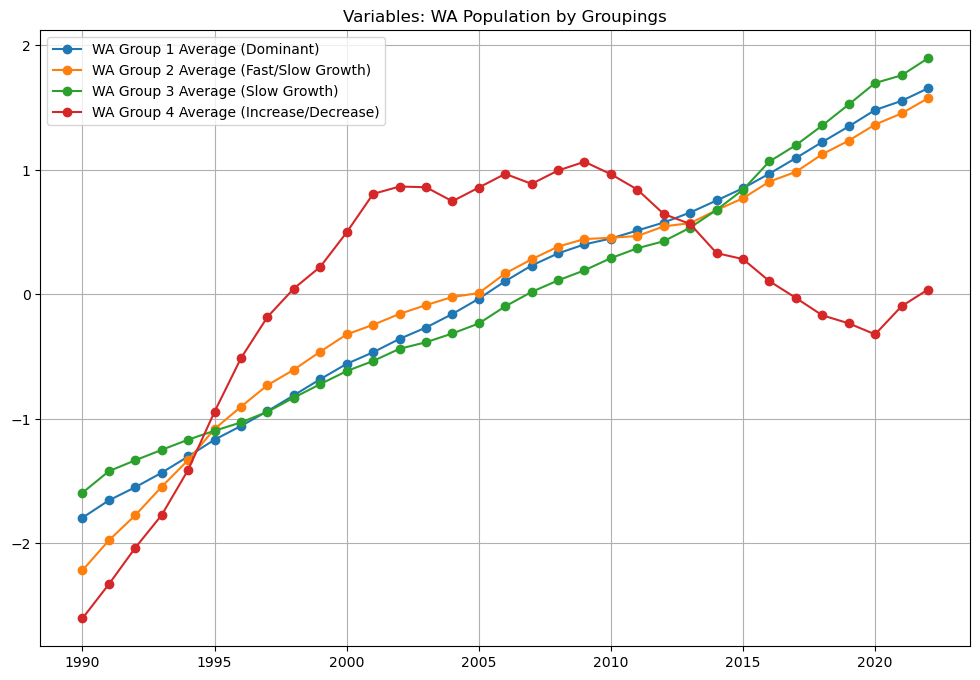

In [62]:
time_wd = range(1990,2023)
time_sal = range(1990,2019)

plt.figure(figsize = (12,8))

#Plotting WA County population vs Year
plt.title("Variables: WA Population by Groupings")

plt.plot(time_wd,WA_1_avg_nrm,marker = "o",label = 'WA Group 1 Average (Dominant)')
plt.plot(time_wd,WA_2_avg_nrm,marker = "o",label = 'WA Group 2 Average (Fast/Slow Growth)')
plt.plot(time_wd,WA_3_avg_nrm,marker = "o",label = 'WA Group 3 Average (Slow Growth)')
plt.plot(time_wd,WA_4_avg_nrm,marker = "o",label = 'WA Group 4 Average (Increase/Decrease)')

plt.legend()
plt.grid()

plt.show()

Group 4 is a clear outlier, whereas one can argue that the other groups are similar enough to be combined.

In [63]:
WA_gps_nrm = pd.concat([WA_1_avg_nrm,WA_2_avg_nrm,WA_3_avg_nrm,WA_4_avg_nrm], axis=1)

In [64]:
# grab the years 1990-2017 overlapping with salmon data
WA_gps_nrm_to2017 = WA_gps_nrm.iloc[0:28]

In [65]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000, 10000]

# now we do lasso feature selection on WA population groupings
features = WA_gps_nrm_to2017.columns

# coefficients placeholder
coeffs = np.zeros((len(alphas), len(features)))

# features under consideration
features_df = WA_gps_nrm_to2017[features]

results = []
# loop through salmon types
for type_sal in range(1,5):
    # loop through alphas and fit lasso models, recording coefficients
    for i in range(len(alphas)):
        # make lasso model object
        lasso = Lasso(alpha=alphas[i], max_iter=1000000)
        # fit the model
        lasso.fit(features_df, Sal_viab_nrm_to2017[Sal_viab_nrm_to2017.columns[type_sal]])
        # record the coefficients
        coeffs[i,:] = lasso.coef_
    coeffs_df = pd.DataFrame(coeffs, index=alphas, columns=features)
    # create a list of feature scores recording the number of nonzero entries in each column
    feature_scores = [(coeffs_df[col].values != 0).sum() for col in coeffs_df.columns]        
    # the ranking of water quality variables, as a dataframe
    results = results + [pd.DataFrame([feature_scores], columns=features_df.columns).transpose().sort_values(by=0, ascending=False).head(30)]

In [66]:
# the feature ranking results by individual salmon type
results

[            0
 WA Gp4 Avg  9
 WA Gp3 Avg  6
 WA Gp1 Avg  4
 WA Gp2 Avg  4,
             0
 WA Gp1 Avg  6
 WA Gp3 Avg  6
 WA Gp2 Avg  4
 WA Gp4 Avg  4,
             0
 WA Gp4 Avg  8
 WA Gp2 Avg  5
 WA Gp1 Avg  4
 WA Gp3 Avg  4,
             0
 WA Gp4 Avg  9
 WA Gp3 Avg  5
 WA Gp1 Avg  4
 WA Gp2 Avg  4]

Group 4 comes out as most significant for three types of salmon, but least significant for the remaining type.  

Geographically, Group 4 consists of two Counties bordering the Snake River, which is the largest tributary of the Columbia River (which itself has the greatest flow into the Pacific Ocean among rivers outside of Asia), and one County bordering the Columbia River itself.

Again, it might be best to simply group together Groups 1-3 and keep Group 4 separate.

## Lasso Feature Selection on all Variables (years 1990-2017)

Here we perform lasso feature selection on BC and WA population groupings, along with the NPGO index and Port of Vancouver total tonnage data.  We exclude the Fraser River water quality data, as this only goes back to the year 2000.

In [67]:
# use Port_of_Van_to2017, NPGO_to2017, BC_gps_nrm_to2017, WA_gps_nrm_to2017
Port_of_Van_to2017 = Port_of_Van_nrm.drop(columns=['Year']).drop(range(28,33))
NPGO_to2017 = NPGO.drop(columns=['Year']).drop(range(28,33)) ### do something about NGPO being normalized over a longer period?

In [68]:
features_table_to2017 = pd.concat([Port_of_Van_to2017,NPGO_to2017,BC_gps_nrm_to2017,WA_gps_nrm_to2017],axis=1)

In [69]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000, 10000]

# now we do lasso feature selection on WA population groupings
features = features_table_to2017.columns

# coefficients placeholder
coeffs = np.zeros((len(alphas), len(features)))

# features under consideration
features_df = features_table_to2017[features]

results = []
# loop through salmon types
for type_sal in range(1,5):
    # loop through alphas and fit lasso models, recording coefficients
    for i in range(len(alphas)):
        # make lasso model object
        lasso = Lasso(alpha=alphas[i], max_iter=1000000)
        # fit the model
        lasso.fit(features_df, Sal_viab_nrm_to2017[Sal_viab_nrm_to2017.columns[type_sal]])
        # record the coefficients
        coeffs[i,:] = lasso.coef_
    coeffs_df = pd.DataFrame(coeffs, index=alphas, columns=features)
    # create a list of feature scores recording the number of nonzero entries in each column
    feature_scores = [(coeffs_df[col].values != 0).sum() for col in coeffs_df.columns]        
    # the ranking of variables, as a dataframe
    results = results + [pd.DataFrame([feature_scores], columns=features_df.columns).transpose().sort_values(by=0, ascending=False).head(30)]

In [70]:
# the feature ranking results by individual salmon type
results

[            0
 WA Gp4 Avg  9
 NPGO index  6
 BC Gp2 Avg  6
 Tonnage     5
 BC Gp5 Avg  5
 BC Gp1 Avg  4
 BC Gp4 Avg  4
 WA Gp1 Avg  4
 WA Gp2 Avg  4
 WA Gp3 Avg  4
 BC Gp3 Avg  2,
             0
 BC Gp2 Avg  7
 BC Gp5 Avg  6
 NPGO index  5
 BC Gp3 Avg  5
 WA Gp2 Avg  5
 WA Gp4 Avg  5
 Tonnage     4
 BC Gp1 Avg  4
 BC Gp4 Avg  4
 WA Gp3 Avg  4
 WA Gp1 Avg  3,
             0
 NPGO index  8
 WA Gp4 Avg  8
 BC Gp5 Avg  6
 BC Gp2 Avg  5
 BC Gp4 Avg  5
 Tonnage     4
 BC Gp1 Avg  4
 BC Gp3 Avg  4
 WA Gp1 Avg  4
 WA Gp2 Avg  4
 WA Gp3 Avg  3,
             0
 WA Gp4 Avg  8
 NPGO index  6
 Tonnage     5
 BC Gp2 Avg  5
 BC Gp5 Avg  5
 WA Gp3 Avg  5
 BC Gp1 Avg  4
 BC Gp4 Avg  4
 WA Gp1 Avg  4
 WA Gp2 Avg  4
 BC Gp3 Avg  3]

### Overall Ranking of Features

In [71]:
# overall ranking of features 
sum(results).sort_values(by=0, ascending=False)

0
WA Gp4 Avg  30
NPGO index  25
BC Gp2 Avg  23
BC Gp5 Avg  22
Tonnage     18
BC Gp4 Avg  17
WA Gp2 Avg  17
BC Gp1 Avg  16
WA Gp3 Avg  16
WA Gp1 Avg  15
BC Gp3 Avg  14

#### Comments

It is perhaps surprising that WA Gp4 Avg and BC Gp5 Avg are near the top, given that these represent relatively low populations in geographical areas that are indirectly connected to the Strait of Georgia through rivers and tributaries.  

The relatively high ranking of BC Gp2 Avg and BC Gp4 Avg is less surprising, as these are coastal populations near the Strait of Georgia.

The NPGO index is driven by wind-driven upwelling and horizontal advection in the Northern Pacific Ocean, which are fundamental processes controlling salinity and nutrient concentrations (see http://o3d.org/npgo/).  So it is not surprising to find the NGPO index near the top of significance.

## Lasso Feature Selection for Years 2000-2017

Let's combine the variables we just studied over the years 1990-2017 with the Fraser River water quality variables to get an idea of significance during the years 2000-2017.

In [72]:
# drop the 1990s from the variables that have this data
df1 = features_table_to2017.drop(range(0,10)).reset_index(drop=True)

# grab the most significant water quality features
df2 = Fraser_qual_nrm_2000_dropnan[sig_features_all]

# combine these
big_table = pd.concat([df1,df2],axis=1)

In [74]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000, 10000]

# now we do lasso feature selection
features = big_table.columns

# coefficients placeholder
coeffs = np.zeros((len(alphas), len(features)))

# features under consideration
features_df = big_table[features]

results = []
# loop through salmon types
for type_sal in range(1,5):
    # loop through alphas and fit lasso models, recording coefficients
    for i in range(len(alphas)):
        # make lasso model object
        lasso = Lasso(alpha=alphas[i], max_iter=1000000)
        # fit the model
        lasso.fit(features_df, Sal_viab_nrm_2000[Sal_viab_nrm_2000.columns[type_sal]])
        # record the coefficients
        coeffs[i,:] = lasso.coef_
    coeffs_df = pd.DataFrame(coeffs, index=alphas, columns=features)
    # create a list of feature scores recording the number of nonzero entries in each column
    feature_scores = [(coeffs_df[col].values != 0).sum() for col in coeffs_df.columns]        
    # the ranking of variables, as a dataframe
    results = results + [pd.DataFrame([feature_scores], columns=features_df.columns).transpose().sort_values(by=0, ascending=False)]

In [75]:
# the feature ranking results by individual salmon type
results

[                            0
 COLOUR TRUE                 7
 NITROGEN NITRITE            7
 PHOSPHORUS TOTAL DISSOLVED  6
 PH                          6
 ESCHERICHIA COLI            6
 NITROGEN TOTAL              6
 CARBON DISSOLVED ORGANIC    6
 CARBON DISSOLVED INORGANIC  5
 ALKALINITY TOTAL CACO3      5
 WA Gp3 Avg                  5
 WA Gp4 Avg                  5
 NITROGEN TOTAL DISSOLVED    4
 CADMIUM TOTAL               4
 CHROMIUM TOTAL              4
 NPGO index                  4
 FECAL COLIFORMS             4
 BC Gp5 Avg                  4
 BC Gp1 Avg                  4
 Tonnage                     3
 WA Gp1 Avg                  2
 SILVER TOTAL                2
 NICKEL TOTAL                2
 WA Gp2 Avg                  1
 BC Gp4 Avg                  1
 BC Gp3 Avg                  1
 BC Gp2 Avg                  1,
                             0
 ALKALINITY TOTAL CACO3      7
 PHOSPHORUS TOTAL DISSOLVED  6
 FECAL COLIFORMS             6
 ESCHERICHIA COLI            6
 COLOUR

In [76]:
# overall ranking of features 
sum(results).sort_values(by=0, ascending=False)

0
NITROGEN NITRITE            26
COLOUR TRUE                 25
ESCHERICHIA COLI            25
ALKALINITY TOTAL CACO3      22
PHOSPHORUS TOTAL DISSOLVED  21
FECAL COLIFORMS             21
NITROGEN TOTAL DISSOLVED    20
CARBON DISSOLVED INORGANIC  20
CARBON DISSOLVED ORGANIC    20
NITROGEN TOTAL              20
NPGO index                  19
Tonnage                     18
PH                          18
WA Gp3 Avg                  17
CADMIUM TOTAL               17
CHROMIUM TOTAL              17
WA Gp4 Avg                  15
BC Gp5 Avg                  15
NICKEL TOTAL                14
SILVER TOTAL                13
BC Gp1 Avg                  11
WA Gp1 Avg                   8
BC Gp2 Avg                   8
BC Gp3 Avg                   7
BC Gp4 Avg                   6
WA Gp2 Avg                   5

This shows that the most significant predictors of salmon viability during the years 2000-2017 were generally substances measured in Fraser River water quality tests.  However, this behaviour could change significantly with more complete data.  Overall, this highlights the importance of making consistent water quality measurements on the Fraser River in the future.